In [1]:
# Kütüphaneler

import numpy as np
import pandas as pd
import re as re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/train.csv')
df.shape

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3429990102.py:1: DtypeWarning: Columns (13,15,19,30,32,37,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/train.csv')


(65125, 44)

In [3]:
df.head(5)

Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi        Dogum Yeri  \
0          2014                 52.0    Erkek      4/6/1994  Altindag, Ankara   
1          2014                 30.0    Erkek     6/11/1993           Üsküdar   
2          2014                 18.0    Erkek     1/15/1986            Samsun   
3          2014                 40.0    Erkek      6/4/1991        Diyarbakır   
4          2014                 24.0    Erkek  2 Kasim 1992   Ankara/Altındağ   

  Ikametgah Sehri                    Universite Adi Universite Turu  \
0          Ankara           İHSAN DOĞRAMACI BİLKENT            Özel   
1        İstanbul           İHSAN DOĞRAMACI BİLKENT            Özel   
2        İstanbul  ULUSLARARASI KIBRIS ÜNİVERSİTESİ            Özel   
3        İstanbul       İSTANBUL ŞEHİR ÜNİVERSİTESİ            Özel   
4          Ankara          TURGUT ÖZAL ÜNİVERSİTESİ            Özel   

   Burslu ise Burs Yuzdesi Burs Aliyor mu?  ... Spor Dalindaki Rolunuz Nedir?  \
0                    100.0            Evet  ...                         Diğer   
1                    100.0           Hayır  ...                             0   
2                    100.0           Hayır  ...                             0   
3                    100.0            Evet  ...                             0   
4                    100.0            Evet  ...                             0   

  Aktif olarak bir STK üyesi misiniz? Hangi STK'nin Uyesisiniz?  \
0                               Hayır                       NaN   
1                               Hayır                       NaN   
2                               Hayır                       NaN   
3                               Hayır                       NaN   
4                               Hayır                       NaN   

  Stk Projesine Katildiniz Mi? Girisimcilikle Ilgili Deneyiminiz Var Mi?  \
0                         Evet                                     Hayır   
1                         Evet                                      Evet   
2                        Hayır                                     Hayır   
3                         Evet                                     Hayır   
4                        Hayır                                     Hayır   

  Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?  \
0                                                NaN          
1  Bilkent Cyberparkta bir şirkette Türkiye nin i...          
2                                                NaN          
3                                                NaN          
4                                                NaN          

  Ingilizce Biliyor musunuz? Ingilizce Seviyeniz?  \
0                        NaN                  NaN   
1                        NaN                  NaN   
2                        NaN                  NaN   
3                        NaN                  NaN   
4                        NaN                  NaN   

  Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite id  
0                                                NaN     0  
1                                                NaN     1  
2                                                NaN     2  
3                                                NaN     3  
4                                                NaN     4  

[5 rows x 44 columns]

In [4]:
df.columns

Index(['Basvuru Yili', 'Degerlendirme Puani', 'Cinsiyet', 'Dogum Tarihi',
       'Dogum Yeri', 'Ikametgah Sehri', 'Universite Adi', 'Universite Turu',
       'Burslu ise Burs Yuzdesi', 'Burs Aliyor mu?', 'Bölüm',
       'Universite Kacinci Sinif', 'Universite Not Ortalamasi',
       'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi',
       'Lise Adi Diger', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Lise Bolum Diger', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?', 'Burs Aldigi Baska Kurum',
       'Baska Kurumdan Aldigi Burs Miktari', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu',
       'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Uye Oldugunuz Kulubun Ismi',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       'Hangi STK'nin Uyesisiniz?', 

In [5]:
# types of column data
df.dtypes

Basvuru Yili                                                   int64
Degerlendirme Puani                                          float64
Cinsiyet                                                      object
Dogum Tarihi                                                  object
Dogum Yeri                                                    object
Ikametgah Sehri                                               object
Universite Adi                                                object
Universite Turu                                               object
Burslu ise Burs Yuzdesi                                      float64
Burs Aliyor mu?                                               object
Bölüm                                                         object
Universite Kacinci Sinif                                      object
Universite Not Ortalamasi                                     object
Daha Once Baska Bir Universiteden Mezun Olmus                 object
Lise Adi                          

In [6]:
df.isnull().sum()  # veride eksik değer içeren sütun var mı 

Basvuru Yili                                                     0
Degerlendirme Puani                                              1
Cinsiyet                                                       169
Dogum Tarihi                                                   177
Dogum Yeri                                                     791
Ikametgah Sehri                                               2037
Universite Adi                                                 132
Universite Turu                                                255
Burslu ise Burs Yuzdesi                                      42685
Burs Aliyor mu?                                                  0
Bölüm                                                          231
Universite Kacinci Sinif                                       374
Universite Not Ortalamasi                                     2753
Daha Once Baska Bir Universiteden Mezun Olmus                37345
Lise Adi                                                      

In [7]:
def statistical_analysis(df, column_name):
    # Sütun için istatistiksel analiz yapma
    column_data = df[column_name]

    # Mod hesaplama
    mode_value = column_data.mode()[0]

    # Ortalama hesaplama
    mean_value = column_data.mean()

    # Medyan hesaplama
    median_value = column_data.median()

    # Standart sapma hesaplama
    std_value = column_data.std()

    # Sonuçları yazdırma
    print("Sütun Adı:", column_name)
    print("Mod:", mode_value)
    print("Ortalama:", mean_value)
    print("Medyan:", median_value)
    print("Standart Sapma:", std_value)


# Sütunlara ait histogram grafikleri
def his_grap(df, column_name):
    # Sütun için istatistiksel analiz yapma
    column_data = df[column_name]

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(column_data, kde=True, color='green')
    plt.title('Histogram - ' + column_name)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()


In [8]:
# Dataframe'de ilgili sütundaki aykırı verilerin temizlenmesi için fonksiyon oluşturulmuştur.

def outliers_remove_with_iqr(column_name, df):
    Q1 = df[column_name].quantile(0.25)  # ilk çeyreklik
    Q3 = df[column_name].quantile(0.75)  # üçüncü çeyreklik
    IQR = Q3 - Q1 # QR (Interquartile Range) hesaplanır
    print(f"Q1: {Q1} / Q3: {Q3} / IQR: {IQR}") 
    # IQR kullanılarak aykırı değerlerin sınırları belirlenir. 
    aykiri_Q3tenbuyuk = Q3 + 1.5*IQR  # bir değer, Q1'den 1.5 * IQR çıkarıldığında daha küçükse bu değer bir aykırı değer olarak kabul edilir
    aykiri_Q1denkucuk = Q1 - 1.5*IQR  # bir değer, Q3'ten 1.5 * IQR eklenerek daha büyükse bu değer bir aykırı değer olarak kabul edilir
    print(f"Q3'ten büyük aykırı değer: {aykiri_Q3tenbuyuk} / Q1'den küçük aykırı değer: {aykiri_Q1denkucuk}")

    # mantıksal sınamanın true olduğu durumaları döndürür
    print("Mantıksal sınamaya göre aykırı değerlerin sayısı:")
    print(np.where(df[column_name] > aykiri_Q3tenbuyuk)[0].shape , np.where(df[column_name] < aykiri_Q1denkucuk)[0].shape)

    # Belirlenen aykırı değerler bir koşul ile birlikte veri setinden temizlenir.
    # Koşul belirlenir
    condition = ~((df[column_name] > aykiri_Q3tenbuyuk) | (df[column_name] < aykiri_Q1denkucuk)) # Aykırı verilerin dışında olan veriler belirlenir
    # Bu koşulu sağlan veriler ile yeni dataframe oluşturulmuş olur.
    df = df.loc[condition]
    print("Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.")
    
    return df  # aykırı değer temizlenmiş veri seti döndürülür
    

In [9]:
# İlgili sütunun ortalam Değerlendirme puanı için çizgi gradfiği fonksiyonu

def plot_average_scores(df, ortalama_sutun, degerlendirme_sutun):
    # Yıl bazında ortalama puanları hesaplama
    ortalama_puanlar = df.groupby(ortalama_sutun)[degerlendirme_sutun].mean()

    # Çizgi grafiği oluşturma
    plt.figure(figsize=(10, 6))
    plt.plot(ortalama_puanlar.index, ortalama_puanlar.values, marker='o', linestyle='-', color='b')
    plt.title(f'{ortalama_sutun} Göre Ortalama {degerlendirme_sutun}')
    plt.xlabel(ortalama_sutun)
    plt.ylabel(f'Ortalama {degerlendirme_sutun}')
    plt.grid(True)
    plt.show()

# Örnek kullanım:
# plot_average_scores(df, 'Universite Not Ortalamasi', 'Degerlendirme Puani')

In [10]:
import matplotlib.pyplot as plt

def scatter_plot(df, x_column, y_column):
    """
    Verilen DataFrame'den iki sütunu kullanarak scatter plot oluşturur.

    Parametreler:
    df: pandas DataFrame - Grafik için veri.
    x_column: str - X ekseni için kullanılacak sütun adı.
    y_column: str - Y ekseni için kullanılacak sütun adı.
    """
    plt.scatter(df[x_column], df[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"{x_column} vs {y_column}")
    plt.show()

# scatter_plot(df, 'X_degisken', 'Y_degisken')


## 'Degerlendirme Puani' sütunu

In [11]:
df['Degerlendirme Puani'].describe()

count    65124.000000
mean        32.086466
std         18.139239
min          0.000000
25%         18.000000
50%         29.000000
75%         44.000000
max        102.000000
Name: Degerlendirme Puani, dtype: float64

In [12]:
df['Degerlendirme Puani'].unique()

array([ 52.,  30.,  18.,  40.,  24.,  37.,  31.,  28.,  26.,  58.,  34.,
        33.,  48.,  10.,   8.,  54.,  14.,  44.,  60.,  42.,  22.,  16.,
        29.,  46.,  41.,  50.,  53.,  36.,  32.,  38.,  20.,  12.,  51.,
        65.,  56.,  61.,  62.,  49.,  70.,  43.,  23.,  64.,  59.,  57.,
        63.,  71.,  98.,  21.,  66.,  27.,  39.,  68.,  85.,  45.,  67.,
        47.,  78.,  19.,  13.,  90.,  72.,  77.,  55.,   6.,  79.,  76.,
        75.,  74.,  73.,  17.,  80.,  84.,  86.,  82.,  88.,  92.,  94.,
        96., 102.,   7.,   4.,  15.,  35.,  25.,   5.,  11.,   9.,   3.,
         2.,   1.,   0.,  69.,  81.,  89.,  83., 100.,  95.,  nan])

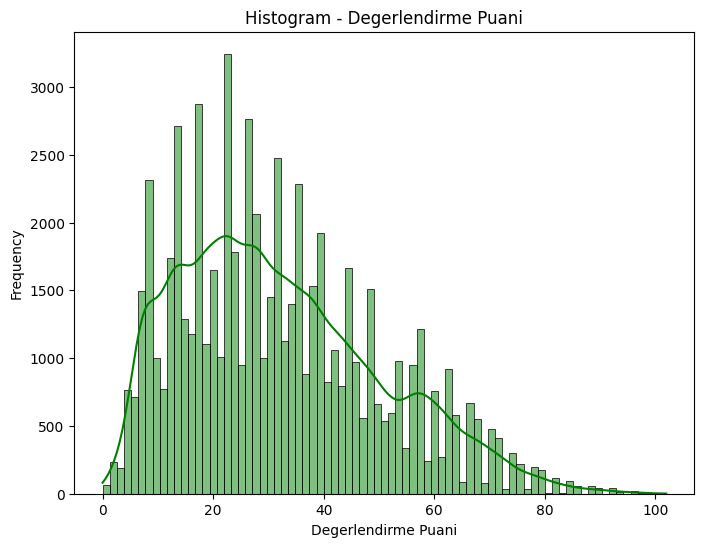

In [13]:
his_grap(df,'Degerlendirme Puani')

<Axes: >

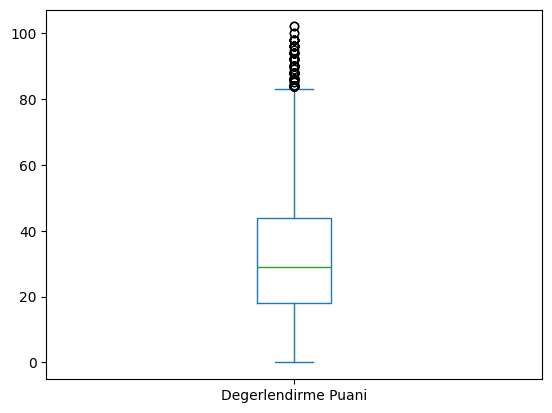

In [14]:
# Kutu grafiği çizdirilir, aykırı değer yok.
df['Degerlendirme Puani'].plot(kind='box')  

In [15]:
df = outliers_remove_with_iqr("Degerlendirme Puani", df)

Q1: 18.0 / Q3: 44.0 / IQR: 26.0
Q3'ten büyük aykırı değer: 83.0 / Q1'den küçük aykırı değer: -21.0
Mantıksal sınamaya göre aykırı değerlerin sayısı:
(338,) (0,)
Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.


<Axes: >

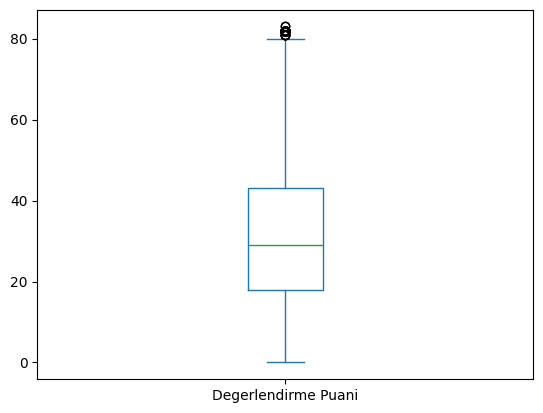

In [16]:
# Kutu grafiği çizdirilir, aykırı değer yok.
df['Degerlendirme Puani'].plot(kind='box')  

In [17]:
df = df.dropna(subset=['Degerlendirme Puani'])

## 'Basvuru Yili' Sütunu 

* Eksik ve aykırı veri yok. 
* Veri tipi makine öğrenimi modelleri için uygun.
* Başvuru Yılına göre başvurusu sayısı için histogram grafiğine bakıldı.
* Başvuru Yılına göre Değerlendirme Puanları'nın ortalamaları grafik aracılığıyla kontrol edildi.

In [18]:
df['Basvuru Yili'].describe()

count    64786.000000
mean      2018.289275
std          2.671445
min       2014.000000
25%       2016.000000
50%       2019.000000
75%       2021.000000
max       2022.000000
Name: Basvuru Yili, dtype: float64

In [19]:
df['Basvuru Yili'].unique

<bound method Series.unique of 0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
65119    2022
65120    2022
65121    2022
65122    2022
65123    2022
Name: Basvuru Yili, Length: 64786, dtype: int64>

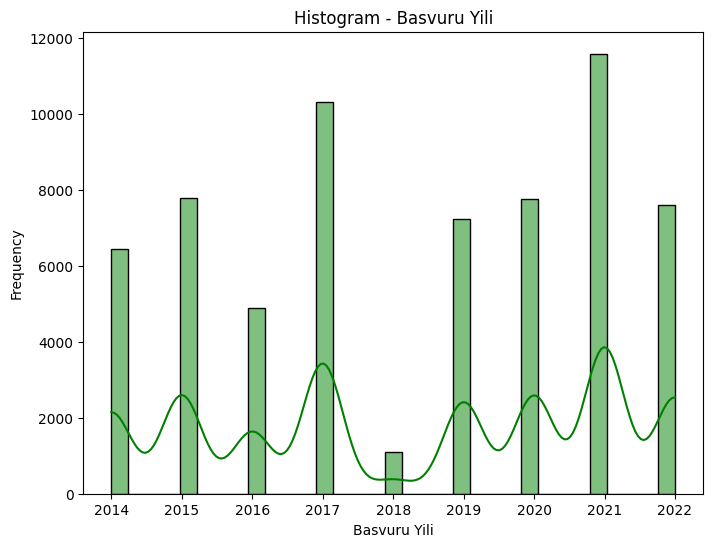

In [20]:
his_grap(df,"Basvuru Yili")

<Axes: >

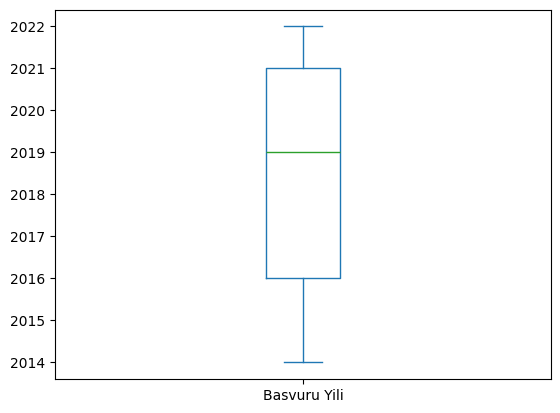

In [21]:
# Kutu grafiği çizdirilir, aykırı değer yok.
df['Basvuru Yili'].plot(kind='box')  

## 'Cinsiyet' sütunu

* Verileri daha düzenli hale getirmek için aynı anlam taşıyan farklı şekillerde yazılmış veriler aynı formata dönüştürüldü.
* Cinsiyet bilgisinin değerlendirme puanına etki etmeyeceği düşünüldüğünden işleme dahil edilmemiştir.


In [22]:
df['Cinsiyet'].describe()

count     64617
unique        4
top       Kadın
freq      31918
Name: Cinsiyet, dtype: object

In [23]:
df['Cinsiyet'].unique()

array(['Erkek', 'Kadın', 'ERKEK', 'Belirtmek istemiyorum', nan],
      dtype=object)

In [24]:
# Veriler daha düzenli hale getirilir
# 'Cinsiyet' sütunundaki değerleri küçük harfe çevirip baş harfi büyültme
df['Cinsiyet'] = df['Cinsiyet'].str.strip().str.capitalize()

# Değişiklikleri kontrol etme
print(df['Cinsiyet'].value_counts())

Cinsiyet
Erkek                    32584
Kadın                    31918
Belirtmek istemiyorum      115
Name: count, dtype: int64


## 'Dogum Tarihi' sütunu

* Eksik veriler silinmiştir.
* Verileri daha düzenli hale getirmek için aynı anlam taşıyan farklı şekillerde yazılmış veriler aynı formata dönüştürüldü. Sadece 4 haneli yıl bilgileri alınmıştır.
* Bazı tarihlerin format dönüşümü doğru şekilde çerilemeyince 2939 tane veri NaN olarak döndürülüyordu. Bu verileri doldurmak için ilgili satırın Başvuru Yili sütununa bakılarak o yıldaki çok tekrar eden doğum yılına göre doldurulmuştur.
* Aykırı Doğum Tarihi sütunundaki değerler IQR yöntemi ile tespit edilip silinmiştir. 
(Q1: 1995.0 / Q3: 2000.0 / IQR: 5.0
Q3'ten büyük aykırı değer: 2007.5 / Q1'den küçük aykırı değer: 1987.5
Mantıksal sınamaya göre aykırı değerlerin sayısı:
(49,) (1794,)
Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.)

* Doğum 

In [25]:
df['Dogum Tarihi'].describe()

count           64609
unique          13454
top       1/1/70 2:00
freq             1655
Name: Dogum Tarihi, dtype: object

In [26]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Dogum Tarihi"].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Dogum Tarihi
1/1/70 2:00            1655
1/1/00 0:00             179
1/1/01 0:00             154
1/1/1997                139
1/1/1998                129
1/1/1996                119
1/1/99 0:00             117
1/1/1995                106
1/1/1999                 84
1.01.2001 00:00          82
1/1/98 0:00              81
1-Jan-95                 78
1/1/1994                 73
1/1/02 0:00              71
1/1/1993                 68
1.01.2000 00:00          61
1.01.2002 00:00          59
1-Jan-94                 59
1-Jan-90                 57
1-Jan-96                 52
1/1/2000                 50
1/1/97 0:00              43
1-Jan-93                 43
1/1/1970                 38
1/1/1992                 37
1994-01-01               36
1995-01-01               35
1/1/1991                 32
1996-01-01               31
10/1/1997                30
1.01.1999 00:00          29
3/1/00 0:00              29
1/3/00 0:00              27
3/1/1997                 27
9/15/99 0:00             27
1/2/199

In [27]:
# 'Doğum Tarihi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Dogum Tarihi'].isna().sum()
nan_count

177

In [28]:
# Dogum Tarihi sütunundaki eksik değerleri içeren satırlar silinir
df = df.dropna(subset=['Dogum Tarihi'])

In [29]:
import pandas as pd

#Tarih formatlarını otomatik algılayarak dönüştürme
def extract_year(date_str):
    print(date_str)
    if pd.isna(date_str):
        return None

    try:
        date = pd.to_datetime(date_str, infer_datetime_format=True, errors='coerce')
        if not pd.isna(date):
            print(date.year)
            if (date.year == 2070):
                yil = 1970
            else: 
                yil = date.year
            return yil
        # print(yil)
    except ValueError:
        return None

    return None

#Doğum yıllarını çekme
df['Dogum Tarihi'] = df['Dogum Tarihi'].apply(extract_year).astype('Int64')


4/6/1994
1994
6/11/1993
1993
1/15/1986
1986
6/4/1991
1991
2 Kasim 1992
4/14/1992
1992
10/13/1994
1994
3/18/1993
1993
29 Aralik 1991
4/25/1991
1991
7/20/1995
1995
9/27/1993
1993
3/23/1993
1993
8/9/1992
1992
3/5/1992
1992
4/16/1992
1992
7/15/1992
1992
8 Mayis 1995
7/27/1995
1995
7/24/1995
1995
7 Mayis 1994
8/15/1995
1995
1/27/1989
1989
10/5/1992
1992
4/9/1994
1994
6/9/1993
1993
31 Mayis 1992
2/8/1995
1995
1/23/1994
1994
7/23/1994
1994
4/23/1995
1995
4/24/1992
1992
9/24/1993
1993
26 Mayis 1995
24 Mayis 1994
2/13/1992
1992
7/2/1992
1992
29 Aralik 1990
1/12/1995
1995
22 Mayis 1992
8/4/1993
1993
1/10/1990
1990
6/12/1995
1995
28 Mayis 1991
6/12/1995
1995
5 Kasim 1993
9/3/1994
1994
14 Kasim 1993
9/16/1992
1992
9/12/1993
1993
1/25/1993
1993
21 Aralik 1992
2/17/1993
1993
8/29/1993
1993
2/26/1992
1992
3/12/1994
1994
1 Mayis 1993
6/30/1994
1994
2/27/1991
1991
1/11/1993
1993
3/17/1991
1991
9/1/1992
1992
7/13/1994
1994
2/1/1991
1991
8/1/1990
1990
30 Mayis 1992
9/22/1994
1994
1/1/1994
1994
10/7/1995


C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3174791288.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  date = pd.to_datetime(date_str, infer_datetime_format=True, errors='coerce')


1 Mayis 1992
11 Aralik 1995
7/20/1995
1995
7/16/1993
1993
2/1/1992
1992
29 Kasim 1993
9/13/1994
1994
6/16/1992
1992
20 Aralik 1994
1/8/1994
1994
1/17/1994
1994
1/7/1992
1992
1/13/1992
1992
3/18/1994
1994
1/13/1986
1986
1 Aralik 1987
8/20/1995
1995
7/13/1992
1992
10/6/1994
1994
3/1/1995
1995
5 Kasim 1992
10/19/1991
1991
10/13/1992
1992
13 Kasim 1994
6/13/1993
1993
6/15/1992
1992
26 Mayis 1989
4/23/1993
1993
18 Aralik 1995
9/1/1992
1992
7 Aralik 1994
15 Kasim 1987
11 Kasim 1992
6/25/1993
1993
28 Mayis 1993
3/20/1992
1992
9/24/1992
1992
17 Mayis 1993
3/8/1992
1992
1 Aralik 1993
1/2/1993
1993
1/2/1993
1993
9/16/1993
1993
1/17/1991
1991
1/8/1990
1990
20 Mayis 1991
6/20/1994
1994
8/22/1993
1993
4/5/1995
1995
6/6/1991
1991
4/2/1992
1992
7/12/1995
1995
4/5/1992
1992
10/4/1994
1994
1/4/1992
1992
4/25/1994
1994
10/27/1994
1994
9/17/1994
1994
4/12/1994
1994
7/2/1993
1993
14 Aralik 1993
6/23/1995
1995
10/15/1992
1992
10/1/1994
1994
3/22/1992
1992
12 Mayis 1993
4/1/1994
1994
2/3/1993
1993
7/22/1994

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3174791288.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(date_str, infer_datetime_format=True, errors='coerce')



1997
4/6/1997
1997
5/5/1999
1999
10/1/1998
1998
9/10/1995
1995
15/10/1999
1999
12/10/1996
1996
8/3/2000
2000
10/4/1999
1999
15/03/1999
1999
21/01/2000
2000
20/01/1997
1997
11/9/1998
1998
15/06/1998
1998
12/9/1999
1999
10/1/1999
1999
10/10/1999
1999
7/4/1997
1997
10/9/1995
1995
20/10/1995
1995
19/02/2000
2000
30/01/1997
1997
1/1/1999
1999
23/12/1997
1997
24/02/1999
1999
7/1/2001
2001
16/06/1997
1997
19/07/1998
1998
14/09/2000
2000
21/05/1997
1997
17/08/1998
1998
1/2/1998
1998
20/06/1998
1998
1/12/2000
2000
8/12/1999
1999
20/00/2000
29/07/1998
1998
5/6/2000
2000
31/01/2000
2000
28/08/1997
1997
5/1/2000
2000
6/5/1997
1997
17/06/1999
1999
25/05/1996
1996
3/8/1999
1999
10/3/1998
1998
1/10/1997
1997
15/10/1997
1997
15/10/1997
1997
26/08/1997
1997
14/04/1998
1998
12/7/2000
2000
10/8/2000
2000
22/03/1998
1998
11/11/1999
1999
3/4/1998
1998
30/04/1997
1997
24/12/1999
1999
6/4/1998
1998
14/05/1998
1998
15/08/1998
1998
1/1/2000
2000
4/3/1998
1998
23/02/1996
1996
2/2/1996
1996
15/03/2000
2000
18/0

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3174791288.py:10: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(date_str, infer_datetime_format=True, errors='coerce')


2001
14.12.1999 00:00
1999
15.07.2000 00:00
2000
17.05.2000 00:00
2000
25.01.2002 00:00
2002
14.12.1999 00:00
1999
28.09.2002 00:00
2002
11.11.2000 00:00
2000
26.05.2000 00:00
2000
11.09.2002 00:00
2002
21.06.2000 00:00
2000
22.08.2000 00:00
2000
25.11.2000 00:00
2000
12.11.1999 00:00
1999
17.11.2003 00:00
2003
31.10.2000 00:00
2000
27.05.2001 00:00
2001
19.07.2003 00:00
2003
6.10.2001 00:00
2001
29.08.2002 00:00
2002
29.11.2001 00:00
2001
1.01.2000 00:00
2000
7.11.1998 00:00
1998
10.02.2001 00:00
2001
13.03.1998 00:00
1998
4.02.1998 00:00
1998
30.11.1999 00:00
1999
26.07.1999 00:00
1999
1.12.1997 00:00
1997
12.11.2001 00:00
2001
17.09.2002 00:00
2002
20.07.2000 00:00
2000
26.12.1999 00:00
1999
9.11.2000 00:00
2000
15.04.2000 00:00
2000
5.05.2001 00:00
2001
4.01.2000 00:00
2000
23.08.1998 00:00
1998
19.07.1999 00:00
1999
17.12.2001 00:00
2001
26.02.1998 00:00
1998
2.08.2001 00:00
2001
16.08.2000 00:00
2000
30.09.2000 00:00
2000
17.04.2002 00:00
2002
1.02.1999 00:00
1999
8.07.2002 00:00

In [30]:
# 'Doğum Tarihi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Dogum Tarihi'].isna().sum()
nan_count

2935

In [31]:
df['Dogum Tarihi'].describe()

count        61674.0
mean     1996.536044
std         5.491134
min           1888.0
25%           1995.0
50%           1997.0
75%           2000.0
max           2021.0
Name: Dogum Tarihi, dtype: Float64

In [32]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Dogum Tarihi"].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Dogum Tarihi
2000    7178
1999    6679
1998    6610
1997    6077
1996    5908
1995    5747
2001    5674
1994    4687
1993    3513
2002    3212
1992    2089
1970    1715
1991    1119
2003     737
1990     469
1989      62
1988      37
1987      25
2016      24
2004      23
1986      20
2017      11
2005       9
2020       9
1984       6
1985       5
1983       4
1976       3
1977       3
1980       2
2011       2
1979       2
1929       1
1982       1
1972       1
2015       1
2021       1
1933       1
1895       1
1944       1
1888       1
1896       1
2009       1
2006       1
1981       1


In [33]:
# Eksik 'Dogum Tarihi' değerlerini ve yaşları hesaplıyoruz
# İlgili yıl için en çok tekrar eden 'Dogum Tarihi' değerlerini buluyoruz
most_common_birth_year = df.groupby('Basvuru Yili')['Dogum Tarihi'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Eksik 'Dogum Tarihi' değerlerini doldurmak için bir fonksiyon
def fill_missing_dates(row):
    if pd.isna(row['Dogum Tarihi']):
        most_common_year_for_application = most_common_birth_year.get(row['Basvuru Yili'])
        if pd.notna(most_common_year_for_application):
            return most_common_year_for_application
    return row['Dogum Tarihi']

# Eksik 'Dogum Tarihi' değerlerini dolduruyoruz
df['Dogum Tarihi'] = df.apply(fill_missing_dates, axis=1)


In [34]:
# 'Doğum Tarihi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Dogum Tarihi'].isna().sum()
nan_count

0

In [35]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Dogum Tarihi"].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Dogum Tarihi
1995    7294
2000    7178
1999    6732
1998    6612
1997    6077
1996    5992
2001    5677
1993    4759
1994    4687
2002    3212
1992    2089
1970    1715
1991    1119
2003     737
1990     469
1989      62
1988      37
1987      25
2016      24
2004      23
1986      20
2017      11
2005       9
2020       9
1984       6
1985       5
1983       4
1976       3
1977       3
1980       2
2011       2
1979       2
1929       1
1982       1
1972       1
2015       1
2021       1
1933       1
1895       1
1944       1
1888       1
1896       1
2009       1
2006       1
1981       1


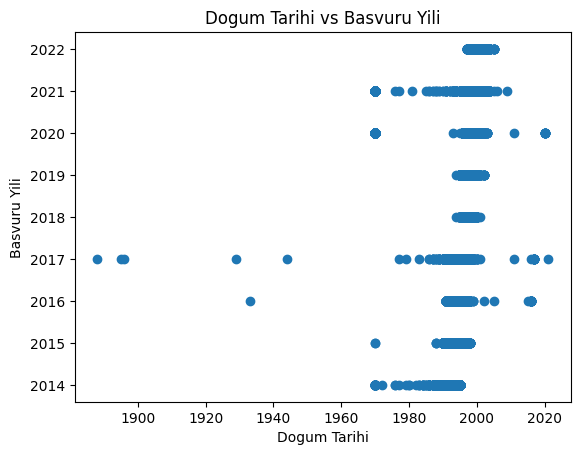

In [36]:
scatter_plot(df, 'Dogum Tarihi', 'Basvuru Yili')

In [37]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Dogum Tarihi"].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Dogum Tarihi
1995    7294
2000    7178
1999    6732
1998    6612
1997    6077
1996    5992
2001    5677
1993    4759
1994    4687
2002    3212
1992    2089
1970    1715
1991    1119
2003     737
1990     469
1989      62
1988      37
1987      25
2016      24
2004      23
1986      20
2017      11
2005       9
2020       9
1984       6
1985       5
1983       4
1976       3
1977       3
1980       2
2011       2
1979       2
1929       1
1982       1
1972       1
2015       1
2021       1
1933       1
1895       1
1944       1
1888       1
1896       1
2009       1
2006       1
1981       1


In [38]:
# Basvuru Yili sütununa göre yaş hesaplama fonksiyonu
def calculate_age(row):
    if pd.notna(row['Dogum Tarihi']):
        return row['Basvuru Yili'] - row['Dogum Tarihi']
    else:
        return np.nan

# 'Başvuru Yili'ne göre 'Dogum Tarihi' kullanarak yaş hesaplama
df['Basvuru Yilindaki Yas'] = df.apply(calculate_age, axis=1)

In [39]:
df.head(5)

Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi        Dogum Yeri  \
0          2014                 52.0    Erkek          1994  Altindag, Ankara   
1          2014                 30.0    Erkek          1993           Üsküdar   
2          2014                 18.0    Erkek          1986            Samsun   
3          2014                 40.0    Erkek          1991        Diyarbakır   
4          2014                 24.0    Erkek          1993   Ankara/Altındağ   

  Ikametgah Sehri                    Universite Adi Universite Turu  \
0          Ankara           İHSAN DOĞRAMACI BİLKENT            Özel   
1        İstanbul           İHSAN DOĞRAMACI BİLKENT            Özel   
2        İstanbul  ULUSLARARASI KIBRIS ÜNİVERSİTESİ            Özel   
3        İstanbul       İSTANBUL ŞEHİR ÜNİVERSİTESİ            Özel   
4          Ankara          TURGUT ÖZAL ÜNİVERSİTESİ            Özel   

   Burslu ise Burs Yuzdesi Burs Aliyor mu?  ...  \
0                    100.0            Evet  ...   
1                    100.0           Hayır  ...   
2                    100.0           Hayır  ...   
3                    100.0            Evet  ...   
4                    100.0            Evet  ...   

  Aktif olarak bir STK üyesi misiniz? Hangi STK'nin Uyesisiniz?  \
0                               Hayır                       NaN   
1                               Hayır                       NaN   
2                               Hayır                       NaN   
3                               Hayır                       NaN   
4                               Hayır                       NaN   

  Stk Projesine Katildiniz Mi? Girisimcilikle Ilgili Deneyiminiz Var Mi?  \
0                         Evet                                     Hayır   
1                         Evet                                      Evet   
2                        Hayır                                     Hayır   
3                         Evet                                     Hayır   
4                        Hayır                                     Hayır   

  Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?  \
0                                                NaN          
1  Bilkent Cyberparkta bir şirkette Türkiye nin i...          
2                                                NaN          
3                                                NaN          
4                                                NaN          

  Ingilizce Biliyor musunuz? Ingilizce Seviyeniz?  \
0                        NaN                  NaN   
1                        NaN                  NaN   
2                        NaN                  NaN   
3                        NaN                  NaN   
4                        NaN                  NaN   

  Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite id  \
0                                                NaN     0   
1                                                NaN     1   
2                                                NaN     2   
3                                                NaN     3   
4                                                NaN     4   

  Basvuru Yilindaki Yas  
0                    20  
1                    21  
2                    28  
3                    23  
4                    21  

[5 rows x 45 columns]

## 'Basvuru Yilindaki Yas' Sütunu

* Başvuru yılında yaşı 17'den küçük olan satırlar silinmiştir.
* Makine öğrenimi modeline 'Doğum Tarihi' yerine bu sütun dahil edilecektir.

In [40]:
df['Basvuru Yilindaki Yas'].describe()

count    64609.000000
mean        21.852018
std          5.007600
min         -4.000000
25%         20.000000
50%         21.000000
75%         22.000000
max        129.000000
Name: Basvuru Yilindaki Yas, dtype: float64

In [41]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Basvuru Yilindaki Yas"].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Basvuru Yilindaki Yas
 21     16320
 20     16014
 22     11803
 19      7724
 23      6714
 24      2887
 50      1104
 25       690
 51       565
 18       381
 26       104
 17        54
 27        48
 44        45
 0         43
 28        34
 30        18
 29        12
 31         7
 34         5
 38         3
 32         3
 33         3
 35         3
 45         3
 16         2
 1          2
 40         2
 88         1
 36         1
 12         1
 9          1
 121        1
 129        1
 83         1
 73         1
 122        1
 6          1
 11         1
 14         1
 42         1
-4          1
 37         1
 15         1


In [42]:
df['Basvuru Yilindaki Yas'].unique()

array([ 20,  21,  28,  23,  22,  19,  25,  24,  27,  44,  26,  18,  17,
         0,  -4,  50,  51,  31,  38,   6,  88,  29,  34,  37,  32,  30,
        35,  42,  45,  14,   1,  11,  83, 122,  73,  16, 129,  40, 121,
         9,  12,  33,  36,  15], dtype=int64)

In [43]:
df = df[(df['Basvuru Yilindaki Yas'] >= 17) & (df['Basvuru Yilindaki Yas'] <= 30)]

In [44]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Basvuru Yilindaki Yas"].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Basvuru Yilindaki Yas
21    16320
20    16014
22    11803
19     7724
23     6714
24     2887
25      690
18      381
26      104
17       54
27       48
28       34
30       18
29       12


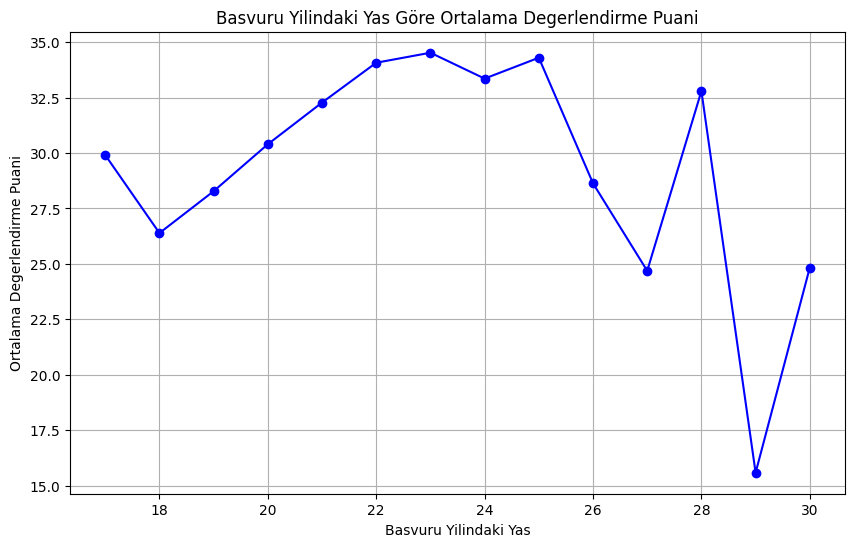

In [45]:
plot_average_scores(df, "Basvuru Yilindaki Yas", 'Degerlendirme Puani')

In [46]:
#'Basvuru Yilindaki Yas' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Basvuru Yilindaki Yas', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Basvuru Yilindaki Yas', 'Degerlendirme Puani']].corr()
print(correlation)


   Basvuru Yilindaki Yas  Degerlendirme Puani
0                     20                 52.0
1                     21                 30.0
2                     28                 18.0
3                     23                 40.0
4                     21                 24.0
                       Basvuru Yilindaki Yas  Degerlendirme Puani
Basvuru Yilindaki Yas               1.000000             0.098093
Degerlendirme Puani                 0.098093             1.000000


## 'Ikametgah Sehri' sütunu

* Verilerin yazılış formatı düzenlendi. 
* Eksik veriler en çok tekrar eden değer ile dolduruldu.
* Ikametgah Sehri göre Değerlendirme Puanları'nın ortalamaları grafik aracılığıyla kontrol edildi. 
* Ikametgah Sehri bilgisinin değerlendirme puanına etki etmeyeceği düşünüldüğünden işleme dahil edilmemiştir.

In [47]:
df['Ikametgah Sehri'].describe()

count        60985
unique         318
top       İstanbul
freq         15984
Name: Ikametgah Sehri, dtype: object

In [48]:
# 'Ikametgah Sehri' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Ikametgah Sehri'].isna().sum()
nan_count

1818

In [49]:
# NaN değerlerini en çok tekrar eden ile doldurulur
# 'Ikametgah Sehri' sütunundaki eksik değerler, en çok tekrar eden değerle doldurulur
most_common_embarked = df['Ikametgah Sehri'].value_counts().idxmax()
df['Ikametgah Sehri'].fillna(most_common_embarked, inplace=True)

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3202301724.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ikametgah Sehri'].fillna(most_common_embarked, inplace=True)


In [50]:
df['Ikametgah Sehri'].unique()

array(['Ankara', 'İstanbul', 'Esenler/İstanbul', 'Kayseri',
       'Bahçelievler/Ankara', 'İSTANBUL', 'İzmir', 'Kahramanmaraş',
       'Üsküdar/İstanbul', 'İZMİR', 'Trabzon', 'Kars', 'Kırşehir',
       'Gebze/Kocaeli', 'Buca/İzmir', 'Sarıyer/İstanbul', 'Ordu',
       'Osmaniye', 'Maltepe/İstanbul', 'Antalya', 'Florya/İstanbul',
       'Gaziosmanpaşa/İstanbul', 'Istanbul', 'Etimesgut/Ankara', 'Konya',
       'ANKARA', 'Bartın', 'Girne', 'Bingöl', 'Mersin', 'KAYSERİ',
       'BURSA', 'Manisa', 'Samsun', 'GÖLCÜK', 'Diyarbakır', 'istanbul',
       'Kırklareli', 'KOCAELİ', 'AYDIN', 'Zonguldak', 'Erzurum',
       'GAZİMAĞUSA', 'Bursa', 'DENİZLİ', 'Batman', 'Gaziantep', 'Aydın',
       'Kocaeli', 'Gazimağusa', 'Adana', 'Balıkesir', 'Şanlıurfa',
       'Sakarya', 'ANTALYA', 'Izmir', 'ADANA', 'NEVŞEHİR', 'KONYA',
       'ISTANBUL', 'Niğde', 'Arhavi', 'ankara', 'AKSARAY', 'Güzelyurt',
       'Kütahya', 'AFYONKARAHİSAR', 'Uşak', 'SAKARYA', 'Bolu', 'mersin',
       'izmir', 'Aksaray', 'Kastamonu',

In [51]:
# Veriler daha düzenli hale getirilir
# 'Ikametgah Sehri' sütunundaki değerleri küçük harfe çevirip baş harfi büyültme
df['Ikametgah Sehri'] = df['Ikametgah Sehri'].str.strip().str.capitalize()

# Değişiklikleri kontrol etme
print(df['Ikametgah Sehri'].value_counts())

Ikametgah Sehri
İstanbul                           17874
Ankara                              6390
Istanbul                            3478
İzmir                               3000
Bursa                               1741
                                   ...  
Kocamustafapaşa/fatih/i̇stanbul        1
Adapazarı/sakarya                      1
Seyhan/adana                           1
Kartal/i̇stanbul                       1
Keçiören/ankara                        1
Name: count, Length: 260, dtype: int64


In [52]:
def process_location(city):
    # Eksik değerler için kontrol
    if pd.isna(city) or city == '---':
        return np.nan
    # '/' veya ',' içerenleri işleme al
    if '/' in city or ',' in city:
        # '/' veya ',' ile ayrılmış parçaları al
        parts = re.split(r'[/,]', city)
        # En soldaki parçayı al
        return parts[0].strip()
    else:
        # '/' ve ',' içermeyen veriler olduğu gibi döndürülür
        return city

# 'Ikametgah Sehri' sütununu güncelle
df['Ikametgah Sehri'] = df['Ikametgah Sehri'].apply(process_location)

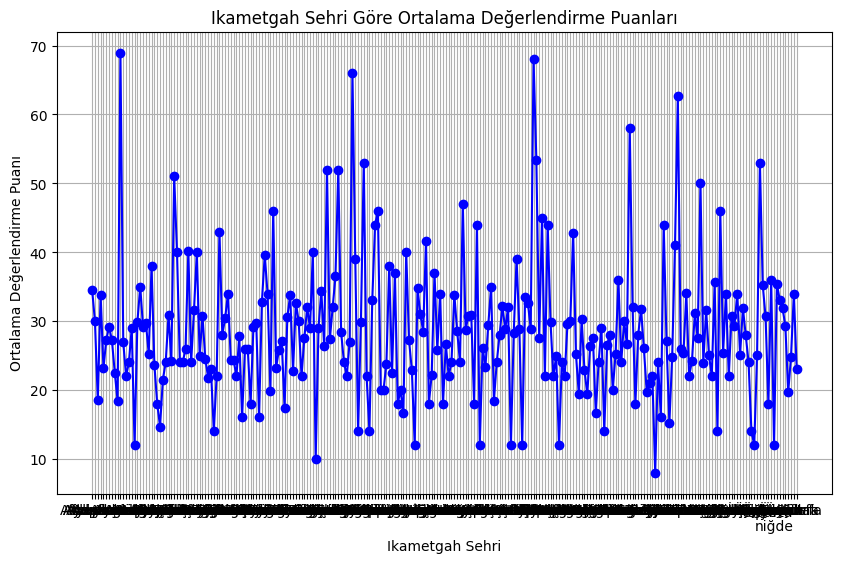

In [53]:
# Yıl bazında ortalama puanları hesaplama
ortalama_puanlar = df.groupby('Ikametgah Sehri')['Degerlendirme Puani'].mean()

# Çizgi grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.plot(ortalama_puanlar.index, ortalama_puanlar.values, marker='o', linestyle='-', color='b')
plt.title('Ikametgah Sehri Göre Ortalama Değerlendirme Puanları')
plt.xlabel('Ikametgah Sehri')
plt.ylabel('Ortalama Değerlendirme Puanı')
plt.grid(True)
plt.show()

In [54]:
df['Ikametgah Sehri'].unique()

array(['Ankara', 'İstanbul', 'Esenler', 'Kayseri', 'Bahçelievler',
       'İzmir', 'Kahramanmaraş', 'Üsküdar', 'İzmi̇r', 'Trabzon', 'Kars',
       'Kırşehir', 'Gebze', 'Buca', 'Sarıyer', 'Ordu', 'Osmaniye',
       'Maltepe', 'Antalya', 'Florya', 'Gaziosmanpaşa', 'Istanbul',
       'Etimesgut', 'Konya', 'Bartın', 'Girne', 'Bingöl', 'Mersin',
       'Kayseri̇', 'Bursa', 'Manisa', 'Samsun', 'Gölcük', 'Diyarbakır',
       'Kırklareli', 'Kocaeli̇', 'Aydin', 'Zonguldak', 'Erzurum',
       'Gazi̇mağusa', 'Deni̇zli̇', 'Batman', 'Gaziantep', 'Aydın',
       'Kocaeli', 'Gazimağusa', 'Adana', 'Balıkesir', 'Şanlıurfa',
       'Sakarya', 'Izmir', 'Nevşehi̇r', 'Niğde', 'Arhavi', 'Aksaray',
       'Güzelyurt', 'Kütahya', 'Afyonkarahi̇sar', 'Uşak', 'Bolu',
       'Kastamonu', 'K.maraş', 'Tekirdağ', 'Düzce', '------', 'Sinop',
       'Elazığ', 'Kırıkkale', 'Isparta', 'Ağrı', 'Giresun', 'Hatay',
       'Denizli', 'Çanakkale', 'Siirt', 'Sivas', 'Malatya', 'Muğla',
       'Şırnak', 'Hakkari', 'Mardin', 'V

In [55]:
# 'Ikametgah Sehri' sütunundaki '------' değerini içeren satırları çıkar
df = df[df['Ikametgah Sehri'] != '------']

In [56]:
unique_list = df["Ikametgah Sehri"].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/ikametgah_sehri.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")


In [57]:
city_dict = {
    'Ankara': 'Ankara',
    'İstanbul': 'İstanbul',
    'Esenler': 'İstanbul',
    'Kayseri': 'Kayseri',
    'Bahçelievler': 'İstanbul',
    'İzmir': 'İzmir',
    'Kahramanmaraş': 'Kahramanmaraş',
    'Üsküdar': 'İstanbul',
    'Trabzon': 'Trabzon',
    'Kars': 'Kars',
    'Kırşehir': 'Kırşehir',
    'Gebze': 'Kocaeli',
    'Buca': 'İzmir',
    'Sarıyer': 'İstanbul',
    'Ordu': 'Ordu',
    'Osmaniye': 'Osmaniye',
    'Maltepe': 'İstanbul',
    'Antalya': 'Antalya',
    'Florya': 'İstanbul',
    'Gaziosmanpaşa': 'İstanbul',
    'Istanbul': 'İstanbul',
    'Etimesgut': 'Ankara',
    'Konya': 'Konya',
    'Bartın': 'Bartın',
    'Girne': 'Yurt dışı',
    'Bingöl': 'Bingöl',
    'Mersin': 'Mersin',
    'Kayseri̇': 'Kayseri',
    'Bursa': 'Bursa',
    'Manisa': 'Manisa',
    'Samsun': 'Samsun',
    'Gölcük': 'Kocaeli',
    'Diyarbakır': 'Diyarbakır',
    'Kırklareli': 'Kırklareli',
    'Kocaeli̇': 'Kocaeli',
    'Aydin': 'Aydın',
    'Zonguldak': 'Zonguldak',
    'Erzurum': 'Erzurum',
    'Gazi̇mağusa': 'Yurt dışı',
    'Deni̇zli̇': 'Denizli',
    'Batman': 'Batman',
    'Gaziantep': 'Gaziantep',
    'Aydın': 'Aydın',
    'Kocaeli': 'Kocaeli',
    'Gazimağusa': 'Yurt dışı',
    'Adana': 'Adana',
    'Balıkesir': 'Balıkesir',
    'Şanlıurfa': 'Şanlıurfa',
    'Sakarya': 'Sakarya',
    'Izmir': 'İzmir',
    'Nevşehi̇r': 'Nevşehir',
    'Niğde': 'Niğde',
    'Arhavi': 'Artvin',
    'Aksaray': 'Aksaray',
    'Güzelyurt': 'Yurt dışı',
    'Kütahya': 'Kütahya',
    'Afyonkarahi̇sar': 'Afyonkarahisar',
    'Uşak': 'Uşak',
    'Bolu': 'Bolu',
    'Kastamonu': 'Kastamonu',
    'K.maraş': 'Kahramanmaraş',
    'Tekirdağ': 'Tekirdağ',
    'Düzce': 'Düzce',
    'Sinop': 'Sinop',
    'Elazığ': 'Elazığ',
    'Kırıkkale': 'Kırıkkale',
    'Isparta': 'Isparta',
    'Ağrı': 'Ağrı',
    'Giresun': 'Giresun',
    'Hatay': 'Hatay',
    'Denizli': 'Denizli',
    'Çanakkale': 'Çanakkale',
    'Siirt': 'Siirt',
    'Sivas': 'Sivas',
    'Malatya': 'Malatya',
    'Muğla': 'Muğla',
    'Şırnak': 'Şırnak',
    'Hakkari': 'Hakkari',
    'Mardin': 'Mardin',
    'Van': 'Van',
    'Stanbul': 'İstanbul',
    'Lefkoşa': 'Yurt dışı',
    'Lefke': 'Yurt dışı',
    'Agri': 'Ağrı',
    'Adiyaman': 'Adıyaman',
    'Erzincan': 'Erzincan',
    'Diger': 'Yurt dışı',
    'Bayburt': 'Bayburt',
    'Sanliurfa': 'Şanlıurfa',
    'Eskisehir': 'Eskişehir',
    'Balikesir': 'Balıkesir',
    'Tekirdag': 'Tekirdağ',
    'Yozgat': 'Yozgat',
    'Çorum': 'Çorum',
    'Karabük': 'Karabük',
    'Mugla': 'Muğla',
    'Nigde': 'Niğde',
    'Bitlis': 'Bitlis',
    'Amasya': 'Amasya',
    'Tunceli': 'Tunceli',
    'Sirnak': 'Şırnak',
    'Edirne': 'Edirne',
    'Çankiri': 'Çankırı',
    'Kahramanmaras': 'Kahramanmaraş',
    'Ardahan': 'Ardahan',
    'Usak': 'Uşak',
    'Tokat': 'Tokat',
    'Yalova': 'Yalova',
    'Elazig': 'Elazığ',
    'Karaman': 'Karaman',
    'Burdur': 'Burdur',
    'Diyarbakir': 'Diyarbakır',
    'Gümüshane': 'Gümüşhane',
    'Kirklareli': 'Kırklareli',
    'Mus': 'Muş',
    'Hakkâri': 'Hakkari',
    'Artvin': 'Artvin',
    'Kirikkale': 'Kırıkkale',
    'Igdir': 'Iğdır',
    'Iğdir': 'Iğdır',
    'Eskişehir': 'Eskişehir',
    'Rize': 'Rize',
    'Iğdır': 'Iğdır',
    'Muş': 'Muş',
    'Adıyaman': 'Adıyaman',
    'Bilecik': 'Bilecik',
    'Afyonkarahisar': 'Afyonkarahisar',
    'Diğer': 'Yurt dışı',
    'Nevşehir': 'Nevşehir',
    'Gümüşhane': 'Gümüşhane',
    'Çankırı': 'Çankırı',
    'Ünye': 'Ordu',
    'Afyon': 'Afyonkarahisar',
    'Kağıthane': 'İstanbul',
    'Polatlı': 'Ankara',
    'Esenyurt': 'İstanbul',
    'Bahçeşehir': 'İstanbul',
    'Yahyalı': 'Kayseri',
    'Zeytinburnu': 'İstanbul',
    'Hamburg': 'Yurt dışı',
    'Kilis': 'Kilis',
    'Feriköy': 'İstanbul',
    'Çankaya': 'Ankara',
    'Nevsehir': 'Nevşehir',
    'Mani̇sa': 'Manisa',
    'Di̇yarbakir': 'Diyarbakır',
    'Mersi̇n': 'Mersin',
    'Alaplı': 'Zonguldak',
    'Kırgızistan-bişkek': 'Yurt dışı',
    'İstanbul': 'İstanbul',
    'niğde': 'Niğde',
    'İskenderun': 'Hatay',
    'Ataşehir': 'İstanbul',
    'Gemlik': 'Bursa',
    'Aliağa': 'İzmir',
    'Palandöken': 'Erzurum',
    'Çiğli': 'İzmir',
    'Güngören': 'İstanbul',
    'Silivri': 'İstanbul',
    'Konak': 'İzmir',
    'Gönen': 'Balıkesir',
    'Beşiktaş': 'İstanbul',
    'Bağlar': 'Diyarbakır',
    'Fatih': 'İstanbul',
    'Kartal': 'İstanbul',
    'Seyhan': 'Adana',
    'Adapazarı': 'Sakarya',
    'İzmit': 'Kocaeli',
    'Kocamustafapaşa': 'İstanbul',
    'Nürnberg': 'Yurt dışı',
    'Yunusemre': 'Manisa',
    'Bigadiç': 'Balıkesir',
    'Keçiören': 'Ankara',
    'Bornova': 'İzmir',
    'Balçova': 'İzmir',
    'Kadıköy': 'İstanbul',
    'Eski̇şehi̇r': 'Eskişehir',
    'Eryaman': 'Ankara',
    'Şile': 'İstanbul',
    'Kktc': 'Yurt dışı',
    'Hacettepe': 'Ankara',
    'Avcılar': 'İstanbul',
    'Beylikdüzü': 'İstanbul',
    'Antakya': 'Hatay',
    'Odtü': 'Ankara',
    'Dilovası': 'Kocaeli',
    'Çaycuma': 'Zonguldak',
    'Kaman': 'Kırşehir',
    'Bilkent': 'Ankara',
    'Derince': 'Kocaeli',
    'Bartin': 'Bartın',
    'Darıca': 'Kocaeli',
    'Sincan': 'Ankara',
    'Yenibosna': 'İstanbul',
    'Çirişhanee': 'Yurt dışı',
    'Mamak': 'Ankara',
    'Kepez': 'Antalya',
    'Bağcılar': 'İstanbul',
    'Akhisar': 'Manisa',
    'Fethiye': 'Muğla',
    'Odunpazarı': 'Eskişehir',
    'Bakırköy': 'İstanbul',
    'Ortaca': 'Muğla',
    'Gündoğmuş': 'Antalya',
    'Söke': 'Aydın',
    'Nilüfer': 'Bursa',
    'Merkez': 'Yurt dışı',
    'Mersin-adana': 'Mersin',
    'Melikgazi': 'Kayseri',
    'Orhangazi': 'Bursa',
    'Gotham': 'Yurt dışı',
    'Gothamcity': 'Yurt dışı',
    'İzmi̇t': 'Kocaeli',
    'Bodrum': 'Muğla',
    'Göle': 'Ardahan',
    'Gazi̇antep': 'Gaziantep',
    'Iskenderun': 'Hatay',
    'Teki̇rdağ': 'Tekirdağ',
    'Balikesi̇r': 'Balıkesir',
    'Manavgat': 'Antalya',
    'Elaziğ': 'Elazığ',
    'Izmit': 'Kocaeli',
    'Kahta': 'Adıyaman',
    'Kuşadası': 'Aydın',
    'Kirklareli̇': 'Kırklareli',
    'Si̇vas': 'Sivas',
    'Adapazari': 'Sakarya',
    'İzmir': 'İzmir',
    'Yenişehir': 'Bursa',
    'İsparta': 'Isparta',
    'Tunceli̇': 'Tunceli',
    'Bozüyük': 'Bilecik',
    'Selçuk': 'İzmir',
    'Iğdır': 'Iğdır',
    'Gi̇resun': 'Giresun',
    'Şanliurfa': 'Şanlıurfa',
    'Mardi̇n': 'Mardin',
    'Oslo': 'Yurt dışı',
    'Erzi̇ncan': 'Erzincan',
    'Alanya': 'Antalya',
    'Osmani̇ye': 'Osmaniye',
    'Openairequestfailedtimeout': 'Yurt dışı',
    'Çerkezköy': 'Tekirdağ',
    'Kirşehi̇r': 'Kırşehir',
    'Bakü': 'Yurt dışı',
    'Bucak': 'Burdur',
    'Bandırma': 'Balıkesir',
    'Artvi̇n': 'Artvin',
    'Akçaabat': 'Trabzon',
    'Kirsehir': 'Kırşehir',
    'İstanbul\nniğde': 'İstanbul'
}


In [58]:
# 'Ikametgah Sehri' sütununu dönüştür
df['Ikametgah Sehri'] = df['Ikametgah Sehri'].replace(city_dict)

df['Ikametgah Sehri'].unique()

array(['Ankara', 'İstanbul', 'Kayseri', 'İzmir', 'Kahramanmaraş',
       'İzmi̇r', 'Trabzon', 'Kars', 'Kırşehir', 'Kocaeli', 'Ordu',
       'Osmaniye', 'Antalya', 'Konya', 'Bartın', 'Yurt dışı', 'Bingöl',
       'Mersin', 'Bursa', 'Manisa', 'Samsun', 'Diyarbakır', 'Kırklareli',
       'Aydın', 'Zonguldak', 'Erzurum', 'Denizli', 'Batman', 'Gaziantep',
       'Adana', 'Balıkesir', 'Şanlıurfa', 'Sakarya', 'Nevşehir', 'Niğde',
       'Artvin', 'Aksaray', 'Kütahya', 'Afyonkarahisar', 'Uşak', 'Bolu',
       'Kastamonu', 'Tekirdağ', 'Düzce', 'Sinop', 'Elazığ', 'Kırıkkale',
       'Isparta', 'Ağrı', 'Giresun', 'Hatay', 'Çanakkale', 'Siirt',
       'Sivas', 'Malatya', 'Muğla', 'Şırnak', 'Hakkari', 'Mardin', 'Van',
       'Adıyaman', 'Erzincan', 'Bayburt', 'Eskişehir', 'Yozgat', 'Çorum',
       'Karabük', 'Bitlis', 'Amasya', 'Tunceli', 'Edirne', 'Çankırı',
       'Ardahan', 'Tokat', 'Yalova', 'Karaman', 'Burdur', 'Gümüşhane',
       'Muş', 'Iğdır', 'Rize', 'Bilecik', 'Kilis'], dtype=object)

In [59]:
# Şehirlerin bölgelere göre sınıflandırılması
def classify_city(city_name):
    city_name = city_name.strip().title()  # İlk harfler büyük, diğer harfler küçük
    if city_name in ['İstanbul', 'Bursa', 'Kocaeli', 'Tekirdağ', 'Edirne', 'Yalova', 'Sakarya', 'Bilecik', 'Bolu', 'Kırklareli']:
        return 'Marmara'
    elif city_name in ['İzmir', 'Manisa', 'Aydın', 'Denizli', 'Muğla', 'Uşak', 'Afyonkarahisar', 'Kütahya']:
        return 'Ege'
    elif city_name in ['Ankara', 'Konya', 'Eskişehir', 'Kayseri', 'Karaman', 'Aksaray', 'Kırıkkale', 'Niğde', 'Çorum']:
        return 'İç Anadolu'
    elif city_name in ['Antalya', 'Adana', 'Mersin', 'Isparta', 'Burdur', 'Osmaniye', 'Hatay']:
        return 'Akdeniz'
    elif city_name in ['Trabzon', 'Ordu', 'Giresun', 'Rize', 'Bartın', 'Zonguldak', 'Artvin', 'Bayburt']:
        return 'Karadeniz'
    elif city_name in ['Gaziantep', 'Şanlıurfa', 'Diyarbakır', 'Mardin', 'Batman', 'Siirt', 'Kilis', 'Adıyaman']:
        return 'Güneydoğu Anadolu'
    elif city_name in ['Erzurum', 'Van', 'Malatya', 'Elazığ', 'Bingöl', 'Ağrı', 'Iğdır', 'Ardahan', 'Kars', 'Tunceli', 'Hakkari']:
        return 'Doğu Anadolu'
    else:
        return 'Yurt dışı'

# 'sehir' sütununu kullanarak bölge sınıflandırmasını yapma
df['Ikametgah Bolgesi'] = df['Ikametgah Sehri'].apply(classify_city)

print(df)

       Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi  \
0              2014                 52.0    Erkek          1994   
1              2014                 30.0    Erkek          1993   
2              2014                 18.0    Erkek          1986   
3              2014                 40.0    Erkek          1991   
4              2014                 24.0    Erkek          1993   
...             ...                  ...      ...           ...   
65119          2022                  0.0    Erkek          2003   
65120          2022                  0.0    Erkek          2003   
65121          2022                  0.0    Erkek          2002   
65122          2022                  0.0    Erkek          1999   
65123          2022                  0.0    Erkek          2000   

             Dogum Yeri Ikametgah Sehri                    Universite Adi  \
0      Altindag, Ankara          Ankara           İHSAN DOĞRAMACI BİLKENT   
1               Üsküdar        İstanbul  

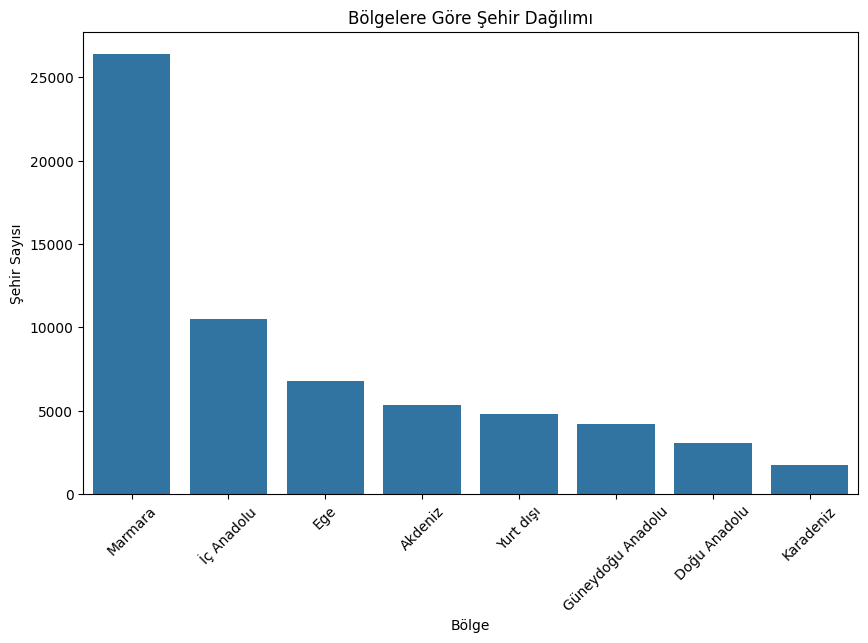

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bölge frekansları
region_counts = df['Ikametgah Bolgesi'].value_counts()

# Çubuk grafik
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.xlabel('Bölge')
plt.ylabel('Şehir Sayısı')
plt.title('Bölgelere Göre Şehir Dağılımı')
plt.xticks(rotation=45)
plt.show()

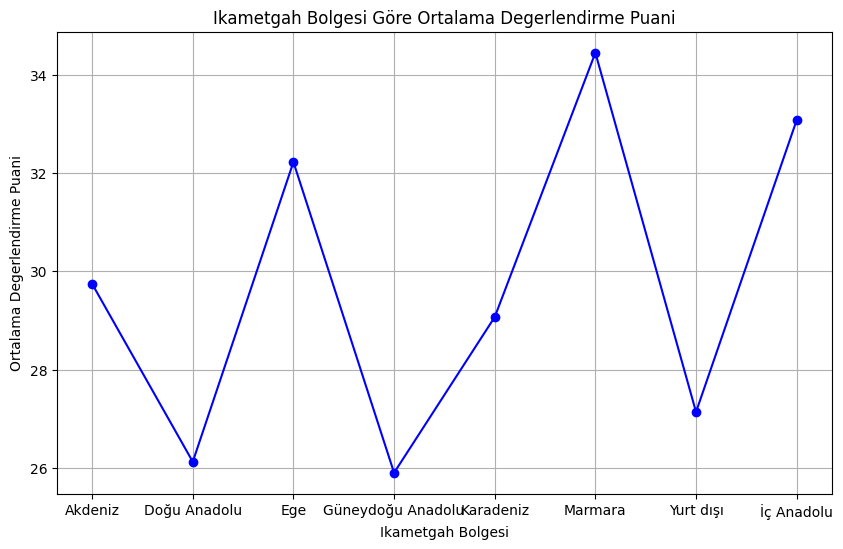

In [61]:
plot_average_scores(df, 'Ikametgah Bolgesi', 'Degerlendirme Puani')

In [62]:
df['Ikametgah Bolgesi'] = df['Ikametgah Bolgesi'].replace({
    'Doğu Anadolu': 0,
    'Güneydoğu Anadolu': 0,
    'Yurt dışı': 0,
    'Akdeniz' : 1,
    'Karadeniz' : 1,
    'Ege' : 2,
    'Marmara': 2,
    'İç Anadolu' : 2
})

# Sonuçları görmek için
print(df['Ikametgah Bolgesi'].unique())


[2 0 1]


C:\Users\havva\AppData\Local\Temp\ipykernel_14492\1605584249.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ikametgah Bolgesi'] = df['Ikametgah Bolgesi'].replace({


In [63]:
#'Ikametgah Bolgesi' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Ikametgah Bolgesi', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Ikametgah Bolgesi', 'Degerlendirme Puani']].corr()
print(correlation)


   Ikametgah Bolgesi  Degerlendirme Puani
0                  2                 52.0
1                  2                 30.0
2                  2                 18.0
3                  2                 40.0
4                  2                 24.0
                     Ikametgah Bolgesi  Degerlendirme Puani
Ikametgah Bolgesi             1.000000             0.165722
Degerlendirme Puani           0.165722             1.000000


In [64]:
df['Ikametgah Sehri'].unique()

array(['Ankara', 'İstanbul', 'Kayseri', 'İzmir', 'Kahramanmaraş',
       'İzmi̇r', 'Trabzon', 'Kars', 'Kırşehir', 'Kocaeli', 'Ordu',
       'Osmaniye', 'Antalya', 'Konya', 'Bartın', 'Yurt dışı', 'Bingöl',
       'Mersin', 'Bursa', 'Manisa', 'Samsun', 'Diyarbakır', 'Kırklareli',
       'Aydın', 'Zonguldak', 'Erzurum', 'Denizli', 'Batman', 'Gaziantep',
       'Adana', 'Balıkesir', 'Şanlıurfa', 'Sakarya', 'Nevşehir', 'Niğde',
       'Artvin', 'Aksaray', 'Kütahya', 'Afyonkarahisar', 'Uşak', 'Bolu',
       'Kastamonu', 'Tekirdağ', 'Düzce', 'Sinop', 'Elazığ', 'Kırıkkale',
       'Isparta', 'Ağrı', 'Giresun', 'Hatay', 'Çanakkale', 'Siirt',
       'Sivas', 'Malatya', 'Muğla', 'Şırnak', 'Hakkari', 'Mardin', 'Van',
       'Adıyaman', 'Erzincan', 'Bayburt', 'Eskişehir', 'Yozgat', 'Çorum',
       'Karabük', 'Bitlis', 'Amasya', 'Tunceli', 'Edirne', 'Çankırı',
       'Ardahan', 'Tokat', 'Yalova', 'Karaman', 'Burdur', 'Gümüşhane',
       'Muş', 'Iğdır', 'Rize', 'Bilecik', 'Kilis'], dtype=object)

In [65]:
#Şehir isimleri ve kademe puanlarını içeren veri
city_to_kademe = {
    'Yurt dışı': 1, 'İstanbul': 1, 'Ankara': 1, 'İzmir': 1, 'İzmi̇r': 1, 'Kocaeli': 1, 'Antalya': 1, 'Bursa': 1, 'Eskişehir': 1, 'Muğla': 1,
    'Tekirdağ': 1, 'Denizli': 2, 'Sakarya': 2, 'Yalova': 2, 'Bolu': 2, 'Konya': 2, 'Aydın': 2, 'Isparta': 2, 
    'Kayseri': 2, 'Kırklareli': 2, 'Bilecik': 2, 'Çanakkale': 2, 'Edirne': 2, 'Karabük': 2, 'Manisa': 2, 
    'Balıkesir': 2,'Düzce': 3, 'Mersin': 3, 'Trabzon': 3, 'Adana': 3, 'Zonguldak': 3, 'Uşak': 3, 'Gaziantep': 3, 
    'Samsun': 3, 'Burdur': 3, 'Kırıkkale': 3, 'Düzce': 3, 'Karaman': 3, 'Rize': 3, 'Kütahya': 3, 'Amasya': 4, 
    'Hatay': 4, 'Nevşehir': 4, 'Afyonkarahisar': 4, 'Elazığ': 4, 'Kırşehir': 4, 'Malatya': 4, 'Sivas': 4, 
    'Bartın': 4, 'Erzincan': 4, 'Kastamonu': 4, 'Artvin': 4, 'Çorum': 4, 'Aksaray': 4, 'Sinop': 5, 'Giresun': 5, 
    'Osmaniye': 5, 'Çankırı': 5, 'Tokat': 5, 'Niğde': 5, 'Kahramanmaraş': 5, 'Tunceli': 5, 'Ordu': 5, 'Erzurum': 5, 
    'Kilis': 5, 'Yozgat': 5, 'Gümüşhane': 5, 'Bayburt': 5, 'Adıyaman': 6, 'Ardahan': 6, 'Diyarbakır': 6, 
    'Kars': 6, 'Iğdır': 6, 'Bingöl': 6, 'Batman': 6, 'Şanlıurfa': 6, 'Mardin': 6, 'Siirt': 6, 'Bitlis': 6, 
    'Van': 6, 'Hakkari': 6, 'Muş': 6, 'Ağrı': 6, 'Şırnak': 6
}


# Şehir isimlerine göre kademe puanlarını 'Ikametgah Sehri' sütununa göre eşleştir
df['Ikametgah Sehri Kademe Puani'] = df['Ikametgah Sehri'].map(city_to_kademe)


In [66]:
df['Ikametgah Sehri Kademe Puani'].unique()

array([1, 2, 5, 3, 6, 4], dtype=int64)

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(df, score_column, year_column):
    plt.figure(figsize=(12, 8))
    sns.histplot(data=df, x=score_column, hue=year_column, multiple="stack", palette="Set2", kde=False)
    
    plt.title('Ikametgah Sehri Kademe Puani Dağılımı (Başvuru Yılına Göre)')
    plt.xlabel('Ikametgah Sehri Kademe Puani')
    plt.ylabel('Frekans')
    plt.legend(title='Başvuru Yılı')
    plt.grid(True)
    plt.show()

# Kullanım:
# plot_histogram(df, 'Ikametgah Sehri Kademe Puani', 'Basvuru Yili')

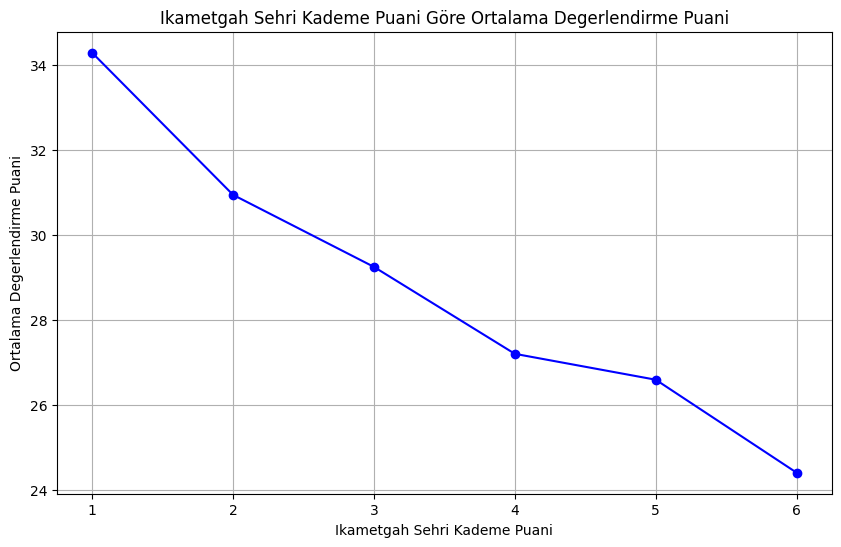

In [68]:
plot_average_scores(df, 'Ikametgah Sehri Kademe Puani', 'Degerlendirme Puani')

In [69]:
#'Ikametgah Sehri Kademe Puani' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Ikametgah Sehri Kademe Puani', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Ikametgah Sehri Kademe Puani', 'Degerlendirme Puani']].corr()
print(correlation)


   Ikametgah Sehri Kademe Puani  Degerlendirme Puani
0                             1                 52.0
1                             1                 30.0
2                             1                 18.0
3                             1                 40.0
4                             1                 24.0
                              Ikametgah Sehri Kademe Puani  \
Ikametgah Sehri Kademe Puani                      1.000000   
Degerlendirme Puani                              -0.185845   

                              Degerlendirme Puani  
Ikametgah Sehri Kademe Puani            -0.185845  
Degerlendirme Puani                      1.000000  


## 'Universite Adi' sütunu

In [70]:
df['Universite Adi'].describe()

count                     62684
unique                      527
top       İSTANBUL ÜNİVERSİTESİ
freq                       2033
Name: Universite Adi, dtype: object

In [71]:
df['Universite Adi'].unique()

array(['İHSAN DOĞRAMACI BİLKENT', 'ULUSLARARASI KIBRIS ÜNİVERSİTESİ',
       'İSTANBUL ŞEHİR ÜNİVERSİTESİ', 'TURGUT ÖZAL ÜNİVERSİTESİ',
       'İSTANBUL TİCARET ÜNİVERSİTESİ', 'İSTANBUL MEDİPOL ÜNİVERSİTESİ',
       'FATİH SULTAN MEHMET VAKIF', 'BAHÇEŞEHİR ÜNİVERSİTESİ',
       'NUH NACİ YAZGAN ÜNİVERSİTESİ', 'FATİH ÜNİVERSİTESİ',
       'BAŞKENT ÜNİVERSİTESİ', 'ÇAĞ ÜNİVERSİTESİ', 'İZMİR ÜNİVERSİTESİ',
       'ZİRVE ÜNİVERSİTESİ', 'YAŞAR ÜNİVERSİTESİ',
       'İSTANBUL AREL ÜNİVERSİTESİ', 'TED ÜNİVERSİTESİ',
       'YENİ YÜZYIL ÜNİVERSİTESİ', 'İZMİR EKONOMİ ÜNİVERSİTESİ',
       'İSTANBUL BİLGİ ÜNİVERSİTESİ', 'İSTANBUL GELİŞİM ÜNİVERSİTESİ',
       'BEYKENT ÜNİVERSİTESİ', 'AVRASYA ÜNİVERSİTESİ',
       'OKAN ÜNİVERSİTESİ', 'KOÇ ÜNİVERSİTESİ', 'HALİÇ ÜNİVERSİTESİ',
       'IŞIK ÜNİVERSİTESİ', 'ATILIM ÜNİVERSİTESİ',
       'NİŞANTAŞI ÜNİVERSİTESİ', 'İSTANBUL AYDIN ÜNİVERSİTESİ',
       'UFUK ÜNİVERSİTESİ', 'SABANCI ÜNİVERSİTESİ',
       'İSTANBUL 29 MAYIS ÜNİVERSİTESİ', 'MALTEPE ÜNİVERSİ

In [72]:
# 'Universite Adi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Universite Adi'].isna().sum()
nan_count

80

In [73]:
# 'Universite Adi' sütunundaki NaN değerler silinir
df = df.dropna(subset=['Universite Adi'])

In [74]:
# Universite Adi sütunundaki değerlerin baş harflerini büyük yapma
df['Universite Adi'] = df['Universite Adi'].str.strip().str.title()

# Değişiklikleri kontrol etme
print(df['Universite Adi'].value_counts())

Universite Adi
İstanbul Üni̇versi̇tesi̇                   2033
Marmara Üni̇versi̇tesi̇                    1611
İstanbul Tekni̇k Üni̇versi̇tesi̇           1437
Yildiz Tekni̇k Üni̇versi̇tesi̇             1395
Orta Doğu Tekni̇k Üni̇versi̇tesi̇          1243
                                           ... 
Harp Akademi̇leri̇ (Kara, Deni̇z,             1
University Of Southern California             1
Brown University                              1
Kahramanmaraş İsti̇klal Üni̇versi̇tesi̇       1
İstanbul Atlas Üniversitesi                   1
Name: count, Length: 526, dtype: int64


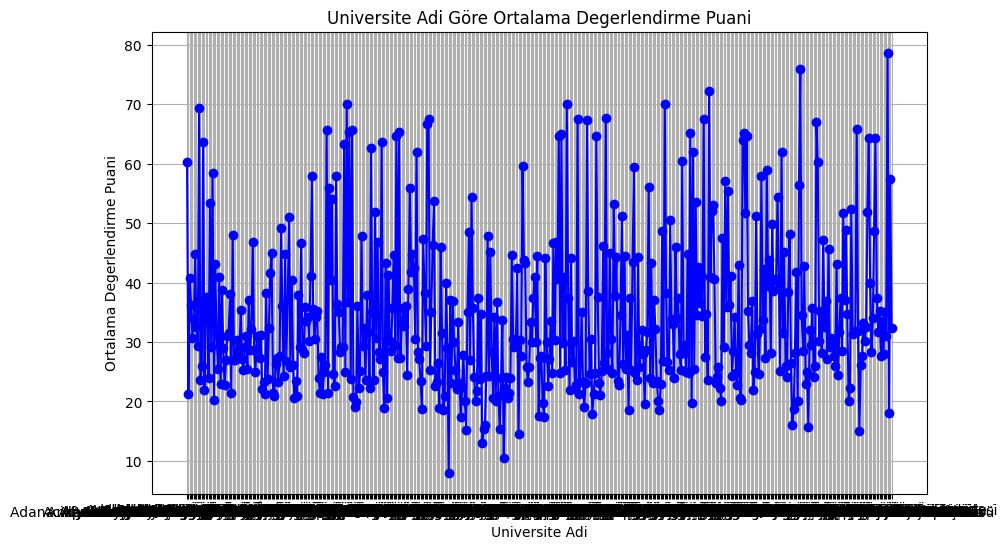

In [75]:
plot_average_scores(df, 'Universite Adi', 'Degerlendirme Puani')

In [76]:
import pandas as pd

# Üniversiteleri ve puanlarını içeren veri çerçevesi
data = {
    'Koç Üniversitesi': 1126.41,
    'Hacettepe Üniversitesi': 1072.82,
    'Orta Doğu Teknik Üniversitesi (ODTÜ)': 1060.65,
    'Ankara Üniversitesi': 1032.49,
    'İstanbul Teknik Üniversitesi (İTÜ)': 1032,
    'İstanbul Üniversitesi': 1029.22,
    'Sabancı Üniversitesi': 996.84,
    'Gazi Üniversitesi': 981.81,
    'Ege Üniversitesi': 978.84,
    'İstanbul Üniversitesi-Cerrahpaşa': 954.44,
    'İhsan Doğramacı Bilkent Üniversitesi': 922.39,
    'Gebze Teknik Üniversitesi': 917.82,
    'Marmara Üniversitesi': 914.39,
    'Yıldız Teknik Üniversitesi': 909.98,
    'Erciyes Üniversitesi': 909.8,
    'Atatürk Üniversitesi': 884.68,
    'Boğaziçi Üniversitesi': 878.9,
    'Dokuz Eylül Üniversitesi': 873.09,
    'Fırat Üniversitesi': 870.13,
    'Çukurova Üniversitesi': 864.64,
    'İzmir Yüksek Teknoloji Enstitüsü': 862.47,
    'Karadeniz Teknik Üniversitesi': 859.04,
    'Selçuk Üniversitesi': 853.78,
    'Akdeniz Üniversitesi': 848.62,
    'Acıbadem Mehmet Ali Aydınlar Üniversitesi': 842.03,
    '19 Mayıs Üniversitesi': 824.76,
    'Bursa Uludağ Üniversitesi': 820.19,
    'Bezm-i Alem Vakıf Üniversitesi': 810.85,
    'Sağlık Bilimleri Üniversitesi': 803.83,
    'Eskişehir Osmangazi Üniversitesi': 797.22,
    'Sakarya Üniversitesi': 796.6,
    'İnönü Üniversitesi': 787.25,
    'Çankaya Üniversitesi': 777.56,
    'Kocaeli Üniversitesi': 774.61,
    'İzmir Kâtip Çelebi Üniversitesi': 772.83,
    'Süleyman Demirel Üniversitesi': 765.18,
    'Ankara Yıldırım Beyazıt Üniversitesi': 764.22,
    'İstanbul Medeniyet Üniversitesi': 758.05,
    'Van 100. Yıl Üniversitesi': 753.5,
    'İstanbul Medipol Üniversitesi': 749,
    'Gaziantep Üniversitesi': 735.49,
    'Necmettin Erbakan Üniversitesi': 734.68,
    'Mersin Üniversitesi': 729.85,
    'Anadolu Üniversitesi': 717.56,
    'Yeditepe Üniversitesi': 712.49,
    'Bolu Abant İzzet Baysal Üniversitesi': 712.39,
    'Eskişehir Teknik Üniversitesi': 711.33,
    'Pamukkale Üniversitesi': 706.47,
    'TOBB Ekonomi ve Teknoloji Üniversitesi': 705.53,
    'Abdullah Gül Üniversitesi': 705.46,
    'Manisa Celal Bayar Üniversitesi': 705.14,
    'Recep Tayyip Erdoğan Üniversitesi': 704.41,
    'Başkent Üniversitesi': 704.3,
    'Sivas Cumhuriyet Üniversitesi': 703.88,
    'Harran Üniversitesi': 701.92,
    'Düzce Üniversitesi': 697.74,
    'İstinye Üniversitesi': 692.18,
    'Muğla Sıtkı Koçman Üniversitesi': 687.61,
    'Aydın Adnan Menderes Üniversitesi': 686.89,
    'Karabük Üniversitesi': 686.39,
    'Çanakkale 18 Mart Üniversitesi': 683.79,
    'Konya Teknik Üniversitesi': 680.57,
    'Özyeğin Üniversitesi': 680.1,
    'Bahçeşehir Üniversitesi': 677.08,
    'Kadir Has Üniversitesi': 676.69,
    'Bingöl Üniversitesi': 675.71,
    'Niğde Ömer Halisdemir Üniversitesi': 670.63,
    'Kahramanmaraş Sütçü İmam Üniversitesi': 655.17,
    'Atılım Üniversitesi': 655.1,
    'Afyon Kocatepe Üniversitesi': 647.61,
    'Tekirdağ Namık Kemal Üniversitesi': 641.72,
    'Karamanoğlu Mehmetbey Üniversitesi': 641.5,
    'Bursa Teknik Üniversitesi': 640.67,
    'Trakya Üniversitesi': 640.36,
    'Adana Alparslan Türkeş Bilim ve Teknoloji Üniversitesi': 638.17,
    'Bartın Üniversitesi': 636.11,
    'Aksaray Üniversitesi': 627.82,
    'Hasan Kalyoncu Üniversitesi': 624.72,
    'Kırıkkale Üniversitesi': 623.39,
    'Hitit Üniversitesi': 623.12,
    'Kastamonu Üniversitesi': 621.34,
    'Erzurum Teknik Üniversitesi': 617.99,
    'Biruni Üniversitesi': 616.5,
    'Tokat Gaziosmanpaşa Üniversitesi': 612.38,
    'Isparta Uygulamalı Bilimler Üniversitesi': 611.96,
    'İskenderun Teknik Üniversitesi': 609.5,
    'Ordu Üniversitesi': 608.12,
    'Zonguldak Bülent Ecevit Üniversitesi': 608.01,
    'Yozgat Bozok Üniversitesi': 605.59,
    'Erzincan Binali Yıldırım Üniversitesi': 603.56,
    'Hatay Mustafa Kemal Üniversitesi': 599.34,
    'Dicle Üniversitesi': 598.11,
    'Burdur Mehmet Akif Ersoy Üniversitesi': 593.42,
    'Balıkesir Üniversitesi': 592.32,
    'Adıyaman Üniversitesi': 591.91,
    'Çankırı Karatekin Üniversitesi': 590.09,
    'Siirt Üniversitesi': 588.55,
    'İzmir Ekonomi Üniversitesi': 586.99,
    'Yaşar Üniversitesi': 586.97,
    'Kırşehir Ahi Evran Üniversitesi': 582.78,
    'Bilecik Şey Edebali Üniversitesi': 581.46,
    'Uşak Üniversitesi': 580.2,
    'Munzur Üniversitesi': 576.21,
    'Giresun Üniversitesi': 575.71,
    'Tarsus Üniversitesi': 570.58,
    'Konya Gıda ve Tarım Üniversitesi': 567.86,
    'Osmaniye Korkut Ata Üniversitesi': 566.55,
    'Iğdır Üniversitesi': 564.73,
    'Nevşehir Hacı Bektaş Veli Üniversitesi': 563.48,
    'Kafkas Üniversitesi': 561.56,
    'Bayburt Üniversitesi': 560.38,
    'Sinop Üniversitesi': 558.43,
    'İstanbul Bilgi Üniversitesi': 555.51,
    'Altınbaş Üniversitesi': 553.21,
    'İstanbul Sabahattin Zaim Üniversitesi': 550.87,
    'Yalova Üniversitesi': 548.12,
    'Artvin Çoruh Üniversitesi': 545.31,
    'Sakarya Uygulamalı Bilimler Üniversitesi': 543.64,
    'Galatasaray Üniversitesi': 542.42,
    'TED Üniversitesi': 537.66,
    'Kütahya Dumlupınar Üniversitesi': 536.89,
    'Antalya Bilim Üniversitesi': 535.34,
    'İbn Haldun Üniversitesi': 532.89,
    'İstanbul Ticaret Üniversitesi': 530.23,
    'Ardahan Üniversitesi': 526.72,
    'Malatya Turgut Özal Üniversitesi': 523.14,
    'İstanbul Arel Üniversitesi': 520.67,
    'İstanbul Okan Üniversitesi': 518.34,
    'İstanbul Aydın Üniversitesi': 515.02,
    'Gümüşhane Üniversitesi': 510.78,
    'Ağrı İbrahim Çeçen Üniversitesi': 508.56,
    'İstanbul Gelişim Üniversitesi': 506.45,
    'Demiroğlu Bilim Üniversitesi': 504.31,
    'Amasya Üniversitesi': 503.22,
    'Muş Alparslan Üniversitesi': 501.19,
    'Üsküdar Üniversitesi': 500.11,
    'Alanya Alaaddin Keykubat Üniversitesi': 498.02,
    'Piri Reis Üniversitesi': 496.54,
    'KTO Karatay Üniversitesi': 494.89,
    'Bitlis Eren Üniversitesi Yüksek İhtisas Üniversitesi': 493.72,
    'Kütahya Sağlık Bilimleri Üniversitesi': 492.87,
    'Çorum Hitit Üniversitesi': 491.99,
    'Uşak Üniversitesi Sosyal Bilimler Enstitüsü': 489.56,
    'Batman Üniversitesi': 487.71,
    'T.C. Malatya Turgut Özal Üniversitesi': 485.67,
    'Kocaeli Üniversitesi Sağlık Bilimleri Fakültesi': 484.32,
    'Burdur Mehmet Akif Ersoy Üniversitesi Yüksek Lisans Programı': 482.89,
    'Üsküdar Üniversitesi Lisans Programı': 480.98,
    'Gümüşhane Üniversitesi Lisans Programı': 478.67,
    'Ege Üniversitesi Lisans Programı': 476.45,
    'İzmir Yüksek Teknoloji Enstitüsü Lisans Programı': 474.12
}

# Puan aralıklarını ve etiketlerini tanımlama
bins = [0, 599, 699, 799, 899, 999, float('inf')]
labels = [1, 2, 3, 4, 5, 6]  # Gruplama için numaralar

# Üniversiteleri puanlarına göre gruplama
uni_to_group = {uni: pd.cut([score], bins=bins, labels=labels, right=False)[0] for uni, score in data.items()}


# 'uni grup' sütununu ekleme ve grup numaralarını atama
df['Uni Grup'] = df['Universite Adi'].map(uni_to_group)




In [77]:
df['Uni Grup'].unique()

array([nan,  2.,  3.,  1.,  6.,  5.,  4.])

In [78]:
# Diğer üniler için değerler 0 ile doldurulur
df['Uni Grup'] = df['Uni Grup'].fillna(0)

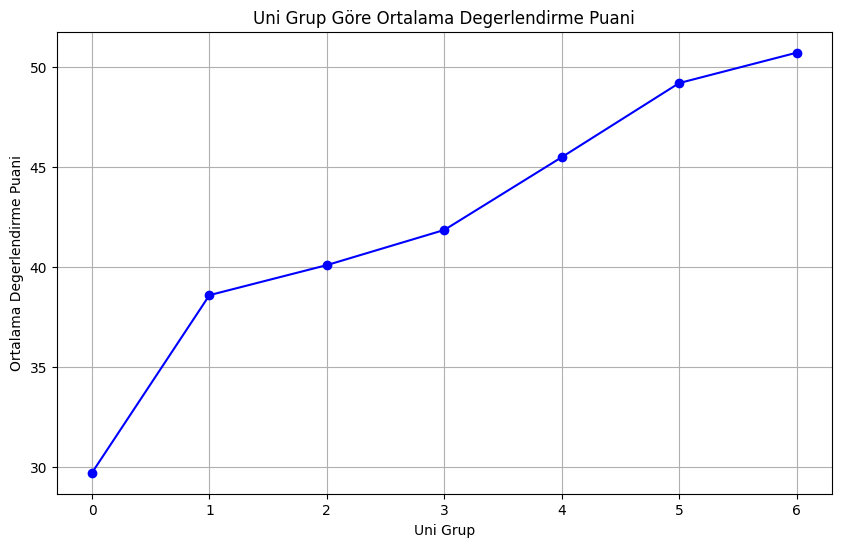

In [79]:
plot_average_scores(df, 'Uni Grup', 'Degerlendirme Puani')

In [80]:
#'Uni Grup' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Uni Grup', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Uni Grup', 'Degerlendirme Puani']].corr()
print(correlation)


   Uni Grup  Degerlendirme Puani
0       0.0                 52.0
1       0.0                 30.0
2       0.0                 18.0
3       0.0                 40.0
4       0.0                 24.0
                     Uni Grup  Degerlendirme Puani
Uni Grup             1.000000             0.300981
Degerlendirme Puani  0.300981             1.000000


## 'Universite Turu' sütunu

* Eksik veriler temizlenmiştir.
* Verilerin yazılış formatı düzenlenmiştir.
* One-hot encoding yöntemi ile string değerler inte çevrilmiş ve 0-1 olarak düzenlenmiştir.

KORELASYONA TEKRAR BAK

In [81]:
df['Universite Turu'].describe()

count      62574
unique         4
top       Devlet
freq       36081
Name: Universite Turu, dtype: object

In [82]:
df['Universite Turu'].unique()

array(['Özel', 'Devlet', 'DEVLET', 'ÖZEL', nan], dtype=object)

In [83]:
# 'Universite Turu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Universite Turu'].isna().sum()
nan_count

110

In [84]:
# 'Universite Turu' sütunundaki NaN değerler silinir
df = df.dropna(subset=['Universite Turu'])

In [85]:
# Universite Turu sütunundaki değerlerin baş harflerini büyük yapma
df['Universite Turu'] = df['Universite Turu'].str.strip().str.title()

# Değişiklikleri kontrol etme
print(df['Universite Turu'].value_counts())

Universite Turu
Devlet    51407
Özel      11167
Name: count, dtype: int64


In [86]:
# 'Universite Turu' sütunundaki 'Özel' ve 'Devlet' değerlerini 0 ve 1'e dönüştürülür
df['Universite Turu'] = df['Universite Turu'].map({'Özel': 1, 'Devlet': 0})

In [87]:
df['Universite Turu'].describe

<bound method NDFrame.describe of 0        1
1        1
2        1
3        1
4        1
        ..
65119    0
65120    1
65121    0
65122    0
65123    0
Name: Universite Turu, Length: 62574, dtype: int64>

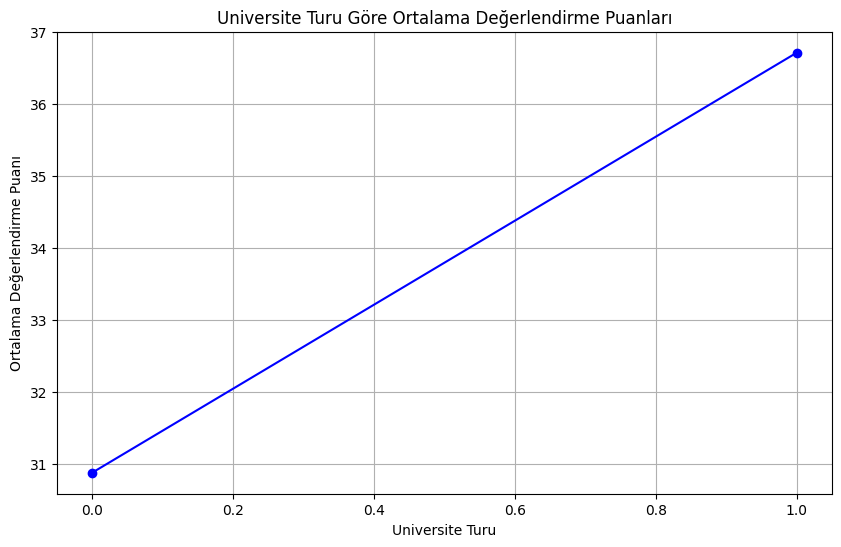

In [88]:
# Yıl bazında ortalama puanları hesaplama
ortalama_puanlar = df.groupby('Universite Turu')['Degerlendirme Puani'].mean()

# Çizgi grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.plot(ortalama_puanlar.index, ortalama_puanlar.values, marker='o', linestyle='-', color='b')
plt.title('Universite Turu Göre Ortalama Değerlendirme Puanları')
plt.xlabel('Universite Turu')
plt.ylabel('Ortalama Değerlendirme Puanı')
plt.grid(True)
plt.show()

In [89]:
# "Universite Turu" ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Universite Turu', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Universite Turu', 'Degerlendirme Puani']].corr()
print(correlation)

   Universite Turu  Degerlendirme Puani
0                1                 52.0
1                1                 30.0
2                1                 18.0
3                1                 40.0
4                1                 24.0
                     Universite Turu  Degerlendirme Puani
Universite Turu             1.000000             0.125473
Degerlendirme Puani         0.125473             1.000000


## 'Burslu ise Burs Yuzdesi' sütunu

* Eksik değerler burs alınmadığı düşünülerek 0 ile dolduruldu. 
* Sonrasında gruplama yöntemi ile ('76-100': 4, '51-75': 3, '26-50': 2, '10-25': 1, '0-9': 0) şeklinde gruplandırılarak yeni oluşturulan sütuna (Burs Yuzdesi Grubu) eklendi.


In [90]:
df['Burslu ise Burs Yuzdesi'].describe()

count    21884.000000
mean        33.685249
std         41.565838
min          0.000000
25%          0.000000
50%          0.000000
75%         75.000000
max        100.000000
Name: Burslu ise Burs Yuzdesi, dtype: float64

In [91]:
df['Burslu ise Burs Yuzdesi'].unique()

array([100. ,  99. ,  98. ,  91.5,  90. ,  88. ,  87.5,  85. ,  82.5,
        80. ,  75. ,  74. ,  72. ,  70. ,  69. ,  67. ,  65. ,  64. ,
        63. ,  62.5,  62. ,  60. ,  55. ,  50. ,  49. ,  48. ,  46. ,
        45. ,  41.5,  41. ,  40. ,  37. ,  35. ,  32. ,  30. ,  25. ,
        20. ,  10. ,   8. ,   7. ,   6. ,   5. ,   4. ,   3. ,   2. ,
         1. ,   0. ,   nan])

In [92]:
# 'Burslu ise Burs Yuzdesi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Burslu ise Burs Yuzdesi'].isna().sum()
nan_count

40690

In [93]:
#df['Burslu ise Burs Yuzdesi'] = df['Burslu ise Burs Yuzdesi'].apply(lambda x: 0 if x < 10 else x)

In [94]:
# Eksik değerler 0 ile doldurulur
df['Burslu ise Burs Yuzdesi'] = df['Burslu ise Burs Yuzdesi'].fillna(0)

In [95]:
df['Burs Yuzdesi Grubu'] = pd.cut(df['Burslu ise Burs Yuzdesi'], 
                                  bins=[-0.1, 0, 25, 50, 75, 100], 
                                  labels=['0-9', '10-25', '26-50', '51-75', '76-100'])


In [96]:
print(df[['Burslu ise Burs Yuzdesi', 'Burs Yuzdesi Grubu']])

       Burslu ise Burs Yuzdesi Burs Yuzdesi Grubu
0                        100.0             76-100
1                        100.0             76-100
2                        100.0             76-100
3                        100.0             76-100
4                        100.0             76-100
...                        ...                ...
65119                      0.0                0-9
65120                      0.0                0-9
65121                      0.0                0-9
65122                      0.0                0-9
65123                      0.0                0-9

[62574 rows x 2 columns]


In [97]:
# 'Burs Yuzdesi Grubu' sütunundaki 'Özel' ve 'Devlet' değerlerini 0 ve 1'e dönüştürülür
df['Burs Yuzdesi Grubu'] = df['Burs Yuzdesi Grubu'].map({'76-100': 4, '51-75': 3, '26-50': 2, '10-25': 1, '0-9': 0})

In [98]:
#Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari = df["Burs Yuzdesi Grubu"].value_counts()

#Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari.to_string())

Burs Yuzdesi Grubu
0    52759
4     4903
2     3044
3     1027
1      841


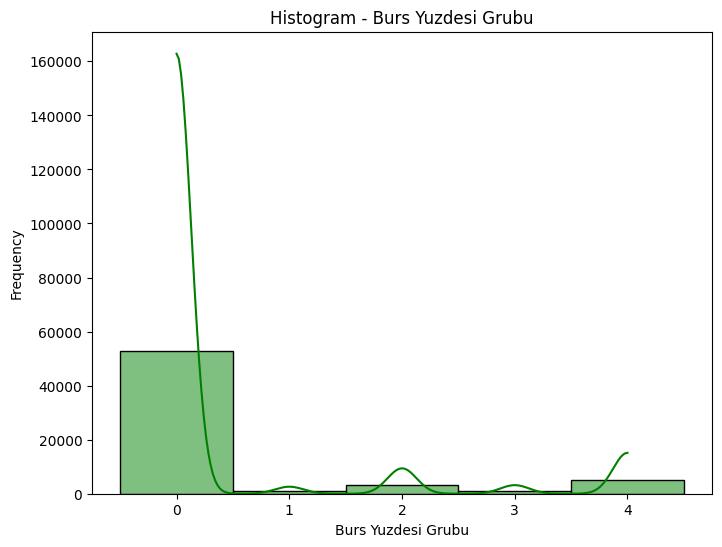

In [99]:
his_grap(df, 'Burs Yuzdesi Grubu')

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3067035072.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ortalama_puanlar = df.groupby(ortalama_sutun)[degerlendirme_sutun].mean()


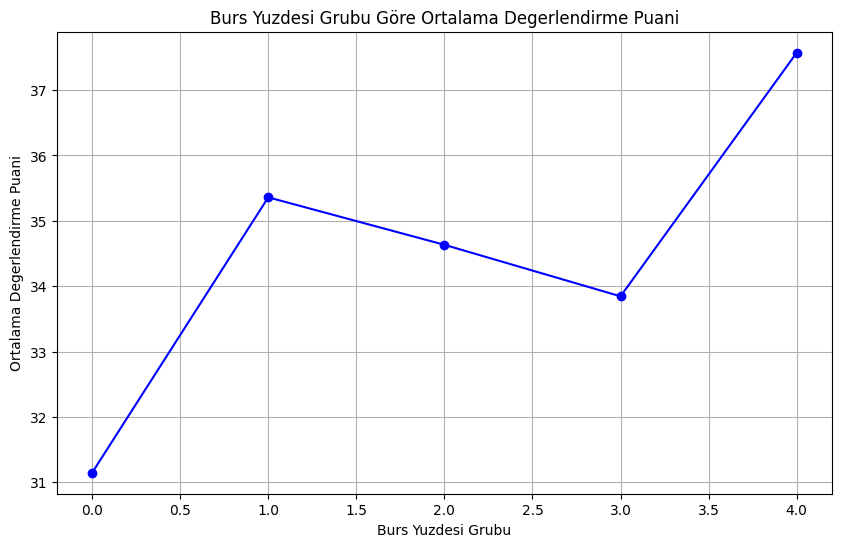

In [100]:
plot_average_scores(df, 'Burs Yuzdesi Grubu', 'Degerlendirme Puani')

In [101]:
# "Burs Yuzdesi Grubu" ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Burs Yuzdesi Grubu', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Burs Yuzdesi Grubu', 'Degerlendirme Puani']].corr()
print(correlation)

  Burs Yuzdesi Grubu  Degerlendirme Puani
0                  4                 52.0
1                  4                 30.0
2                  4                 18.0
3                  4                 40.0
4                  4                 24.0
                     Burs Yuzdesi Grubu  Degerlendirme Puani
Burs Yuzdesi Grubu             1.000000             0.103832
Degerlendirme Puani            0.103832             1.000000


In [102]:
df['Burs Yuzdesi Grubu'].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=True, categories_dtype=int64)

## 'Burs Aliyor mu?' sütunu

* Verilerin yazılış formatı düzenlenmiştir.
* One-hot encoding yöntemi ile string değerler inte çevrilmiş ve 0-1 olarak düzenlenmiştir.

In [103]:
df['Burs Aliyor mu?'].describe()

count     62574
unique        5
top       Hayır
freq      49912
Name: Burs Aliyor mu?, dtype: object

In [104]:
df['Burs Aliyor mu?'].unique()

array(['Evet', 'Hayır', 'hayır', 'evet', 'EVET'], dtype=object)

In [105]:
# Burs Aliyor mu? sütunundaki değerlerin baş harflerini büyük yapma
df['Burs Aliyor mu?'] = df['Burs Aliyor mu?'].str.strip().str.title()

# Değişiklikleri kontrol etme
print(df['Burs Aliyor mu?'].value_counts())

Burs Aliyor mu?
Hayır    50180
Evet     12394
Name: count, dtype: int64


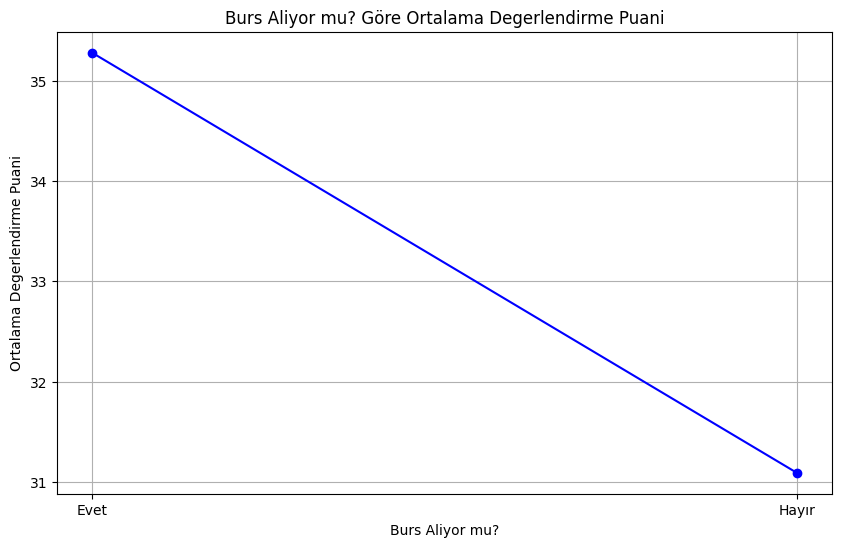

In [106]:
plot_average_scores(df, 'Burs Aliyor mu?', 'Degerlendirme Puani')

In [107]:
# 'Burs Aliyor mu?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
# Eğer "Burs Aliyor mu?" sütunu sayısal değilse, önce sayısala çevirilir
df['Burs Aliyor mu?'] = df['Burs Aliyor mu?'].map({'Evet': 1, 'Hayır': 0})

In [108]:
# "Burs Aliyor mu?" ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Burs Aliyor mu?', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Burs Aliyor mu?', 'Degerlendirme Puani']].corr()
print(correlation)

   Burs Aliyor mu?  Degerlendirme Puani
0                1                 52.0
1                0                 30.0
2                0                 18.0
3                1                 40.0
4                1                 24.0
                     Burs Aliyor mu?  Degerlendirme Puani
Burs Aliyor mu?              1.00000              0.09377
Degerlendirme Puani          0.09377              1.00000


## 'Bölüm' sütunu

* Şimdilik kalacak, çok da önemli değil.
* Üniversite mezuniyet ortalaması ile bölüm ilişkisini chatgptye soralım. 

In [109]:
df['Bölüm'].describe()

count                     62416
unique                     7308
top       Endüstri Mühendisliği
freq                       2342
Name: Bölüm, dtype: object

In [110]:
df['Bölüm'].unique()

array(['Bilgisayar Muhendisligi', 'Elektrik Elektronik Mühendisliği',
       'Finans Yönetimi ve Pazarlama', ...,
       'Yiyecek ve İçecek İşletmeciliği', 'İslam İktisadı ve Finans',
       'Nanoteknoloji Mühendisliği'], dtype=object)

In [111]:
unique_list = df["Bölüm"].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/bolum.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [112]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

#'NaN' değerlerini geçici olarak 'Hayır' ile doldurma
df['g_temp'] = df["Bölüm"].fillna('Hayır')

#Verileri temizleme ve kümeleme
sentences = df['g_temp'].unique()  # Unique değerleri alma

#'Hayır' değerlerini kümeleme işlemine dahil etmeme
sentences_cleaned = [sentence for sentence in sentences if sentence != 'Hayır']

#Metni vektör haline getirme
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences_cleaned)

#Kümeleme için uygun küme sayısını belirleme
num_clusters = 5  # İhtiyaca göre ayarlayın
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

#Küme etiketlerini DataFrame'e ekleme
df_clusters = pd.DataFrame({
    'g': sentences_cleaned,
    'Bölüm Grup': kmeans.labels_
})

#Orijinal DataFrame'e küme etiketlerini ekleme
# 'Hayır' olan değerler için 'NaN' olarak işaretleme
df['Bölüm Grup'] = df['g_temp'].map(df_clusters.set_index('g')['Bölüm Grup']).fillna('5.0')

#Geçici sütunu kaldırma
df.drop(columns=['g_temp'], inplace=True)

#DataFrame'i yazdırma
print(df.head())
df['Bölüm'].value_counts()

   Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi        Dogum Yeri  \
0          2014                 52.0    Erkek          1994  Altindag, Ankara   
1          2014                 30.0    Erkek          1993           Üsküdar   
2          2014                 18.0    Erkek          1986            Samsun   
3          2014                 40.0    Erkek          1991        Diyarbakır   
4          2014                 24.0    Erkek          1993   Ankara/Altındağ   

  Ikametgah Sehri                       Universite Adi  Universite Turu  \
0          Ankara             İhsan Doğramaci Bi̇lkent                1   
1        İstanbul             İhsan Doğramaci Bi̇lkent                1   
2        İstanbul  Uluslararasi Kibris Üni̇versi̇tesi̇                1   
3        İstanbul      İstanbul Şehi̇r Üni̇versi̇tesi̇                1   
4          Ankara          Turgut Özal Üni̇versi̇tesi̇                1   

   Burslu ise Burs Yuzdesi  Burs Aliyor mu?  ... Ingilizce Bil

Bölüm
Endüstri Mühendisliği         2342
İşletme                       2249
Bilgisayar Mühendisliği       1874
Hukuk                         1692
Makine Mühendisliği           1256
                              ... 
MEKATRONİK mühendisliği          1
Elektrik muhendisligi            1
İŞLETME İKİNCİ ÖĞRETİM           1
Çevre Muhendisliği               1
Nanoteknoloji Mühendisliği       1
Name: count, Length: 7308, dtype: int64

In [113]:
#'kume' sütunundaki değerlerin sayısal türde olduğundan emin ol
df['Bölüm Grup'] = pd.to_numeric(df['Bölüm Grup'], errors='coerce')

#Veri türlerini kontrol etme
print(df.dtypes)

#NaN değerlerin olup olmadığını kontrol etme
print(df['Bölüm Grup'].isna().sum())


Basvuru Yili                                                    int64
Degerlendirme Puani                                           float64
Cinsiyet                                                       object
Dogum Tarihi                                                    int64
Dogum Yeri                                                     object
Ikametgah Sehri                                                object
Universite Adi                                                 object
Universite Turu                                                 int64
Burslu ise Burs Yuzdesi                                       float64
Burs Aliyor mu?                                                 int64
Bölüm                                                          object
Universite Kacinci Sinif                                       object
Universite Not Ortalamasi                                      object
Daha Once Baska Bir Universiteden Mezun Olmus                  object
Lise Adi            

In [114]:
#Korelasyon hesaplama
correlation = df[['Bölüm Grup', 'Degerlendirme Puani']].corr()
print(correlation)


                     Bölüm Grup  Degerlendirme Puani
Bölüm Grup             1.000000            -0.044365
Degerlendirme Puani   -0.044365             1.000000


In [115]:
#Grupları yazdırma
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(sentences[i])

for cluster_id, sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in sentences:
        print(f" - {sentence}")

Cluster 2:
 - Bilgisayar Muhendisligi
 - Bilgisayar Mühendisliği
 - Bilgisayar mühendisliği
 - Bilgisayar Teknolojileri
 - Sınıf öğretmenliği
 - Matematik-Bilgisayar,Bilgisayar Mühendisliği
 - Bilgisayar ve Eğitim Teknolojileri Öğretmenliği
 - Bilgisayar Muhendisligi %50 burslu
 - Matematik Bilgisayar
 - sosyal bilgiler öğretmenliği
 - Bilgisayar ve Öğretim Teknolojileri Eğitmenliği
 - Bilgisayar Mühendisliği İngilizce
 - BILGISAYAR MUHENDISLIGI
 - Bilgisayar Programcılığı - MYO
 - bilgisayar veya yazılım müh. olacak
 - Bilgisayar Teknolojisi ve Bilişim Sistemleri
 - bilgisayar muhendisligi
 - Bilgisayar Programcılığı
 - Matematik-Bilgisayar, Yazılım MühendisliğiÇift Anadal
 - Bilgisayar Muhendisliği
 - Bilgisayar Bilimi
 - İngilizce Öğretmenliği
 - Türkçe Öğretmenliği
 - Bilgisayar Mühendisi
 - Bilgisayar Mühendisliğiingilizce
 - Bilgisayar Teknolojisi ve bilişim sistemleri
 - bilgisayar mühendisliği ing
 - ingilizce öğretmenliği
 - bilgisayar mühendisliği
 - Bilgisayar Müh.
 - Sınıf 

In [116]:
df['Bölüm Grup'].dtypes

dtype('float64')

In [117]:
df['Bölüm Grup'] = df['Bölüm Grup'].astype('Int64')  # Int64 türü, NaN değerleri destekler

## 'Universite Kacinci Sinif' sütunu 

* Eksik veriler silindi.
* Universite Kacinci Sinif Göre Ortalama Değerlendirme Puanları Grafiği kontrol edilerek bir gruplandırma işlemi ile veriler sayısallaştırıldı.

In [118]:
df['Universite Kacinci Sinif'].describe()

count     62315
unique       12
top           2
freq      20930
Name: Universite Kacinci Sinif, dtype: object

In [119]:
df['Universite Kacinci Sinif'].unique()

array(['3', '1', nan, '2', '4', 'Hazırlık', 'Mezun', 'hazırlık',
       'Yüksek Lisans', '5', '6', 'Tez', '0'], dtype=object)

In [120]:
# 'Universite Kacinci Sinif' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Universite Kacinci Sinif'].isna().sum()
nan_count

259

In [121]:
# 'Universite Kacinci Sinif' sütunundaki NaN değerler silinir
df = df.dropna(subset=['Universite Kacinci Sinif'])

In [122]:
df['Universite Kacinci Sinif'] = df['Universite Kacinci Sinif'].replace({
    'hazırlık': 'Hazırlık',
    '0': 'Hazırlık',
    'Tez': 'Yüksek Lisans',
    'Yüksek Lisans': 'Yüksek Lisans',
    'Mezun': 'Mezun'
})

# Sonuçları görmek için
print(df['Universite Kacinci Sinif'].unique())


['3' '1' '2' '4' 'Hazırlık' 'Mezun' 'Yüksek Lisans' '5' '6']


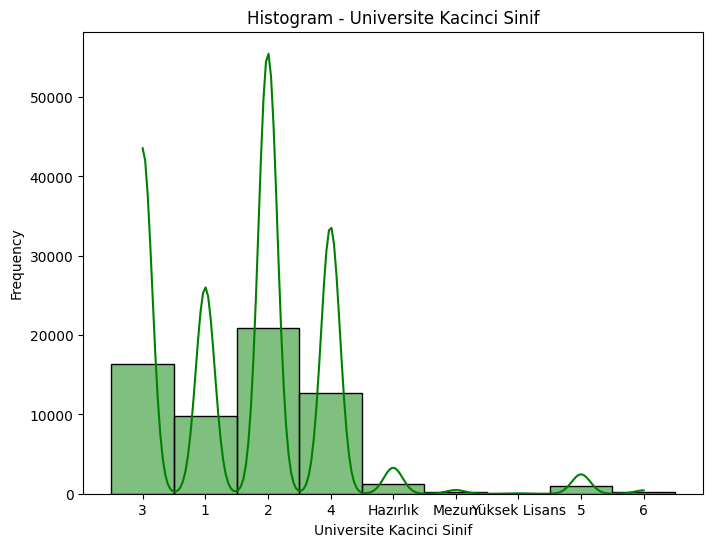

In [123]:
his_grap(df, 'Universite Kacinci Sinif')

Yukarıdaki grafiğe göre:

- Hazırlık, Mezun ve 1. sınıf öğrencileri daha düşük seviyelerde.
- 3. sınıf, 4. sınıf ve 5. sınıf yükseldikçe daha yüksek değerlere sahip.
- 2. sınıf, 6. sınıf ve Yüksek Lisans daha ileri seviyelerde yer alıyor.

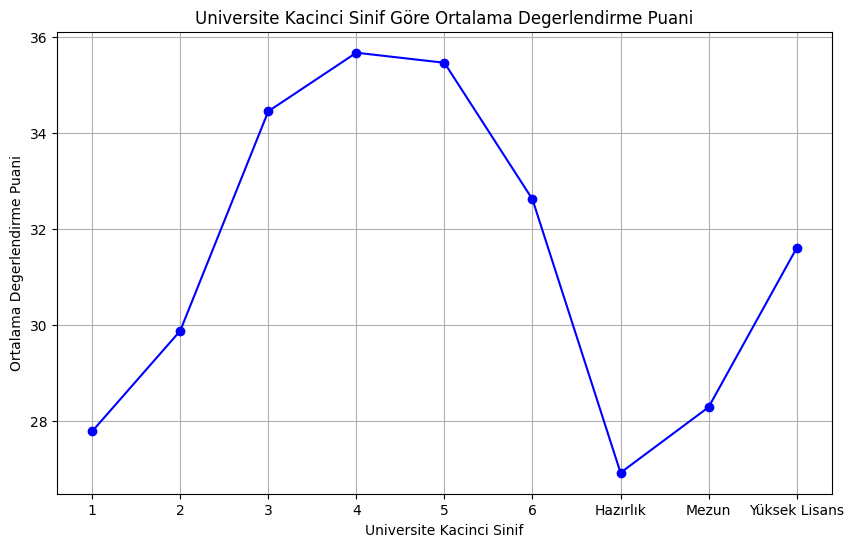

In [124]:
plot_average_scores(df, 'Universite Kacinci Sinif', 'Degerlendirme Puani')

In [125]:
# Kategorileri gruplandır ve sayısallaştır
df['Universite Kacinci Sinif'] = df['Universite Kacinci Sinif'].replace({
    'Hazırlık': 0,
    '1': 0,
    '2': 0,
    '3': 2,
    '4': 2,
    '5': 2,
    '6': 1,
    'Mezun': 0,
    'Yüksek Lisans' : 1
})

# Sonuçları görmek için
print(df['Universite Kacinci Sinif'].head())


0    2
1    2
2    0
3    2
5    2
Name: Universite Kacinci Sinif, dtype: int64


C:\Users\havva\AppData\Local\Temp\ipykernel_14492\2426019414.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Universite Kacinci Sinif'] = df['Universite Kacinci Sinif'].replace({


In [126]:
df['Universite Kacinci Sinif'].unique()

array([2, 0, 1], dtype=int64)

In [127]:
# "Universite Kacinci Sinif"  ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Universite Kacinci Sinif', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Universite Kacinci Sinif', 'Degerlendirme Puani']].corr()
print(correlation)

   Universite Kacinci Sinif  Degerlendirme Puani
0                         2                 52.0
1                         2                 30.0
2                         0                 18.0
3                         2                 40.0
5                         2                 37.0
                          Universite Kacinci Sinif  Degerlendirme Puani
Universite Kacinci Sinif                  1.000000             0.164646
Degerlendirme Puani                       0.164646             1.000000


## 'Universite Not Ortalamasi' sütunu

* Eksik değerler ve 'Ortalama bulunmuyor', 'Hazırlığım', 'Not ortalaması yok', 'ORTALAMA BULUNMUYOR'; 'Bilinmiyor' olarak eklendi.
* Aralıklı değerlerin ortalaması alınarak yeni değerler elde edildi. 
* Universite Not Ortalamasi Göre Ortalama Değerlendirme Puanları grafiğine bakılarak gruplandırma ile sayısallaştırma işlemi yapıldı.

In [128]:
df['Universite Not Ortalamasi'].describe()

count         59697
unique           20
top       3.00-2.50
freq          10641
Name: Universite Not Ortalamasi, dtype: object

In [129]:
df['Universite Not Ortalamasi'].unique()

array(['3.50-3', '3.00-2.50', nan, '2.50 ve altı', '3.00 - 4.00',
       '3.50 - 4.00', '3.00 - 3.50', '2.50 -3.00', 'Ortalama bulunmuyor',
       'ORTALAMA BULUNMUYOR', '4-3.5', '2.50 - 3.00', '2.00 - 2.50',
       '1.00 - 2.50', 'Not ortalaması yok', '4.0-3.5', '3.00 - 3.49',
       '2.50 - 2.99', '1.80 - 2.49', 'Hazırlığım', '0 - 1.79'],
      dtype=object)

In [130]:
#Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Universite Not Ortalamasi"].value_counts()

#Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Universite Not Ortalamasi
3.00-2.50              10641
2.50 ve altı           10426
3.00 - 3.50             7093
3.50-3                  6114
2.50 - 3.00             5130
3.50 - 4.00             4102
2.50 - 2.99             2451
ORTALAMA BULUNMUYOR     2388
3.00 - 3.49             2382
2.00 - 2.50             2214
2.50 -3.00              1607
3.00 - 4.00             1389
1.80 - 2.49             1166
Hazırlığım               668
Not ortalaması yok       566
4-3.5                    476
Ortalama bulunmuyor      402
1.00 - 2.50              296
0 - 1.79                 185
4.0-3.5                    1


In [131]:
# 'Universite Not Ortalamasi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Universite Not Ortalamasi'].isna().sum()
nan_count

2618

In [132]:
# Eksik değerler 'Bilinmiyor' olarak doldurulur 
df['Universite Not Ortalamasi'] = df['Universite Not Ortalamasi'].fillna('Bilinmiyor')

In [133]:
import numpy as np

# Not ortalaması aralıklarına göre gruplama fonksiyonu
def not_ortalama_gruplama(value):
    # Bilinmeyen değerler
    if value in ['Ortalama bulunmuyor', 'Hazırlığım', 'Not ortalaması yok', 'ORTALAMA BULUNMUYOR']:
        return 'Bilinmiyor'
    
    # Sayısal aralıklar için
    if '-' in value:
        # Aralıkları temizle ve ortalamasını al
        aralik = value.replace(' ', '').replace('vealtı', '-').replace('ve altı', '-')
        aralik = aralik.split('-')
        try:
            # Ortalamayı al
            ortalama = (float(aralik[0]) + float(aralik[1])) / 2
            return str(ortalama)
        except:
            return 'Bilinmiyor'
    
    # print(value)
    return str(value)  # Diğer durumlar için kendisini döndürür döndür

# Yeni sütunu oluştur ve gruplama işlemini uygula
df['Universite Not Ortalamasi'] = df['Universite Not Ortalamasi'].apply(not_ortalama_gruplama)

# Sonuçları görmek için
print(df['Universite Not Ortalamasi'].head(10))


0             3.25
1             2.75
2       Bilinmiyor
3             2.75
5             3.25
6             2.75
7             2.75
8     2.50 ve altı
9             3.25
10      Bilinmiyor
Name: Universite Not Ortalamasi, dtype: object


In [134]:
df['Universite Not Ortalamasi'].dtypes
#Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Universite Not Ortalamasi"].value_counts()

#Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Universite Not Ortalamasi
2.75            17378
3.25            13207
2.50 ve altı    10426
Bilinmiyor       6642
3.75             4579
2.745            2451
3.245            2382
2.25             2214
3.5              1389
2.145            1166
1.75              296
0.895             185


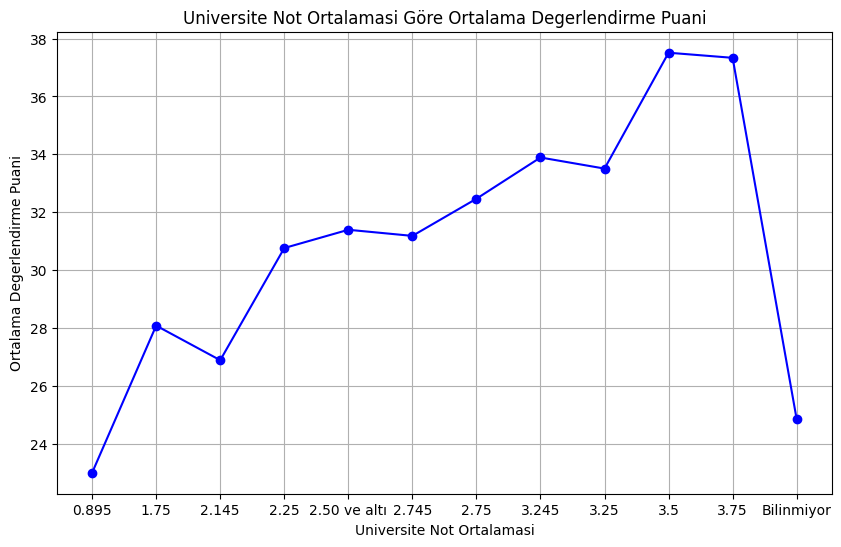

In [135]:
plot_average_scores(df, 'Universite Not Ortalamasi', 'Degerlendirme Puani')

In [136]:
# Kategorileri gruplandır ve sayısallaştır
df['Universite Not Ortalamasi'] = df['Universite Kacinci Sinif'].replace({
    '2.75' : 1,
    '3.25' : 1,
    '2.50 ve altı' : 1,
    'Bilinmiyor' : 0, 
    '3.75' : 2,
    '2.745' : 1,
    '3.245' : 1,
    '2.25' : 1,
    '3.5' : 2,
    '2.145' : 0,
    '1.75' : 0,
    '0.895' : 0,
})

# Sonuçları görmek için
print(df['Universite Not Ortalamasi'].head())


0    2
1    2
2    0
3    2
5    2
Name: Universite Not Ortalamasi, dtype: int64


In [137]:
# "Universite Not Ortalamasi" ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Universite Not Ortalamasi', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Universite Not Ortalamasi', 'Degerlendirme Puani']].corr()
print(correlation)

   Universite Not Ortalamasi  Degerlendirme Puani
0                          2                 52.0
1                          2                 30.0
2                          0                 18.0
3                          2                 40.0
5                          2                 37.0
                           Universite Not Ortalamasi  Degerlendirme Puani
Universite Not Ortalamasi                   1.000000             0.164646
Degerlendirme Puani                         0.164646             1.000000


## 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunu

* Eksik değerler 'Hayır' ile dolduruldu.
* One-hot encoding ile 0-1 olarak sayısallaştırma yapıldı.


In [138]:
df['Daha Once Baska Bir Universiteden Mezun Olmus'].describe()

count     27149
unique        2
top       Hayır
freq      26062
Name: Daha Once Baska Bir Universiteden Mezun Olmus, dtype: object

In [139]:
df['Daha Once Baska Bir Universiteden Mezun Olmus'].unique()

array(['Hayır', 'Evet', nan], dtype=object)

In [140]:
# 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Daha Once Baska Bir Universiteden Mezun Olmus'].isna().sum()
nan_count

35166

In [141]:
# Eksik değerler 'Hayır' ile doldurulur
df['Daha Once Baska Bir Universiteden Mezun Olmus'] = df['Daha Once Baska Bir Universiteden Mezun Olmus'].fillna('Hayır')

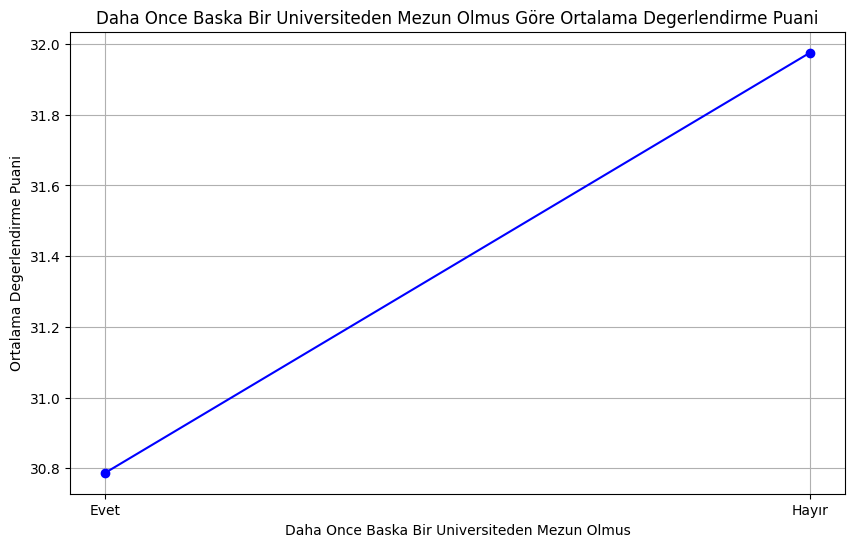

In [142]:
plot_average_scores(df, 'Daha Once Baska Bir Universiteden Mezun Olmus', 'Degerlendirme Puani')

In [143]:
# 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Daha Once Baska Bir Universiteden Mezun Olmus'] = df['Daha Once Baska Bir Universiteden Mezun Olmus'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\315629819.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Daha Once Baska Bir Universiteden Mezun Olmus'] = df['Daha Once Baska Bir Universiteden Mezun Olmus'].replace({'Hayır': 0, 'Evet': 1})


In [144]:
# 'Daha Once Baska Bir Universiteden Mezun Olmus' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Daha Once Baska Bir Universiteden Mezun Olmus', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Daha Once Baska Bir Universiteden Mezun Olmus', 'Degerlendirme Puani']].corr()
print(correlation)

   Daha Once Baska Bir Universiteden Mezun Olmus  Degerlendirme Puani
0                                              0                 52.0
1                                              0                 30.0
2                                              0                 18.0
3                                              0                 40.0
5                                              0                 37.0
                                               Daha Once Baska Bir Universiteden Mezun Olmus  \
Daha Once Baska Bir Universiteden Mezun Olmus                                        1.00000   
Degerlendirme Puani                                                                 -0.00873   

                                               Degerlendirme Puani  
Daha Once Baska Bir Universiteden Mezun Olmus             -0.00873  
Degerlendirme Puani                                        1.00000  


## 'Lise Adi' sütunu                                          

In [145]:
df['Lise Adi'].describe()

count      62042
unique     30543
top       ------
freq        4188
Name: Lise Adi, dtype: object

## 'Lise Adi Diger' sütunu 

In [146]:
df['Lise Adi Diger'].describe()

count                       4670
unique                      3963
top       Atatürk Anadolu Lisesi
freq                           8
Name: Lise Adi Diger, dtype: object

## 'Lise Sehir' sütunu 

In [147]:
df['Lise Sehir'].describe()

count        61546
unique         865
top       İstanbul
freq          8410
Name: Lise Sehir, dtype: object

## 'Lise Turu' sütunu 

In [148]:
df['Lise Turu'].describe()

count              61677
unique                16
top       Anadolu Lisesi
freq               13105
Name: Lise Turu, dtype: object

In [149]:
df['Lise Turu'].unique()

array(['Anadolu lisesi', 'Meslek lisesi', 'Fen lisesi', 'Özel lisesi',
       'Düz lise', 'İmam Hatip Lisesi', 'Meslek Lisesi', 'Fen Lisesi',
       'Düz Lise', 'Anadolu Lisesi', 'Özel Lise', nan, 'Özel Lisesi',
       'Diğer', 'Özel', 'Meslek', 'Devlet'], dtype=object)

In [150]:
# 'Lise Turu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Lise Turu'].isna().sum()
nan_count

638

In [151]:
# Eksik değerler 'Devlet olarak doldurulur 
df['Lise Turu'] = df['Lise Turu'].fillna('Devlet')

In [152]:
df['Lise Turu'] = df['Lise Turu'].replace({
    'Anadolu lisesi': 'Devlet', 
    'Fen lisesi': 'Devlet', 
    'Özel lisesi': 'Özel', 
    'Düz lise': 'Devlet',
    'Meslek lisesi': 'Devlet', 
    'İmam Hatip Lisesi': 'Devlet', 
    'Meslek Lisesi': 'Devlet',
    'Fen Lisesi': 'Devlet', 
    'Düz Lise': 'Devlet', 
    'Anadolu Lisesi': 'Devlet', 
    'Özel Lise': 'Özel',
    'Özel Lisesi': 'Özel', 
    'Diğer': 'Diğer', 
    'Özel': 'Özel', 
    'Meslek': 'Devlet', 
    'Devlet': 'Devlet'
})

# Sonuçları görmek için
print(df['Lise Turu'].unique())

['Devlet' 'Özel' 'Diğer']


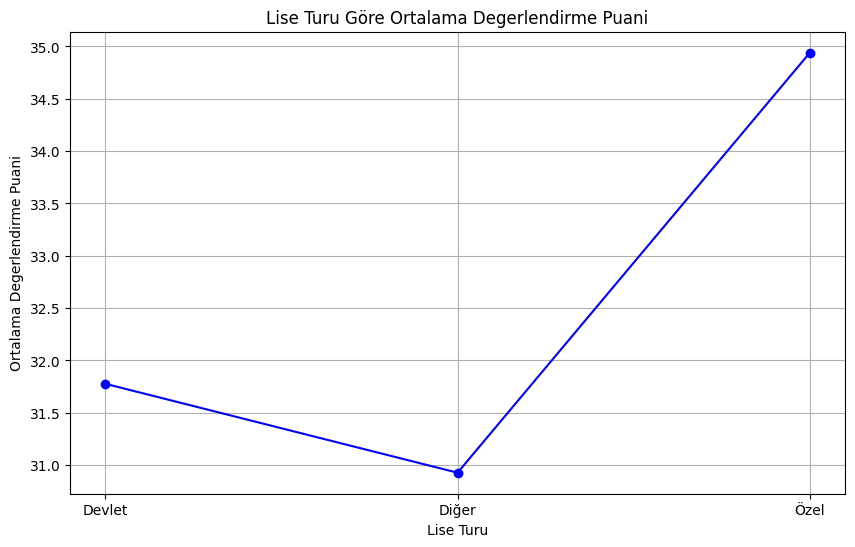

In [153]:
plot_average_scores(df, 'Lise Turu', 'Degerlendirme Puani')

In [154]:
# 'Lise Turu' sütunundaki 'Diğer', 'Devlet' ve 'Özel' değerlerini 0, 1 ve 2'ye dönüştürülür
df['Lise Turu'] = df['Lise Turu'].replace({'Diğer': 0, 'Devlet': 1, 'Özel': 2})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\1753308976.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lise Turu'] = df['Lise Turu'].replace({'Diğer': 0, 'Devlet': 1, 'Özel': 2})


In [155]:
# 'Lise Turu' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Lise Turu', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Lise Turu', 'Degerlendirme Puani']].corr()
print(correlation)

   Lise Turu  Degerlendirme Puani
0          1                 52.0
1          1                 30.0
2          1                 18.0
3          1                 40.0
5          2                 37.0
                     Lise Turu  Degerlendirme Puani
Lise Turu             1.000000             0.053668
Degerlendirme Puani   0.053668             1.000000


## 'Lise Bolumu' sütunu 

In [156]:
df['Lise Bolumu'].describe()

count       61444
unique        870
top       Sayısal
freq        27633
Name: Lise Bolumu, dtype: object

## 'Lise Bolum Diger' sütunu 

In [157]:
df['Lise Bolum Diger'].describe()

count                      1490
unique                      845
top       Bilişim Teknolojileri
freq                         84
Name: Lise Bolum Diger, dtype: object

## 'Lise Mezuniyet Notu' sütunu

* Eksik veriler 'Bilinmiyor' değeri ile dolduruldu.
* Aralıklı değerlerin ortalaması alınarak yeni değerler elde edilerek gruplandırma işlemi yapıldı.

In [158]:
df['Lise Mezuniyet Notu'].describe()

count        56959
unique          19
top       75 - 100
freq         20886
Name: Lise Mezuniyet Notu, dtype: object

In [159]:
df['Lise Mezuniyet Notu'].unique()

array(['3.50-3', '3.00 - 4.00', '3.00-2.50', '2.50 ve altı', '4.00-3.50',
       '3.50-3.00', nan, '69-55', '100-85', '84-70', '54-45', '44-0',
       '75 - 100', '50 - 75', 'Not ortalaması yok', '25 - 50', '0 - 25',
       '50 - 74', '25 - 49', '0 - 24'], dtype=object)

In [160]:
# 'Lise Mezuniyet Notu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Lise Mezuniyet Notu'].isna().sum()
nan_count

5356

In [161]:
# Eksik değerler 'Bilinmiyor' ile doldurulur
df['Lise Mezuniyet Notu'] = df['Lise Mezuniyet Notu'].fillna('Bilinmiyor')

0 1.99     2 2.49      2.50 3.49      3.50  4
0-24      25-49        50-74          75-100
0          1            2              3

In [162]:
# Kategorileri gruplandır ve sayısallaştır
df['Lise Mezuniyet Notu'] = df['Lise Mezuniyet Notu'].replace({
    '3.50-3': '50-74', 
    '3.00 - 4.00': '75-100', 
    '3.00-2.50': '50-74', 
    '2.50 ve altı': '0-24', 
    '4.00-3.50': '75-100',
    '3.50-3.00': '50-74', 
    '69-55': '50-74',                          
    '100-85': '75-100',                     
    '84-70': '75-100',                             
    '54-45': '25-49',    
    '44-0': '0-24',
    '75 - 100': '75-100', 
    '50 - 75': '50-74', 
    'Not ortalaması yok': 'Bilinmiyor', 
    '25 - 50': '25-49', 
    '0 - 25': '0-24',
    '50 - 74': '50-74', 
    '25 - 49': '25-49', 
    '0 - 24': '0-24'
})

# Sonuçları görmek için
print(df['Lise Mezuniyet Notu'].head())

0     50-74
1    75-100
2     50-74
3     50-74
5    75-100
Name: Lise Mezuniyet Notu, dtype: object


In [163]:
df['Lise Mezuniyet Notu'].unique()

array(['50-74', '75-100', '0-24', 'Bilinmiyor', '25-49'], dtype=object)

In [164]:
# Kategorileri gruplandır ve sayısallaştır
df['Lise Mezuniyet Notu Grup'] = df['Lise Mezuniyet Notu'].replace({
    '0-24': 0, 
    '25-49': 0, 
    '50-74': 0, 
    '75-100': 0, 
    'Bilinmiyor': 1
})

# Sonuçları görmek için
print(df['Lise Mezuniyet Notu Grup'].head())

0    0
1    0
2    0
3    0
5    0
Name: Lise Mezuniyet Notu Grup, dtype: int64


C:\Users\havva\AppData\Local\Temp\ipykernel_14492\2810454856.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lise Mezuniyet Notu Grup'] = df['Lise Mezuniyet Notu'].replace({


In [165]:
df['Lise Mezuniyet Notu Grup'].unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
5        0
        ..
65119    0
65120    0
65121    0
65122    0
65123    0
Name: Lise Mezuniyet Notu Grup, Length: 62315, dtype: int64>

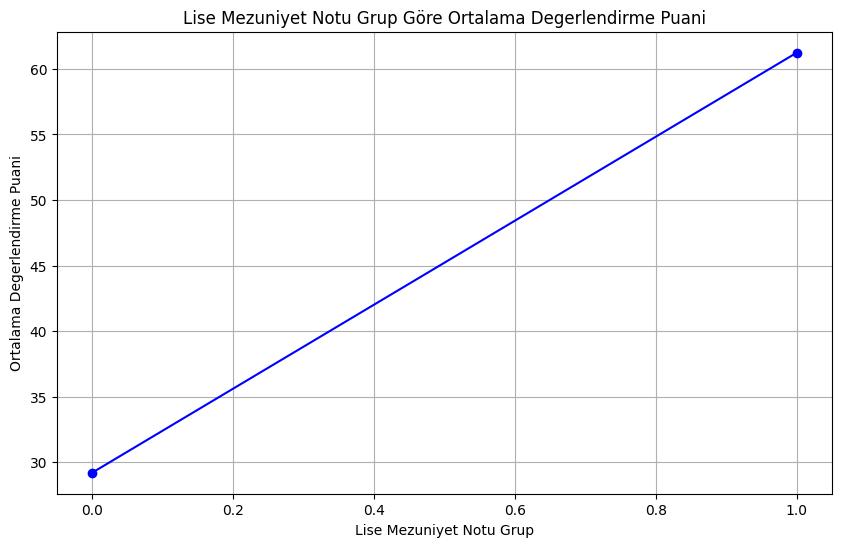

In [166]:
plot_average_scores(df, 'Lise Mezuniyet Notu Grup', 'Degerlendirme Puani')

In [167]:
# 'Lise Mezuniyet Notu' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Lise Mezuniyet Notu Grup', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Lise Mezuniyet Notu Grup', 'Degerlendirme Puani']].corr()
print(correlation)

   Lise Mezuniyet Notu Grup  Degerlendirme Puani
0                         0                 52.0
1                         0                 30.0
2                         0                 18.0
3                         0                 40.0
5                         0                 37.0
                          Lise Mezuniyet Notu Grup  Degerlendirme Puani
Lise Mezuniyet Notu Grup                  1.000000             0.504589
Degerlendirme Puani                       0.504589             1.000000


## 'Baska Bir Kurumdan Burs Aliyor mu?' sütunu

In [168]:
df['Baska Bir Kurumdan Burs Aliyor mu?'].describe()

count     62111
unique        2
top       Hayır
freq      46446
Name: Baska Bir Kurumdan Burs Aliyor mu?, dtype: object

In [169]:
df['Baska Bir Kurumdan Burs Aliyor mu?'].unique()

array(['Hayır', 'Evet', nan], dtype=object)

In [170]:
# 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Baska Bir Kurumdan Burs Aliyor mu?'].isna().sum()
nan_count

204

In [171]:
# Eksik değerler 'Hayır' ile doldurulur
df['Baska Bir Kurumdan Burs Aliyor mu?'] = df['Baska Bir Kurumdan Burs Aliyor mu?'].fillna('Hayır')

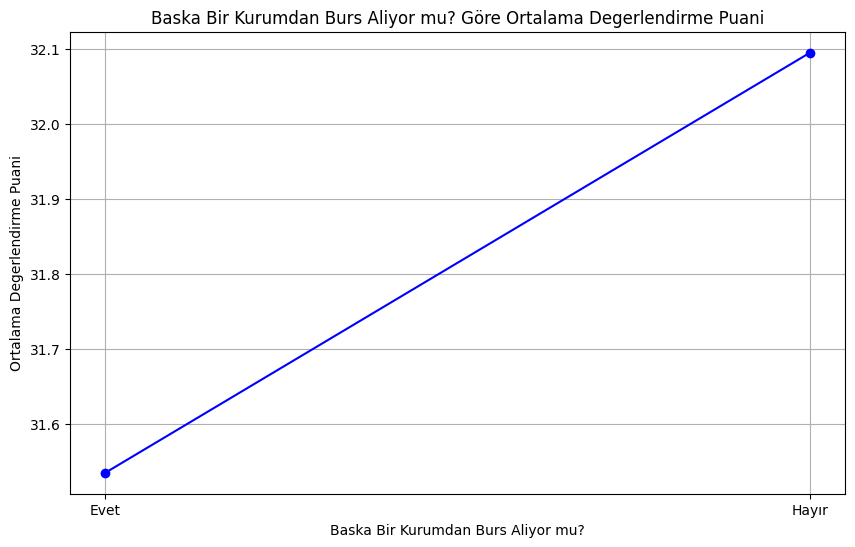

In [172]:
plot_average_scores(df, 'Baska Bir Kurumdan Burs Aliyor mu?', 'Degerlendirme Puani')

In [173]:
# 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Baska Bir Kurumdan Burs Aliyor mu?'] = df['Baska Bir Kurumdan Burs Aliyor mu?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\467121160.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Baska Bir Kurumdan Burs Aliyor mu?'] = df['Baska Bir Kurumdan Burs Aliyor mu?'].replace({'Hayır': 0, 'Evet': 1})


In [174]:
# 'Baska Bir Kurumdan Burs Aliyor mu?' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Baska Bir Kurumdan Burs Aliyor mu?', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Baska Bir Kurumdan Burs Aliyor mu?', 'Degerlendirme Puani']].corr()
print(correlation)

   Baska Bir Kurumdan Burs Aliyor mu?  Degerlendirme Puani
0                                   0                 52.0
1                                   0                 30.0
2                                   0                 18.0
3                                   0                 40.0
5                                   0                 37.0
                                    Baska Bir Kurumdan Burs Aliyor mu?  \
Baska Bir Kurumdan Burs Aliyor mu?                            1.000000   
Degerlendirme Puani                                          -0.013651   

                                    Degerlendirme Puani  
Baska Bir Kurumdan Burs Aliyor mu?            -0.013651  
Degerlendirme Puani                            1.000000  


## 'Burs Aldigi Baska Kurum' sütunu

In [175]:
df['Burs Aldigi Baska Kurum'].describe()

count     20432
unique     3817
top           -
freq       4711
Name: Burs Aldigi Baska Kurum, dtype: object

## 'Baska Kurumdan Aldigi Burs Miktari' sütunu 

In [176]:
df['Baska Kurumdan Aldigi Burs Miktari'].describe()

count     20301
unique      583
top           -
freq       4724
Name: Baska Kurumdan Aldigi Burs Miktari, dtype: object

In [177]:
df['Baska Kurumdan Aldigi Burs Miktari'].unique()

array([nan, '300', '300 TL', '150 TL', '430tlyılda 10 ay', '400',
       '250 TL',
       'Toplamda 1000 lira fakat mezun oldugun icin devam etmiyor',
       '850 TL', '500 TL', '300 tl', 'AYLIK 280 TL', '430', '1000 TL',
       '900 TL', '300 LİRA', '365', '500TL, 300TL', '125 TL', '850',
       '180', '260', '300 lira', '425 TL', 'aylık 100 tl',
       '300 TL nakit + yemek + ulaşım', '300TL', '250', '900', '150',
       '400 TL', '800', '300 tl aylık', '280', '400,00 TL', '200 TL',
       '430 tl', '500 TL - 300 TL', '400 tl', '325 TL', '300 TL / Aylık',
       '275 TLAYLIK', '10 ay süre ile aylık 600 TL', '500 tl ve 300 tl',
       '500 tl', 'BİN TÜRK LİRASI', '475', '300,0 tl', '675 TL',
       'kredi-300', 'Aylık 300 TL', '300-400', '750', '330 TL',
       'aylık 330 tl', '490', '320 TL', '560 TL',
       'Tam Burslu olduğum için yalnız eğitim ücreti ek burs almıyorum',
       '500', '600 TL/Yurt Bursu/Kitap Bursu', '430TL', '350', '600',
       '8 Ay Boyunca Aylık 720 TL', '330'

In [178]:
unique_list = df['Baska Kurumdan Aldigi Burs Miktari'].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/burs_miktari.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [179]:
def process_amount(value):
    value = str(value)
    # 'kyk' kelimesi geçiyorsa 450 yaz
    if 'kyk' in value.lower():
        return 450
    
    # 'ay' kelimesi içeriyorsa ve birden fazla sayı içeriyorsa 3 haneli sayıları al
    if 'ay' in value.lower():
        numbers = re.findall(r'\d+', value)
        three_digit_numbers = [int(num) for num in numbers if 100 <= int(num) <= 999]
        if three_digit_numbers:
            return max(three_digit_numbers)  # En yüksek 3 haneli sayıyı al
    
    # Aralıklı değer içeriyorsa ortalamasını al
    range_match = re.search(r'(\d+)-(\d+)', value)
    if range_match:
        start = int(range_match.group(1))
        end = int(range_match.group(2))
        return (start + end) / 2
    
    # 2 sayısal değer var ise onları topla, tek haneli rakamları işleme sokma
    numbers = re.findall(r'\d+', value)
    numbers = [int(num) for num in numbers if int(num) >= 10]
    if len(numbers) == 2:
        return sum(numbers)
    
    # Sayısal değer içermiyorsa '-' koy
    if any(char.isdigit() for char in value):
        numbers = re.findall(r'\d+', value)
        numbers = [int(num) for num in numbers if int(num) >= 10]
        if numbers:
            return max(numbers)  # En yüksek sayıyı al
    
    # Diğer durumlar için '-'
    return '0'


In [180]:
# Fonksiyonu uygulayarak işlemleri gerçekleştir
df['Baska Kurumdan Aldigi Burs Miktari tl'] = df['Baska Kurumdan Aldigi Burs Miktari'].apply(process_amount)

In [181]:
df['Baska Kurumdan Aldigi Burs Miktari tl'].unique()

array(['0', 300, 150, 430, 400, 250, 1000, 850, 500, 280, 900, 365, 800,
       125, 180, 260, 425, 100, 200, 325, 275, 600, 475, 675, 350.0, 750,
       330, 490, 320, 560, 720, 590, 1990, 1860, 535, 700, 1500, 2000,
       620, 175, 570, 1200, 1750, 610, 520, 515, 1100, 820, 815, 450, 240,
       470, 60, 670, 315, 480, 650, 920, 440, 1275, 340, 660, 1205, 402.5,
       130, 1120, 420, 375, 514, 225, 1050, 825, 1075, 220, 424, 435, 640,
       3000, 120, 485, 895, 3275, 550, 1080, 255, 2700, 665, 290, 1250,
       1300, 14500, 2200, 970, 2300, 525, 1600, 75, 423, 80, 410, 270,
       170, 140, 580, 390, 124, 50, 2500, 385, 25, 72, 950.0, 70, 5000,
       295, 360, 380, 160, 40, 135, 840, 210, 370, 990, 90, 185, 137, 265,
       530, 115, 310, 2015, 775, 110, 1850, 35, 20010, 165, 460, 1550,
       4017, 337.5, 1375, 2016, 725, 415, 426, 575, 433, 398, 245, 221,
       97, 540, 4225, 215, 230, 1800, 355, 95, 4200, 2012, 625, 1625,
       1450, 790, 1410, 510, 2750, 505, 383, 630, 1499

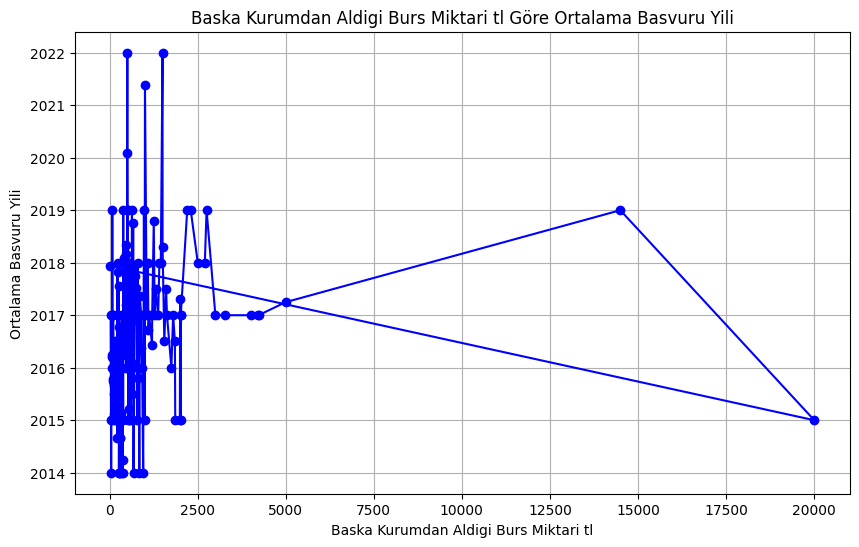

In [182]:
plot_average_scores(df, 'Baska Kurumdan Aldigi Burs Miktari tl', 'Basvuru Yili')

In [183]:
# 'Baska Kurumdan Aldigi Burs Miktari tl' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Baska Kurumdan Aldigi Burs Miktari tl', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Baska Kurumdan Aldigi Burs Miktari tl', 'Degerlendirme Puani']].corr()
print(correlation)

  Baska Kurumdan Aldigi Burs Miktari tl  Degerlendirme Puani
0                                     0                 52.0
1                                     0                 30.0
2                                     0                 18.0
3                                     0                 40.0
5                                     0                 37.0
                                       Baska Kurumdan Aldigi Burs Miktari tl  \
Baska Kurumdan Aldigi Burs Miktari tl                               1.000000   
Degerlendirme Puani                                                -0.023143   

                                       Degerlendirme Puani  
Baska Kurumdan Aldigi Burs Miktari tl            -0.023143  
Degerlendirme Puani                               1.000000  


In [184]:
# Dolar kuru verileri
kur_dict = {
    2014: 2.19,
    2015: 2.72,
    2016: 3.02,
    2017: 3.65,
    2018: 5.33,
    2019: 5.68,
    2020: 7.00,
    2021: 13.43,
    2022: 18.64
}

# Sayısal formata dönüştürme
df['Baska Kurumdan Aldigi Burs Miktari tl'] = pd.to_numeric(df['Baska Kurumdan Aldigi Burs Miktari tl'], errors='coerce')

# Fonksiyon tanımlama
def convert_burs(row):
    yil = row['Basvuru Yili']
    kur = kur_dict.get(yil, None)
    if kur:
        return row['Baska Kurumdan Aldigi Burs Miktari tl'] / kur
    else:
        return row['Baska Kurumdan Aldigi Burs Miktari tl']  # Kuru bulamazsa, mevcut değeri döner

# Burs miktarlarını güncelleme
df['Guncellenmis Burs Miktari (USD)'] = df.apply(convert_burs, axis=1)


In [185]:
df['Guncellenmis Burs Miktari (USD)'].unique()

array([0.00000000e+00, 1.36986301e+02, 6.84931507e+01, 1.96347032e+02,
       1.82648402e+02, 1.14155251e+02, 4.56621005e+02, 3.88127854e+02,
       2.28310502e+02, 1.27853881e+02, 4.10958904e+02, 1.66666667e+02,
       3.65296804e+02, 5.70776256e+01, 8.21917808e+01, 1.18721461e+02,
       1.94063927e+02, 4.56621005e+01, 9.13242009e+01, 1.48401826e+02,
       1.25570776e+02, 2.73972603e+02, 2.16894977e+02, 3.08219178e+02,
       1.59817352e+02, 3.42465753e+02, 1.21323529e+02, 1.80147059e+02,
       1.17647059e+02, 2.05882353e+02, 1.83823529e+02, 2.20588235e+02,
       1.58088235e+02, 5.51470588e+01, 1.28676471e+02, 3.12500000e+02,
       1.10294118e+02, 2.64705882e+02, 1.47058824e+02, 9.19117647e+01,
       3.67647059e+01, 2.16911765e+02, 3.67647059e+02, 7.31617647e+02,
       1.74632353e+02, 2.75735294e+02, 6.61764706e+01, 7.35294118e+01,
       6.83823529e+02, 1.96691176e+02, 2.57352941e+02, 5.51470588e+02,
       2.94117647e+02, 7.35294118e+02, 2.27941176e+02, 6.43382353e+01,
      

In [186]:
# 'Guncellenmis Burs Miktari (USD)' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Guncellenmis Burs Miktari (USD)', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Guncellenmis Burs Miktari (USD)', 'Degerlendirme Puani']].corr()
print(correlation)

   Guncellenmis Burs Miktari (USD)  Degerlendirme Puani
0                              0.0                 52.0
1                              0.0                 30.0
2                              0.0                 18.0
3                              0.0                 40.0
5                              0.0                 37.0
                                 Guncellenmis Burs Miktari (USD)  \
Guncellenmis Burs Miktari (USD)                         1.000000   
Degerlendirme Puani                                     0.023757   

                                 Degerlendirme Puani  
Guncellenmis Burs Miktari (USD)             0.023757  
Degerlendirme Puani                         1.000000  


## 'Anne Egitim Durumu' sütunu

In [187]:
df['Anne Egitim Durumu'].describe()

count       62026
unique         21
top       İlkokul
freq         9496
Name: Anne Egitim Durumu, dtype: object

In [188]:
df['Anne Egitim Durumu'].unique()

array(['Üniversite', 'İlkokul Mezunu', 'Eğitim Yok', 'Lise',
       'Ortaokul Mezunu', 'Yüksek Lisans / Doktora', 'Üniversite Mezunu',
       'Lise Mezunu', 'Yüksek Lisans / Doktara', 'İLKOKUL MEZUNU', 'LİSE',
       'EĞİTİM YOK', nan, 'ÜNİVERSİTE', 'ORTAOKUL MEZUNU', 'DOKTORA',
       'YÜKSEK LİSANS', 'Ortaokul', 'İlkokul', 'Yüksek Lisans',
       'Eğitimi yok', 'Doktora'], dtype=object)

In [189]:
# 'Anne Egitim Durumu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Anne Egitim Durumu'].isna().sum()
nan_count

289

In [190]:
# Eksik değerler 'Eğitim yok' ile doldurulur
df['Anne Egitim Durumu'] = df['Anne Egitim Durumu'].fillna('Eğitim yok')

In [191]:
# Kategorileri gruplandır ve sayısallaştır
df['Anne Egitim Durumu Grup'] = df['Anne Egitim Durumu'].replace({
    'Üniversite' : 'Üniversite' , 
    'İlkokul Mezunu': 'İlkokul', 
    'Eğitim Yok' : 'Eğitim yok', 
    'Lise' : 'Lise',
    'Ortaokul Mezunu' : 'Ortaokul', 
    'Yüksek Lisans / Doktora' : 'Doktora', 
    'Üniversite Mezunu' : 'Üniversite',
    'Lise Mezunu' : 'Lise',
    'Yüksek Lisans / Doktara': 'Doktora',
    'İLKOKUL MEZUNU': 'İlkokul',  
    'LİSE' : 'Lise',
    'EĞİTİM YOK': 'Eğitim yok',
    'ÜNİVERSİTE': 'Üniversite',
    'ORTAOKUL MEZUNU' : 'Ortaokul', 
    'DOKTORA': 'Doktora',
    'YÜKSEK LİSANS' : 'Yüksek Lisans',
    'Ortaokul' : 'Ortaokul', 
    'İlkokul': 'İlkokul', 
    'Yüksek Lisans' : 'Yüksek Lisans',
    'Eğitimi yok': 'Eğitim yok', 
    'Doktora': 'Doktora',
})

# Sonuçları görmek için
df['Anne Egitim Durumu Grup'].unique()

array(['Üniversite', 'İlkokul', 'Eğitim yok', 'Lise', 'Ortaokul',
       'Doktora', 'Yüksek Lisans'], dtype=object)

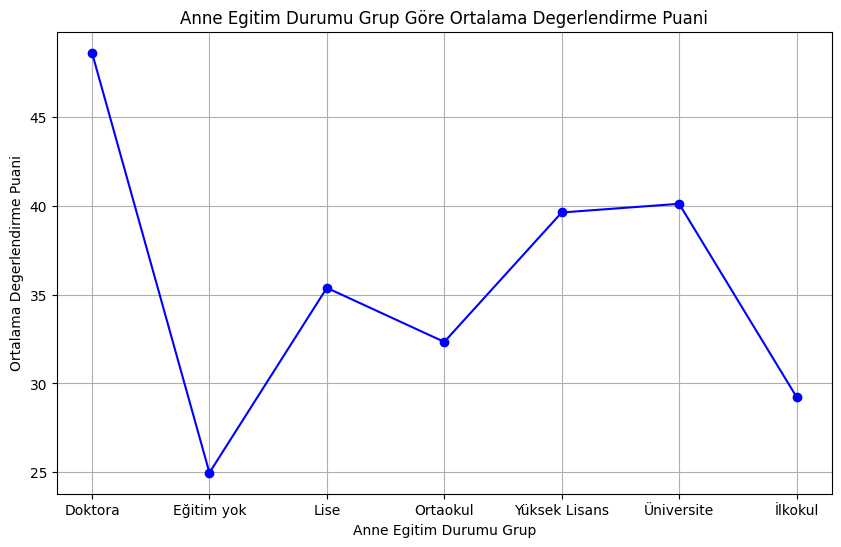

In [192]:
plot_average_scores(df, 'Anne Egitim Durumu Grup', 'Degerlendirme Puani')

In [193]:
# Kategorileri gruplandır ve sayısallaştır
df['Anne Egitim Durumu Grup'] = df['Anne Egitim Durumu Grup'].replace({
    'Üniversite' : 3, 
    'İlkokul': 1, 
    'Eğitim yok' : 0, 
    'Lise' : 2,
    'Ortaokul' : 1, 
    'Yüksek Lisans' : 3, 
    'Doktora': 4,
})

# Sonuçları görmek için
df['Anne Egitim Durumu Grup'].unique()

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3588080144.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Anne Egitim Durumu Grup'] = df['Anne Egitim Durumu Grup'].replace({


array([3, 1, 0, 2, 4], dtype=int64)

In [194]:
# 'Anne Egitim Durumu Grup' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Anne Egitim Durumu Grup', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Anne Egitim Durumu Grup', 'Degerlendirme Puani']].corr()
print(correlation)

   Anne Egitim Durumu Grup  Degerlendirme Puani
0                        3                 52.0
1                        3                 30.0
2                        1                 18.0
3                        1                 40.0
5                        0                 37.0
                         Anne Egitim Durumu Grup  Degerlendirme Puani
Anne Egitim Durumu Grup                 1.000000             0.263367
Degerlendirme Puani                     0.263367             1.000000


## 'Anne Calisma Durumu' sütunu

* Eksik değerler en çok tekrar eden 'Hayır' ile dolduruldu.
* 'Anne Calisma Durumu Göre Ortalama Değerlendirme Puanları' grafiğine bakılarak sayıllaştırma işlemi yapıldı.

In [195]:
df['Anne Calisma Durumu'].describe()

count     51256
unique        3
top       Hayır
freq      37868
Name: Anne Calisma Durumu, dtype: object

In [196]:
df['Anne Calisma Durumu'].unique()

array(['Hayır', 'Evet', 'Emekli', nan], dtype=object)

In [197]:
# 'Anne Calisma Durumu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Anne Calisma Durumu'].isna().sum()
nan_count

11059

In [198]:
#Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Anne Calisma Durumu"].value_counts()

#Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Anne Calisma Durumu
Hayır     37868
Evet      10124
Emekli     3264


In [199]:
#Eksik değerler 'Hayır' ile doldurulur
df['Anne Calisma Durumu'] = df['Anne Calisma Durumu'].fillna('Hayır')

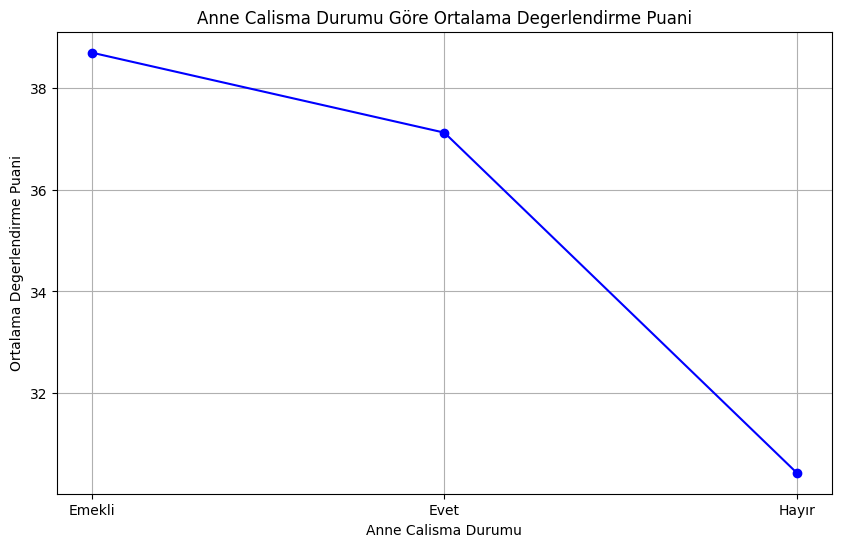

In [200]:
plot_average_scores(df, 'Anne Calisma Durumu', 'Degerlendirme Puani')

In [201]:
# 'Anne Calisma Durumu' sütunundaki 'Hayır','Evet' ve 'Emekli' değerlerini 0, 1 ve 2'ye dönüştürülür
df['Anne Calisma Durumu'] = df['Anne Calisma Durumu'].replace({'Hayır': 0, 'Evet': 1, 'Emekli': 2})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\4768356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Anne Calisma Durumu'] = df['Anne Calisma Durumu'].replace({'Hayır': 0, 'Evet': 1, 'Emekli': 2})


In [202]:
# 'Anne Calisma Durumu' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Anne Calisma Durumu', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Anne Calisma Durumu', 'Degerlendirme Puani']].corr()
print(correlation)

   Anne Calisma Durumu  Degerlendirme Puani
0                    0                 52.0
1                    1                 30.0
2                    0                 18.0
3                    0                 40.0
5                    0                 37.0
                     Anne Calisma Durumu  Degerlendirme Puani
Anne Calisma Durumu             1.000000             0.158305
Degerlendirme Puani             0.158305             1.000000


## 'Anne Sektor'

In [203]:
df['Anne Sektor'].describe()

count     29869
unique        8
top           0
freq      11577
Name: Anne Sektor, dtype: object

In [204]:
df['Anne Sektor'].unique()

array(['0', 'Kamu', 'Özel Sektör', 'Diğer', nan, 'KAMU', 'ÖZEL SEKTÖR',
       'DİĞER', '-'], dtype=object)

In [205]:
# 'Anne Sektor' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Anne Sektor'].isna().sum()
nan_count

32446

In [206]:
#Eksik değerler '-' ile doldurulur
df['Anne Sektor'] = df['Anne Sektor'].fillna('-')

In [207]:
# Kategorileri gruplandır ve sayısallaştır
df['Anne Sektor Grup'] = df['Anne Sektor'].replace({
    '0' : '-', 
    'Kamu': 'Kamu', 
    'Özel Sektör' : 'Özel Sektör',
    'Diğer' : 'Diğer', 
    'KAMU': 'Kamu',
    'ÖZEL SEKTÖR': 'Özel Sektör',
    'DİĞER' : 'Diğer', 
    '-' : '-', 
})

# Sonuçları görmek için
df['Anne Sektor Grup'].unique()


array(['-', 'Kamu', 'Özel Sektör', 'Diğer'], dtype=object)

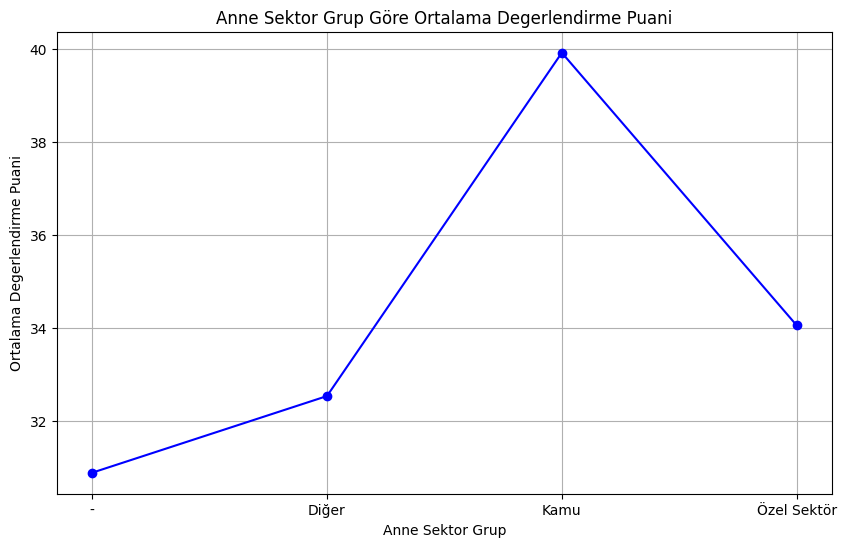

In [208]:
plot_average_scores(df, 'Anne Sektor Grup', 'Degerlendirme Puani')

In [209]:
# Kategorileri gruplandır ve sayısallaştır
df['Anne Sektor Grup'] = df['Anne Sektor Grup'].replace({
    '-' : 0, 
    'Kamu': 2, 
    'Özel Sektör' : 1,
    'Diğer' : 1, 
})

# Sonuçları görmek için
df['Anne Sektor Grup'].unique()

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\2136963721.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Anne Sektor Grup'] = df['Anne Sektor Grup'].replace({


array([0, 2, 1], dtype=int64)

In [210]:
# 'Anne Sektor Grup' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Anne Sektor Grup', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Anne Sektor Grup', 'Degerlendirme Puani']].corr()
print(correlation)

   Anne Sektor Grup  Degerlendirme Puani
0                 0                 52.0
1                 2                 30.0
2                 0                 18.0
3                 0                 40.0
5                 0                 37.0
                     Anne Sektor Grup  Degerlendirme Puani
Anne Sektor Grup             1.000000             0.138528
Degerlendirme Puani          0.138528             1.000000


## 'Baba Egitim Durumu' sütunu

In [211]:
df['Baba Egitim Durumu'].describe()

count     61454
unique       22
top        Lise
freq       9494
Name: Baba Egitim Durumu, dtype: object

In [212]:
df['Baba Egitim Durumu'].unique()

array(['Üniversite', 'Yüksek Lisans / Doktora', 'İlkokul Mezunu', nan,
       'Ortaokul Mezunu', 'Lise', 'Eğitim Yok', '0', 'Üniversite Mezunu',
       'Lise Mezunu', 'Yüksek Lisans / Doktara', 'İLKOKUL MEZUNU',
       'ÜNİVERSİTE', 'EĞİTİM YOK', 'ORTAOKUL MEZUNU', 'LİSE',
       'YÜKSEK LİSANS', 'DOKTORA', 'İlkokul', 'Ortaokul', 'Doktora',
       'Yüksek Lisans', 'Eğitimi yok'], dtype=object)

In [213]:
# 'Baba Egitim Durumu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Baba Egitim Durumu'].isna().sum()
nan_count

861

In [214]:
# Eksik değerler 'Eğitim yok' ile doldurulur
df['Baba Egitim Durumu'] = df['Baba Egitim Durumu'].fillna('Eğitim yok')

In [215]:
# Kategorileri gruplandır ve sayısallaştır
df['Baba Egitim Durumu Grup'] = df['Baba Egitim Durumu'].replace({
    'Üniversite' : 'Üniversite' , 
    'İlkokul Mezunu': 'İlkokul', 
    'Eğitim Yok' : 'Eğitim yok', 
    'Lise' : 'Lise',
    'Ortaokul Mezunu' : 'Ortaokul', 
    'Yüksek Lisans / Doktora' : 'Doktora', 
    'Üniversite Mezunu' : 'Üniversite',
    'Lise Mezunu' : 'Lise',
    'Yüksek Lisans / Doktara': 'Doktora',
    'İLKOKUL MEZUNU': 'İlkokul',  
    'LİSE' : 'Lise',
    'EĞİTİM YOK': 'Eğitim yok',
    'ÜNİVERSİTE': 'Üniversite',
    'ORTAOKUL MEZUNU' : 'Ortaokul', 
    'DOKTORA': 'Doktora',
    'YÜKSEK LİSANS' : 'Yüksek Lisans',
    'Ortaokul' : 'Ortaokul', 
    'İlkokul': 'İlkokul', 
    'Yüksek Lisans' : 'Yüksek Lisans',
    'Eğitimi yok': 'Eğitim yok', 
    'Doktora': 'Doktora',
    '0': 'Eğitim yok', 
})

# Sonuçları görmek için
df['Baba Egitim Durumu Grup'].unique()

array(['Üniversite', 'Doktora', 'İlkokul', 'Eğitim yok', 'Ortaokul',
       'Lise', 'Yüksek Lisans'], dtype=object)

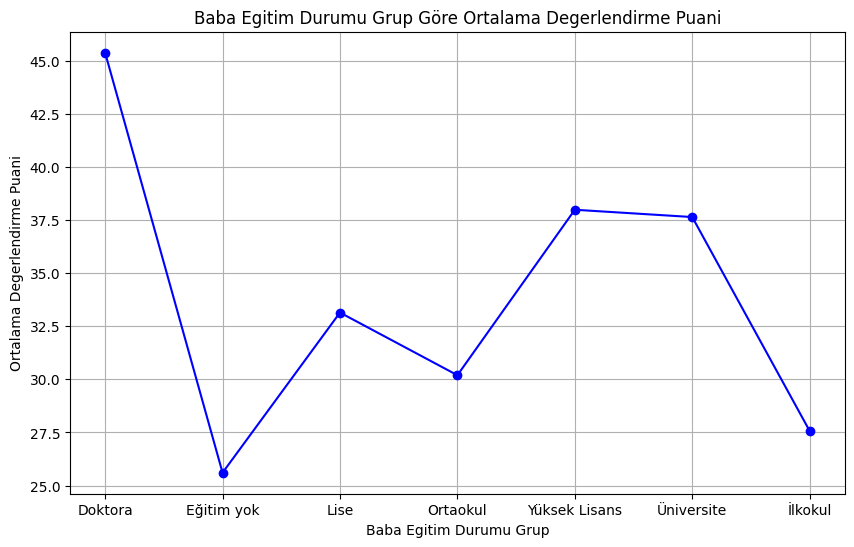

In [216]:
plot_average_scores(df, 'Baba Egitim Durumu Grup', 'Degerlendirme Puani')

In [217]:
# Kategorileri gruplandır ve sayısallaştır
df['Baba Egitim Durumu Grup'] = df['Baba Egitim Durumu Grup'].replace({
    'Üniversite' : 2, 
    'İlkokul': 0, 
    'Eğitim yok' : 0, 
    'Lise' : 1,
    'Ortaokul' : 1, 
    'Yüksek Lisans' : 2, 
    'Doktora': 3,
})

# Sonuçları görmek için
df['Baba Egitim Durumu Grup'].unique()

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\1778037356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Baba Egitim Durumu Grup'] = df['Baba Egitim Durumu Grup'].replace({


array([2, 3, 0, 1], dtype=int64)

In [218]:
# 'Baba Egitim Durumu Grup' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Baba Egitim Durumu Grup', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Baba Egitim Durumu Grup', 'Degerlendirme Puani']].corr()
print(correlation)

   Baba Egitim Durumu Grup  Degerlendirme Puani
0                        2                 52.0
1                        3                 30.0
2                        0                 18.0
3                        2                 40.0
5                        3                 37.0
                         Baba Egitim Durumu Grup  Degerlendirme Puani
Baba Egitim Durumu Grup                 1.000000             0.239463
Degerlendirme Puani                     0.239463             1.000000


## 'Baba Calisma Durumu' sütunu

* Eksik değerler 'Baba Sektor' sütununa bakılarak, eğer ilgili satırda 'Baba Sektor' sütunu doluysa 'Evet', değilse 'Hayır' olarak dolduruldu.
* 'Baba Calisma Durumu Göre Ortalama Değerlendirme Puanları' grafiğine bakılarak sayıllaştırma işlemi yapıldı.

In [219]:
df['Baba Calisma Durumu'].describe()

count     50547
unique        3
top        Evet
freq      27477
Name: Baba Calisma Durumu, dtype: object

In [220]:
df['Baba Calisma Durumu'].unique()

array(['Emekli', 'Evet', nan, 'Hayır'], dtype=object)

In [221]:
# 'Baba Calisma Durumu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Baba Calisma Durumu'].isna().sum()
nan_count

11768

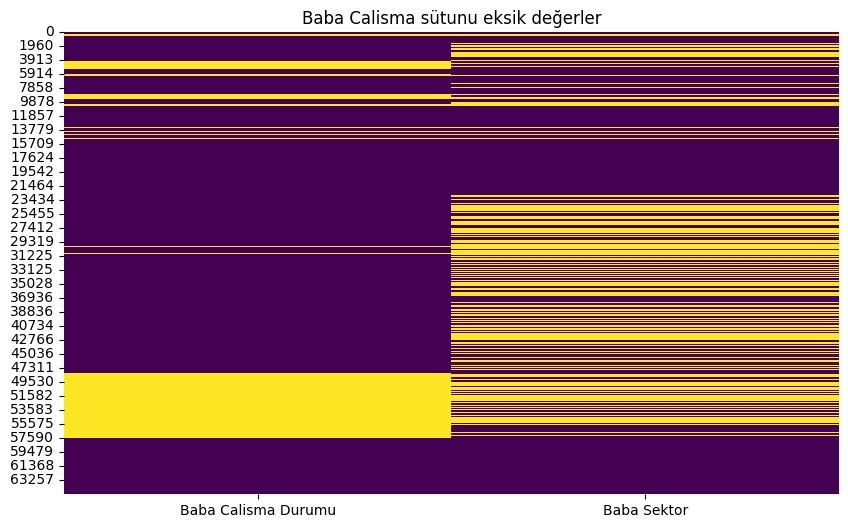

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eksik değerlerin ısı haritasını oluşturma
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Baba Calisma Durumu', 'Baba Sektor']].isna(), cbar=False, cmap='viridis')

plt.title('Baba Calisma sütunu eksik değerler')
plt.show()


In [223]:
# 'Baba Calisma Durumu' sütununda boş değerleri kontrol edin ve 'Baba Sektor' sütununu kontrol ederek değerleri atayın
df['Baba Calisma Durumu'] = df.apply(
    lambda row: 'Evet' if pd.isna(row['Baba Calisma Durumu']) and not pd.isna(row['Baba Sektor']) else row['Baba Calisma Durumu'],
    axis=1
)

# Boş 'Baba Calisma Durumu' değerleri için 'Hayır' atama işlemi
df['Baba Calisma Durumu'] = df['Baba Calisma Durumu'].fillna('Hayır')


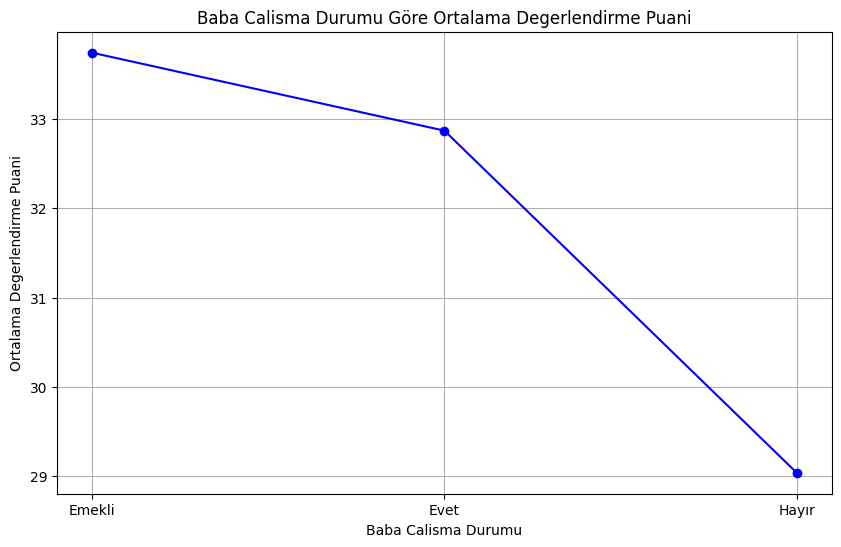

In [224]:
plot_average_scores(df, 'Baba Calisma Durumu', 'Degerlendirme Puani')

In [225]:
# 'Baba Calisma Durumu' sütunundaki 'Hayır','Evet' ve 'Emekli' değerlerini 0, 1 ve 2'ye dönüştürülür
df['Baba Calisma Durumu'] = df['Baba Calisma Durumu'].replace({'Hayır': 0, 'Evet': 1, 'Emekli': 2})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\1525091089.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Baba Calisma Durumu'] = df['Baba Calisma Durumu'].replace({'Hayır': 0, 'Evet': 1, 'Emekli': 2})


In [226]:
# 'Baba Calisma Durumu' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Baba Calisma Durumu', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Baba Calisma Durumu', 'Degerlendirme Puani']].corr()
print(correlation)

   Baba Calisma Durumu  Degerlendirme Puani
0                    2                 52.0
1                    2                 30.0
2                    1                 18.0
3                    2                 40.0
5                    1                 37.0
                     Baba Calisma Durumu  Degerlendirme Puani
Baba Calisma Durumu              1.00000              0.09521
Degerlendirme Puani              0.09521              1.00000


## 'Baba Sektor'

In [227]:
df['Baba Sektor'].describe()

count           43160
unique              8
top       Özel Sektör
freq            10628
Name: Baba Sektor, dtype: object

In [228]:
df['Baba Sektor'].unique()

array(['0', 'Özel Sektör', 'Kamu', nan, 'Diğer', 'KAMU', 'DİĞER',
       'ÖZEL SEKTÖR', '-'], dtype=object)

In [229]:
# 'Baba Sektor' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Baba Sektor'].isna().sum()
nan_count

19155

In [230]:
#Eksik değerler '-' ile doldurulur
df['Baba Sektor'] = df['Baba Sektor'].fillna('-')

In [231]:

# Kategorileri gruplandır ve sayısallaştır
df['Baba Sektor Grup'] = df['Baba Sektor'].replace({
    '0' : '-', 
    'Kamu': 'Kamu', 
    'Özel Sektör' : 'Özel Sektör',
    'Diğer' : 'Diğer', 
    'KAMU': 'Kamu',
    'ÖZEL SEKTÖR': 'Özel Sektör',
    'DİĞER' : 'Diğer', 
    '-' : '-', 
})

# Sonuçları görmek için
df['Baba Sektor Grup'].unique()



array(['-', 'Özel Sektör', 'Kamu', 'Diğer'], dtype=object)

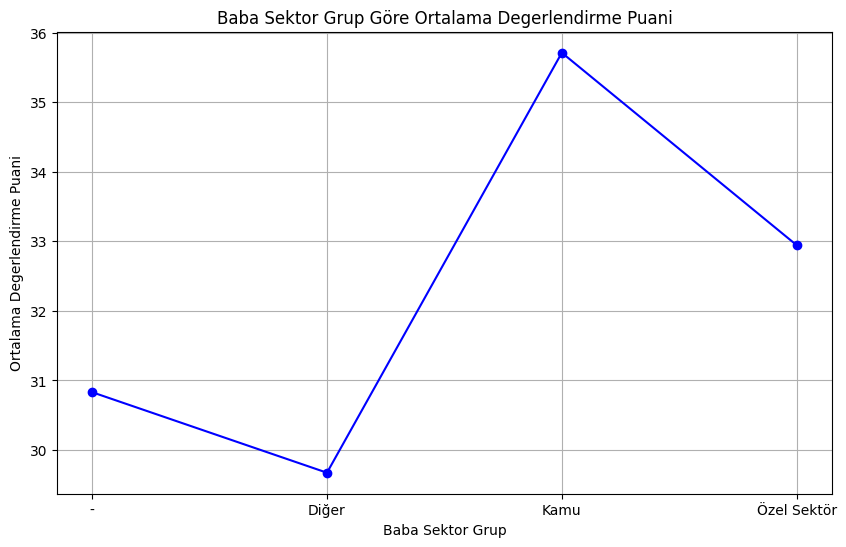

In [232]:
plot_average_scores(df, 'Baba Sektor Grup', 'Degerlendirme Puani')

In [233]:

# Kategorileri gruplandır ve sayısallaştır
df['Baba Sektor Grup'] = df['Baba Sektor Grup'].replace({
    '-' : 0, 
    'Kamu': 2, 
    'Özel Sektör' : 1,
    'Diğer' : 0, 
})

# Sonuçları görmek için
df['Baba Sektor Grup'].unique()


C:\Users\havva\AppData\Local\Temp\ipykernel_14492\1838794871.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Baba Sektor Grup'] = df['Baba Sektor Grup'].replace({


array([0, 1, 2], dtype=int64)

In [234]:
# 'Baba Sektor Grup' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Baba Sektor Grup', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Baba Sektor Grup', 'Degerlendirme Puani']].corr()
print(correlation)

   Baba Sektor Grup  Degerlendirme Puani
0                 0                 52.0
1                 0                 30.0
2                 1                 18.0
3                 0                 40.0
5                 2                 37.0
                     Baba Sektor Grup  Degerlendirme Puani
Baba Sektor Grup             1.000000             0.107261
Degerlendirme Puani          0.107261             1.000000


## 'Kardes Sayisi' sütunu

In [235]:
df['Kardes Sayisi'].describe()

count     61341.0
unique       27.0
top           1.0
freq      15558.0
Name: Kardes Sayisi, dtype: float64

In [236]:
df['Kardes Sayisi'].unique()

array(['1', '6', '10', '3', nan, '4', '2', '5', '0', '7', '8', '11', '9',
       '12', '13', 'Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat', '14',
       4.0, 5.0, 1.0, 2.0, 6.0, 3.0, 9.0, 0.0, 10.0, 7.0, 8.0],
      dtype=object)

In [237]:
# 'Kardes Sayisi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Kardes Sayisi'].isna().sum()
nan_count

974

In [238]:
#Eksik değerler 0 ile doldurulur
df['Kardes Sayisi'] = df['Kardes Sayisi'].fillna(0)

In [239]:
df['Kardes Sayisi'].shape

(62315,)

In [240]:
# Kategorileri gruplandır ve sayısallaştır
df['Kardes Sayisi'] = df['Kardes Sayisi'].replace({
    '1': 1, 
    '10': 10, 
    '3': 3,
    '4': 4, 
    '2': 2, 
    '5': 5, 
    '0': 0, 
    '7': 7, 
    '8': 8, 
    '6': 6, 
    '11': 11, 
    '9': 9,
    '12': 12, 
    '13': 13, 
    'Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat': 1, 
    '14':14,
    4.0: 4, 
    5.0: 5,
    1.0: 1, 
    2.0: 2, 
    6.0: 6, 
    3.0: 3, 
    9.0: 9, 
    0.0: 0, 
    10.0: 10, 
    7.0: 7, 
    8.0: 8,
    0 : 0
})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\2994301524.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Kardes Sayisi'] = df['Kardes Sayisi'].replace({


In [241]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df['Kardes Sayisi'].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Kardes Sayisi
1.0     21401
2.0     16277
3.0      8462
0.0      5737
4.0      5393
5.0      3965
6.0       334
7.0       270
8.0       169
10.0      168
9.0       120
11.0       11
12.0        5
13.0        2
14.0        1


In [242]:
# 'Kardes Sayisi' sütunundaki her değerin frekansını hesapla
frequency = df['Kardes Sayisi'].value_counts()

# Frekansı 10 veya daha fazla olan satırları tut, diğerlerini sil
df = df[df['Kardes Sayisi'].isin(frequency[frequency >= 100].index)]


In [243]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df['Kardes Sayisi'].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Kardes Sayisi
1.0     21401
2.0     16277
3.0      8462
0.0      5737
4.0      5393
5.0      3965
6.0       334
7.0       270
8.0       169
10.0      168
9.0       120


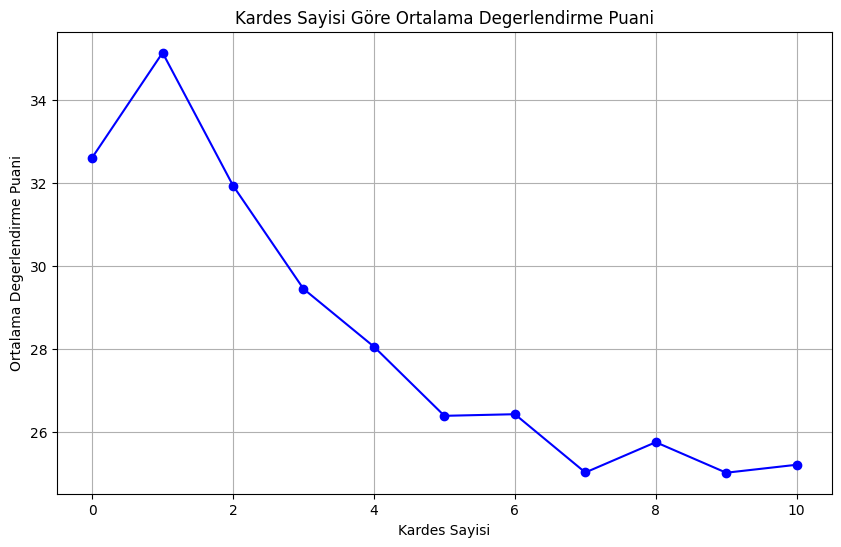

In [244]:
plot_average_scores(df, 'Kardes Sayisi', 'Degerlendirme Puani')

In [245]:
# 'Kardes Sayisi' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Kardes Sayisi', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Kardes Sayisi', 'Degerlendirme Puani']].corr()
print(correlation)

   Kardes Sayisi  Degerlendirme Puani
0            1.0                 52.0
1            1.0                 30.0
2            6.0                 18.0
3           10.0                 40.0
5            3.0                 37.0
                     Kardes Sayisi  Degerlendirme Puani
Kardes Sayisi             1.000000            -0.143636
Degerlendirme Puani      -0.143636             1.000000


## 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?' sütunu

* Eksik değerler en çok tekrar eden 'Hayır' ile dolduruldu.
* One-hot encoding yöntemi ile sayısallaştırma yapıldı.

In [246]:
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].describe()

count     60774
unique        2
top       Hayır
freq      32273
Name: Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?, dtype: object

In [247]:
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].unique()

array(['Evet', 'Hayır', nan], dtype=object)

In [248]:
# 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].isna().sum()
nan_count

1522

In [249]:
#Eksik değerler 'Hayır' ile doldurulur
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'] = df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].fillna('Hayır')

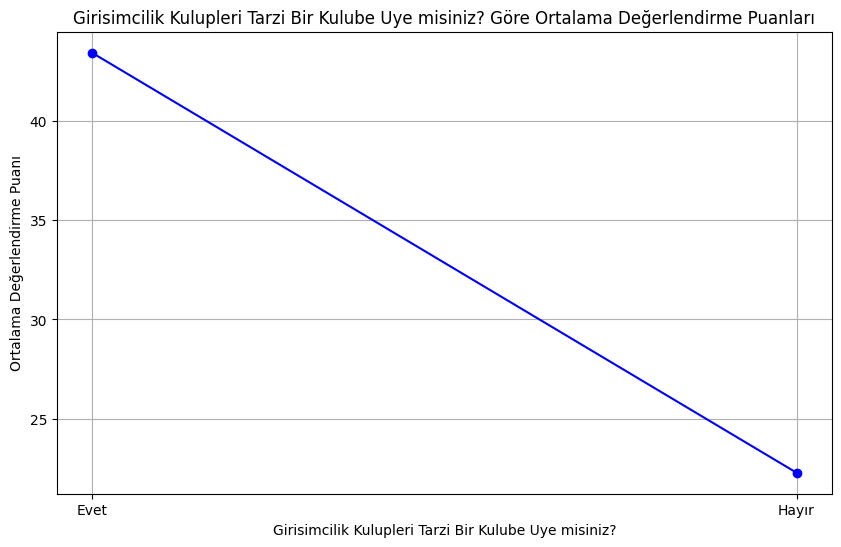

In [250]:
# Yıl bazında ortalama puanları hesaplama
ortalama_puanlar = df.groupby('Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?')['Degerlendirme Puani'].mean()

# Çizgi grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.plot(ortalama_puanlar.index, ortalama_puanlar.values, marker='o', linestyle='-', color='b')
plt.title('Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz? Göre Ortalama Değerlendirme Puanları')
plt.xlabel('Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?')
plt.ylabel('Ortalama Değerlendirme Puanı')
plt.grid(True)
plt.show()

In [251]:
# 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'] = df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3376062674.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'] = df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].replace({'Hayır': 0, 'Evet': 1})


In [252]:
# 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 'Degerlendirme Puani']].corr()
print(correlation)

   Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?  Degerlendirme Puani
0                                                  1                    52.0
1                                                  0                    30.0
2                                                  1                    18.0
3                                                  1                    40.0
5                                                  1                    37.0
                                                    Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?  \
Girisimcilik Kulupleri Tarzi Bir Kulube Uye mis...                                           1.000000      
Degerlendirme Puani                                                                          0.591427      

                                                    Degerlendirme Puani  
Girisimcilik Kulupleri Tarzi Bir Kulube Uye mis...             0.591427  
Degerlendirme Puani                                            1.

## 'Uye Oldugunuz Kulubun Ismi' sütunu

In [253]:
df['Uye Oldugunuz Kulubun Ismi'].describe()

count     15983
unique    13066
top        IEEE
freq        200
Name: Uye Oldugunuz Kulubun Ismi, dtype: object

In [254]:
df['Uye Oldugunuz Kulubun Ismi'].unique()

array(['Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Baskani', nan, 'Tema',
       ..., 'Resim(karakalem),Müzik(Ney) Kulüpleri', 'Kocaeli',
       'Genç Kızılay'], dtype=object)

In [255]:
# 'Uye Oldugunuz Kulubun Ismi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Uye Oldugunuz Kulubun Ismi'].isna().sum()
nan_count

46313

In [256]:
unique_list = df['Uye Oldugunuz Kulubun Ismi'].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/uye_oldugunuz_ulubun_ismi.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")


In [257]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 'NaN' değerlerini geçici olarak 'Hayır' ile doldurma
df['g_temp'] = df["Uye Oldugunuz Kulubun Ismi"].fillna('Hayır')


In [258]:
# Verileri temizleme ve kümeleme
sentences = df['g_temp'].unique()  # Unique değerleri alma

#'Hayır' değerlerini kümeleme işlemine dahil etmeme
sentences_cleaned = [sentence for sentence in sentences if sentence != 'Hayır']

# Metni vektör haline getirme
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences_cleaned)

# Kümeleme için uygun küme sayısını belirleme
num_clusters = 5  # İhtiyaca göre ayarlayın
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Küme etiketlerini DataFrame'e ekleme
df_clusters = pd.DataFrame({
    'g': sentences_cleaned,
    'Kulup Ismi Grup': kmeans.labels_
})

#Orijinal DataFrame'e küme etiketlerini ekleme
#'Hayır' olan değerler için 'NaN' olarak işaretleme
df['Kulup Ismi Grup'] = df['g_temp'].map(df_clusters.set_index('g')['Kulup Ismi Grup']).fillna('5.0')

# Geçici sütunu kaldırma
df.drop(columns=['g_temp'], inplace=True)

# DataFrame'i yazdırma
print(df.head())
df['Kulup Ismi Grup'].value_counts()

   Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi        Dogum Yeri  \
0          2014                 52.0    Erkek          1994  Altindag, Ankara   
1          2014                 30.0    Erkek          1993           Üsküdar   
2          2014                 18.0    Erkek          1986            Samsun   
3          2014                 40.0    Erkek          1991        Diyarbakır   
5          2014                 37.0    Erkek          1992          İSTANBUL   

  Ikametgah Sehri                       Universite Adi  Universite Turu  \
0          Ankara             İhsan Doğramaci Bi̇lkent                1   
1        İstanbul             İhsan Doğramaci Bi̇lkent                1   
2        İstanbul  Uluslararasi Kibris Üni̇versi̇tesi̇                1   
3        İstanbul      İstanbul Şehi̇r Üni̇versi̇tesi̇                1   
5        İstanbul    İstanbul Ti̇caret Üni̇versi̇tesi̇                1   

   Burslu ise Burs Yuzdesi  Burs Aliyor mu?  ... Burs Yuzdesi 

Kulup Ismi Grup
5.0    46313
1.0     9284
2.0     4018
3.0     2027
4.0      648
0.0        6
Name: count, dtype: int64

In [259]:
# 'kume' sütunundaki değerlerin sayısal türde olduğundan emin ol
df['Kulup Ismi Grup'] = pd.to_numeric(df['Kulup Ismi Grup'], errors='coerce')

# Veri türlerini kontrol etme
print(df.dtypes)

Basvuru Yili                                                    int64
Degerlendirme Puani                                           float64
Cinsiyet                                                       object
Dogum Tarihi                                                    int64
Dogum Yeri                                                     object
Ikametgah Sehri                                                object
Universite Adi                                                 object
Universite Turu                                                 int64
Burslu ise Burs Yuzdesi                                       float64
Burs Aliyor mu?                                                 int64
Bölüm                                                          object
Universite Kacinci Sinif                                        int64
Universite Not Ortalamasi                                       int64
Daha Once Baska Bir Universiteden Mezun Olmus                   int64
Lise Adi            

In [260]:
# Grupları yazdırma
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(sentences[i])

for cluster_id, sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in sentences:
        print(f" - {sentence}")

Cluster 1:
 - Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Baskani
 - Hayır
 - İSTANBUL TİCARET ÜNİVERSİTESİ GİRİŞİMCİLİK KULÜBÜ
 - Fatih Üniversitesi Acm kulubü
 - Toplumsal Duyarlılık Projeleri, Bilgi ve Tanıtım Ofisi
 - Gen Girişimciler Ağı
 - ITEC Informatics Technology Engineering Club Kulubü, Mühendislik Kulübü, Fotoğrafçılık Kulübü
 - Mühendislik Topluluğu
 - Endüstri Mühendisliği topluluğu, Estiem, Lojistik klübü, İzmir Ekonomi Üniversitesi Rotaract klübü
 - Microsoft Student Partner ve Bilkent IEEE
 - Koç Üniversitesi Farkındalık Klubü
 - SOSYAL YAŞAMI DESTEKLEME TOPLULUĞU
 - IEEE, Dans klübü
 - Bilgi International Volunteer
 - etkinlik birimi-ilgisizler-mua
 - uluslararası ticaret topluluğu
 - Psikoloji Kulübü
 - Gezi Kulübü ve Folklor Kulübü
 - dogu batı fikir ve düşünce klubü
 - Doğu- Batı Fikir ve Kültür Topluluğu
 - Bilkent Üniversitesi Mühendislik Topluluğu
 - ÇÜ Halk Dansları Topluluğu , ÇÜ Amatör Fotoğrafçılık ve Film Topluluğu
 - Medya kulubu
 - Bogazici Üniversitesi M

In [261]:
# NaN değerlerin olup olmadığını kontrol etme
print(df['Kulup Ismi Grup'].isna().sum())
# Korelasyon hesaplama
correlation = df[['Kulup Ismi Grup', 'Degerlendirme Puani']].corr()
print(correlation)

0
                     Kulup Ismi Grup  Degerlendirme Puani
Kulup Ismi Grup             1.000000            -0.453644
Degerlendirme Puani        -0.453644             1.000000


In [262]:
df['Kulup Ismi Grup'].unique()

array([1., 5., 2., 4., 3., 0.])

In [263]:
df['Kulup Ismi Grup'].dtype

dtype('float64')

In [264]:
# 'Kulup Ismi Grup' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Kulup Ismi Grup'].isna().sum()
nan_count

0

In [265]:
# Verilerin sayısal türde olduğundan emin olduktan sonra int64'e dönüştürme
df['Kulup Ismi Grup'] = df['Kulup Ismi Grup'].astype('Int64')  # Int64 türü, NaN değerleri destekler


## 'Profesyonel Bir Spor Daliyla Mesgul musunuz?' sütunu

In [266]:
df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].describe()

count     61235
unique        2
top       Hayır
freq      41514
Name: Profesyonel Bir Spor Daliyla Mesgul musunuz?, dtype: object

In [267]:
df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].unique()

array(['Evet', 'Hayır', nan], dtype=object)

In [268]:
# 'Profesyonel Bir Spor Daliyla Mesgul musunuz?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].isna().sum()
nan_count

1061

In [269]:
#Eksik değerler 'Hayır' ile doldurulur
df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].fillna('Hayır')

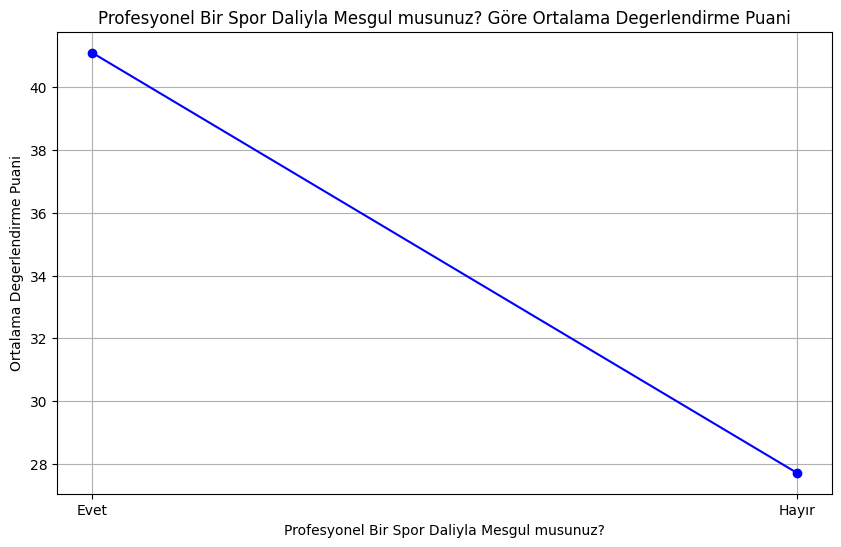

In [270]:
plot_average_scores(df, 'Profesyonel Bir Spor Daliyla Mesgul musunuz?', 'Degerlendirme Puani')

In [271]:
# 'Profesyonel Bir Spor Daliyla Mesgul musunuz?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3261885635.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].replace({'Hayır': 0, 'Evet': 1})


In [272]:
# 'Profesyonel Bir Spor Daliyla Mesgul musunuz?' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Profesyonel Bir Spor Daliyla Mesgul musunuz?', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Profesyonel Bir Spor Daliyla Mesgul musunuz?', 'Degerlendirme Puani']].corr()
print(correlation)

   Profesyonel Bir Spor Daliyla Mesgul musunuz?  Degerlendirme Puani
0                                             1                 52.0
1                                             0                 30.0
2                                             0                 18.0
3                                             0                 40.0
5                                             0                 37.0
                                              Profesyonel Bir Spor Daliyla Mesgul musunuz?  \
Profesyonel Bir Spor Daliyla Mesgul musunuz?                                      1.000000   
Degerlendirme Puani                                                               0.349446   

                                              Degerlendirme Puani  
Profesyonel Bir Spor Daliyla Mesgul musunuz?             0.349446  
Degerlendirme Puani                                      1.000000  


## 'Aktif olarak bir STK üyesi misiniz?' sütunu

In [273]:
df['Aktif olarak bir STK üyesi misiniz?'].describe()

count     50312
unique        2
top       Hayır
freq      36297
Name: Aktif olarak bir STK üyesi misiniz?, dtype: object

In [274]:
df['Aktif olarak bir STK üyesi misiniz?'].unique()

array(['Hayır', nan, 'Evet'], dtype=object)

In [275]:
# 'Aktif olarak bir STK üyesi misiniz?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Aktif olarak bir STK üyesi misiniz?'].isna().sum()
nan_count

11984

In [276]:
#Eksik değerler 'Hayır' ile doldurulur
df['Aktif olarak bir STK üyesi misiniz?'] = df['Aktif olarak bir STK üyesi misiniz?'].fillna('Hayır')

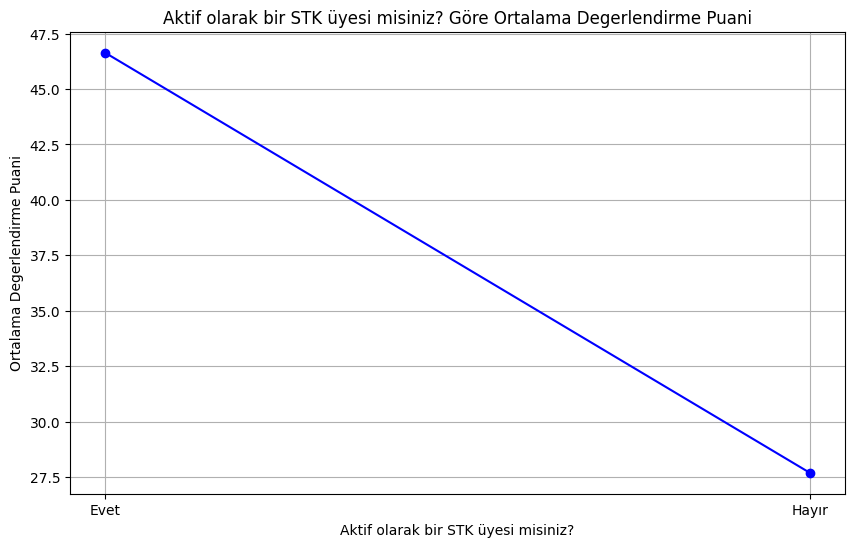

In [277]:
plot_average_scores(df, 'Aktif olarak bir STK üyesi misiniz?', 'Degerlendirme Puani')

In [278]:
# 'Aktif olarak bir STK üyesi misiniz?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Aktif olarak bir STK üyesi misiniz?'] = df['Aktif olarak bir STK üyesi misiniz?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\945291136.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Aktif olarak bir STK üyesi misiniz?'] = df['Aktif olarak bir STK üyesi misiniz?'].replace({'Hayır': 0, 'Evet': 1})


In [279]:
# 'Aktif olarak bir STK üyesi misiniz?' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Aktif olarak bir STK üyesi misiniz?', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Aktif olarak bir STK üyesi misiniz?', 'Degerlendirme Puani']].corr()
print(correlation)

   Aktif olarak bir STK üyesi misiniz?  Degerlendirme Puani
0                                    0                 52.0
1                                    0                 30.0
2                                    0                 18.0
3                                    0                 40.0
5                                    0                 37.0
                                     Aktif olarak bir STK üyesi misiniz?  \
Aktif olarak bir STK üyesi misiniz?                             1.000000   
Degerlendirme Puani                                             0.444031   

                                     Degerlendirme Puani  
Aktif olarak bir STK üyesi misiniz?             0.444031  
Degerlendirme Puani                             1.000000  


## 'Stk Projesine Katildiniz Mi?' sütunu

In [280]:
df['Stk Projesine Katildiniz Mi?'].describe()

count     36134
unique        2
top       Hayır
freq      19427
Name: Stk Projesine Katildiniz Mi?, dtype: object

In [281]:
df['Stk Projesine Katildiniz Mi?'].unique()

array(['Evet', 'Hayır', nan], dtype=object)

In [282]:
# 'Stk Projesine Katildiniz Mi?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Stk Projesine Katildiniz Mi?'].isna().sum()
nan_count

26162

In [283]:
#Eksik değerler 'Hayır' ile doldurulur
df['Stk Projesine Katildiniz Mi?'] = df['Stk Projesine Katildiniz Mi?'].fillna('Hayır')

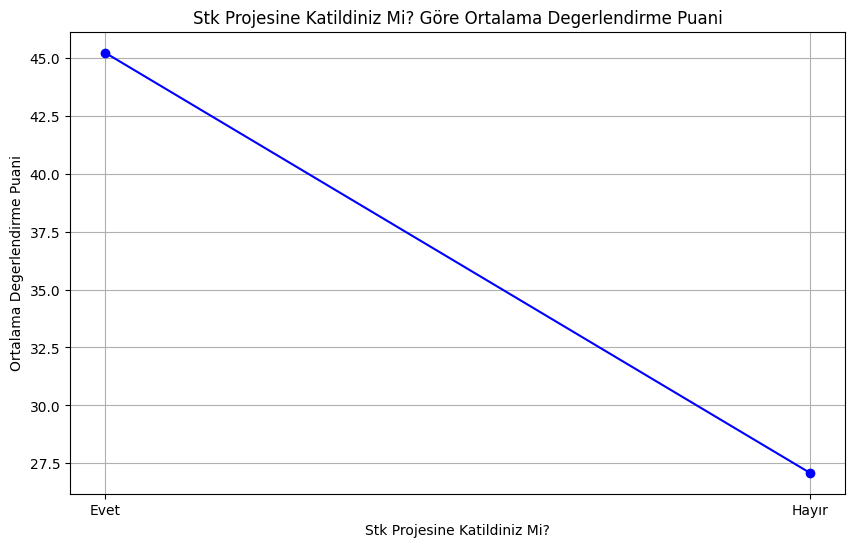

In [284]:
plot_average_scores(df, 'Stk Projesine Katildiniz Mi?', 'Degerlendirme Puani')

In [285]:
# 'Stk Projesine Katildiniz Mi?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Stk Projesine Katildiniz Mi?'] = df['Stk Projesine Katildiniz Mi?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\2169002519.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stk Projesine Katildiniz Mi?'] = df['Stk Projesine Katildiniz Mi?'].replace({'Hayır': 0, 'Evet': 1})


In [286]:
# 'Stk Projesine Katildiniz Mi?' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Stk Projesine Katildiniz Mi?', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Stk Projesine Katildiniz Mi?', 'Degerlendirme Puani']].corr()
print(correlation)

   Stk Projesine Katildiniz Mi?  Degerlendirme Puani
0                             1                 52.0
1                             1                 30.0
2                             0                 18.0
3                             1                 40.0
5                             0                 37.0
                              Stk Projesine Katildiniz Mi?  \
Stk Projesine Katildiniz Mi?                      1.000000   
Degerlendirme Puani                               0.450571   

                              Degerlendirme Puani  
Stk Projesine Katildiniz Mi?             0.450571  
Degerlendirme Puani                      1.000000  


## 'Girisimcilikle Ilgili Deneyiminiz Var Mi?' sütunu

In [287]:
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].describe()

count     50306
unique        2
top       Hayır
freq      32571
Name: Girisimcilikle Ilgili Deneyiminiz Var Mi?, dtype: object

In [288]:
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].unique()

array(['Hayır', 'Evet', nan], dtype=object)

In [289]:
# 'Girisimcilikle Ilgili Deneyiminiz Var Mi?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].isna().sum()
nan_count

11990

In [290]:
#Eksik değerler 'Hayır' ile doldurulur
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'] = df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].fillna('Hayır')

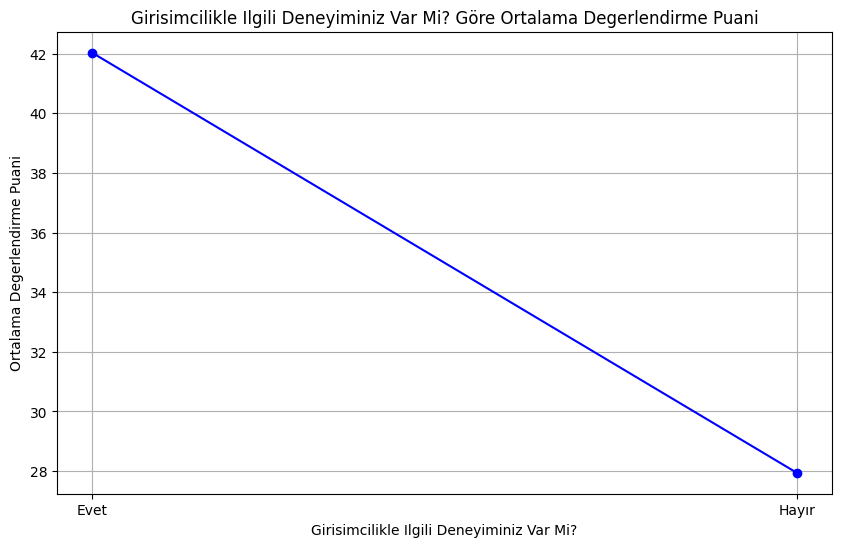

In [291]:
plot_average_scores(df, 'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 'Degerlendirme Puani')

In [292]:
# 'Girisimcilikle Ilgili Deneyiminiz Var Mi?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'] = df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\2319523614.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'] = df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].replace({'Hayır': 0, 'Evet': 1})


In [293]:
# 'Girisimcilikle Ilgili Deneyiminiz Var Mi?' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Girisimcilikle Ilgili Deneyiminiz Var Mi?', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Girisimcilikle Ilgili Deneyiminiz Var Mi?', 'Degerlendirme Puani']].corr()
print(correlation)

   Girisimcilikle Ilgili Deneyiminiz Var Mi?  Degerlendirme Puani
0                                          0                 52.0
1                                          1                 30.0
2                                          0                 18.0
3                                          0                 40.0
5                                          0                 37.0
                                           Girisimcilikle Ilgili Deneyiminiz Var Mi?  \
Girisimcilikle Ilgili Deneyiminiz Var Mi?                                   1.000000   
Degerlendirme Puani                                                         0.356854   

                                           Degerlendirme Puani  
Girisimcilikle Ilgili Deneyiminiz Var Mi?             0.356854  
Degerlendirme Puani                                   1.000000  


## 'Ingilizce Biliyor musunuz?' sütunu

In [294]:
df['Ingilizce Biliyor musunuz?'].describe()

count     55990
unique        2
top        Evet
freq      46961
Name: Ingilizce Biliyor musunuz?, dtype: object

In [295]:
df['Ingilizce Biliyor musunuz?'].unique()

array([nan, 'Evet', 'Hayır'], dtype=object)

In [296]:
# 'Ingilizce Biliyor musunuz?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Ingilizce Biliyor musunuz?'].isna().sum()
nan_count

6306

In [297]:
#Eksik değerler 'Hayır' ile doldurulur
df['Ingilizce Biliyor musunuz?'] = df['Ingilizce Biliyor musunuz?'].fillna('Hayır')

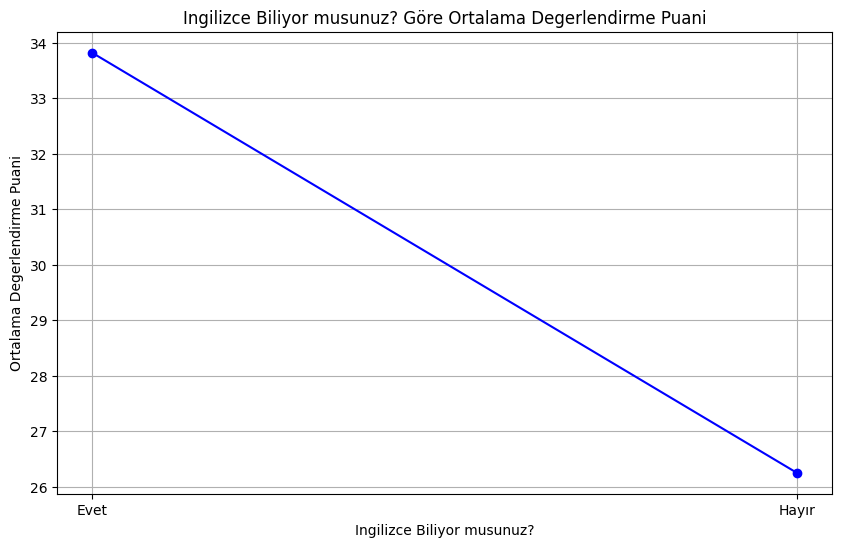

In [298]:
plot_average_scores(df, 'Ingilizce Biliyor musunuz?', 'Degerlendirme Puani')

In [299]:
# 'Ingilizce Biliyor musunuz?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Ingilizce Biliyor musunuz?'] = df['Ingilizce Biliyor musunuz?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\2104668582.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ingilizce Biliyor musunuz?'] = df['Ingilizce Biliyor musunuz?'].replace({'Hayır': 0, 'Evet': 1})


In [300]:
# 'Ingilizce Biliyor musunuz?' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Ingilizce Biliyor musunuz?', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Ingilizce Biliyor musunuz?', 'Degerlendirme Puani']].corr()
print(correlation)

   Ingilizce Biliyor musunuz?  Degerlendirme Puani
0                           0                 52.0
1                           0                 30.0
2                           0                 18.0
3                           0                 40.0
5                           0                 37.0
                            Ingilizce Biliyor musunuz?  Degerlendirme Puani
Ingilizce Biliyor musunuz?                    1.000000             0.183024
Degerlendirme Puani                           0.183024             1.000000


## 'Ingilizce Seviyeniz?' sütunu

In [301]:
df['Ingilizce Seviyeniz?'].describe()

count     28075
unique        4
top        Orta
freq      12874
Name: Ingilizce Seviyeniz?, dtype: object

In [302]:
df['Ingilizce Seviyeniz?'].unique()

array([nan, 'İleri', 'Orta', '0', 'Başlangıç'], dtype=object)

In [303]:
#Eksik değerler 'Bilmiyorum' ile doldurulur
df['Ingilizce Seviyeniz?'] = df['Ingilizce Seviyeniz?'].fillna('Bilmiyorum')

In [304]:
df['Ingilizce Seviyeniz?'].value_counts()

Ingilizce Seviyeniz?
Bilmiyorum    34221
Orta          12874
İleri          8059
Başlangıç      5143
0              1999
Name: count, dtype: int64

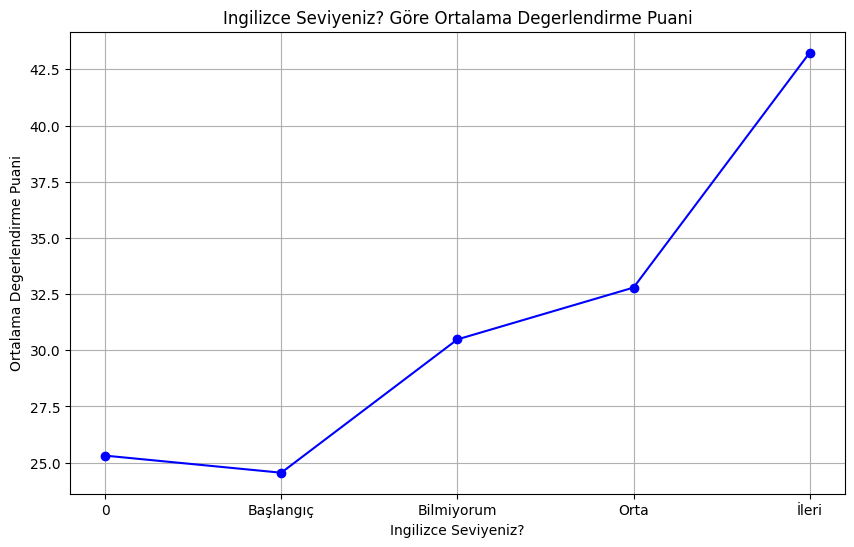

In [305]:
plot_average_scores(df, 'Ingilizce Seviyeniz?', 'Degerlendirme Puani')

In [306]:
df['Ingilizce Seviyeniz?'] = df['Ingilizce Seviyeniz?'].replace({0: 0,
                                                                 'Başlangıç': 0,
                                                                 'Bilmiyorum': 1, 
                                                                 'Orta': 1,
                                                                 'İleri': 2})

In [307]:
df['Ingilizce Seviyeniz?'] = df['Ingilizce Seviyeniz?'].astype(float)

In [308]:
# Korelasyon hesaplama
correlation = df[['Ingilizce Seviyeniz?', 'Degerlendirme Puani']].corr()
print(correlation)

                      Ingilizce Seviyeniz?  Degerlendirme Puani
Ingilizce Seviyeniz?              1.000000             0.259647
Degerlendirme Puani               0.259647             1.000000


## Spor Dalindaki Rolunuz Nedir?

In [309]:
df['Spor Dalindaki Rolunuz Nedir?'].describe()

count     31500
unique        9
top           0
freq      11115
Name: Spor Dalindaki Rolunuz Nedir?, dtype: object

In [310]:
df['Spor Dalindaki Rolunuz Nedir?'].unique()

array(['Diğer', '0', nan, 'Kaptan', 'KAPTAN / LİDER', 'DİĞER',
       'Lider/Kaptan', 'Bireysel', 'Takım Oyuncusu', '-'], dtype=object)

In [311]:
# Değerleri gruplandırmak için bir eşleme sözlüğü oluşturma
role_mapping = {
    'Kaptan': 'kaptan',
    'KAPTAN / LİDER': 'kaptan',
    'Lider/Kaptan': 'kaptan',
    'Bireysel': 'bireysel',
    'Takım Oyuncusu': 'takım oyuncusu',
    'Diğer': 'diğer',
    'DİĞER': 'diğer',
    '-': 'yok',
    '0': 'yok'
}

# Eşleme sözlüğünü kullanarak değerleri güncelleme
df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].replace(role_mapping)

# Sonuçları kontrol etme
print(df['Spor Dalindaki Rolunuz Nedir?'].value_counts())

Spor Dalindaki Rolunuz Nedir?
yok               15288
diğer             10008
kaptan             3333
bireysel           1697
takım oyuncusu     1174
Name: count, dtype: int64


In [312]:
# Boş değerleri 'yok' ile doldurma
df['Spor Dalindaki Rolunuz Nedir?'].fillna('yok', inplace=True)

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\1714382351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Spor Dalindaki Rolunuz Nedir?'].fillna('yok', inplace=True)


In [313]:
# Sonuçları kontrol etme
print(df['Spor Dalindaki Rolunuz Nedir?'].value_counts())

Spor Dalindaki Rolunuz Nedir?
yok               46084
diğer             10008
kaptan             3333
bireysel           1697
takım oyuncusu     1174
Name: count, dtype: int64


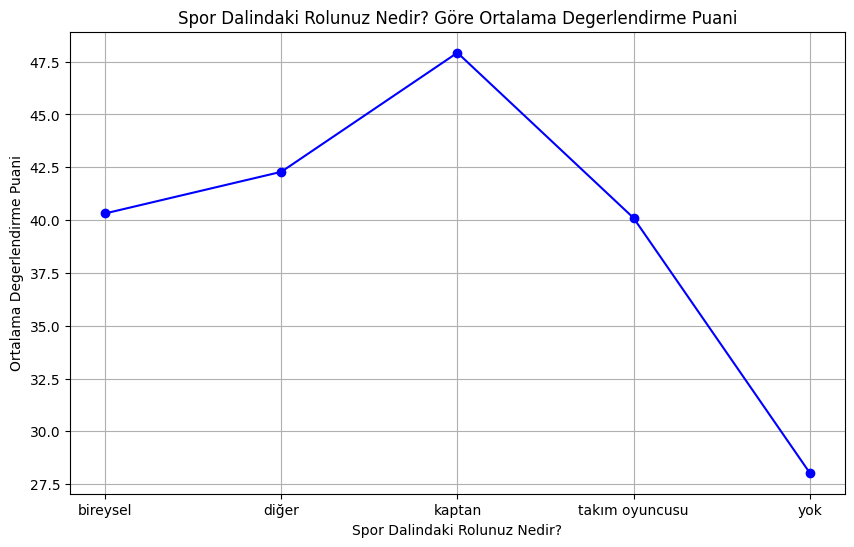

In [314]:
plot_average_scores(df, 'Spor Dalindaki Rolunuz Nedir?', 'Degerlendirme Puani')

In [315]:
df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].replace({'yok': 0,
                                                                 'bireysel': 1,
                                                                 'takım oyuncusu': 1, 
                                                                 'diğer': 1,
                                                                 'kaptan': 2})

C:\Users\havva\AppData\Local\Temp\ipykernel_14492\3596965869.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].replace({'yok': 0,


In [316]:
# Korelasyon hesaplama
correlation = df[['Spor Dalindaki Rolunuz Nedir?', 'Degerlendirme Puani']].corr()
print(correlation)

                               Spor Dalindaki Rolunuz Nedir?  \
Spor Dalindaki Rolunuz Nedir?                       1.000000   
Degerlendirme Puani                                 0.370765   

                               Degerlendirme Puani  
Spor Dalindaki Rolunuz Nedir?             0.370765  
Degerlendirme Puani                       1.000000  


## 'Hangi STK'nin Uyesisiniz?'

In [317]:
df["Hangi STK'nin Uyesisiniz?"].describe()

count     15065
unique     9146
top           -
freq       2956
Name: Hangi STK'nin Uyesisiniz?, dtype: object

In [318]:
df["Hangi STK'nin Uyesisiniz?"].unique()

array([nan, 'Demokratikleşme çabaları', 'yüz yüze projesi', ...,
       'Benim icin güzel bı faaliyet oldu.',
       "Düzenli bir şekilde Kızılay'a kan bağışı yapıyorum",
       'Gençlik merkezi ile beraber yapılan gönüllülük faaliyetinin bszilr'],
      dtype=object)

In [319]:
#Eksik değerler 'Hayır' ile doldurulur
df["Hangi STK'nin Uyesisiniz?"] = df["Hangi STK'nin Uyesisiniz?"].fillna('Hayır')

In [320]:
unique_list = df["Hangi STK'nin Uyesisiniz?"].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/hangi_stk_uyesisiniz.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [321]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 'NaN' değerlerini geçici olarak 'Hayır' ile doldurma
df['stk_temp'] = df["Hangi STK'nin Uyesisiniz?"].fillna('Hayır')

# Verileri temizleme ve kümeleme
sentences = df['stk_temp'].unique()  # Unique değerleri alma

# 'Hayır' değerlerini kümeleme işlemine dahil etmeme
sentences_cleaned = [sentence for sentence in sentences if sentence != 'Hayır']

# Metni vektör haline getirme
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences_cleaned)

# Kümeleme için uygun küme sayısını belirleme
num_clusters = 5  # İhtiyaca göre ayarlayın
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Küme etiketlerini DataFrame'e ekleme
df_clusters = pd.DataFrame({
    'stk': sentences_cleaned,
    'STK Üye Grup': kmeans.labels_
})

# Orijinal DataFrame'e küme etiketlerini ekleme
# 'Hayır' olan değerler için 'NaN' olarak işaretleme
df['STK Üye Grup'] = df['stk_temp'].map(df_clusters.set_index('stk')['STK Üye Grup']).fillna('5.0')

# Geçici sütunu kaldırma
df.drop(columns=['stk_temp'], inplace=True)

# DataFrame'i yazdırma
print(df.head())

   Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi        Dogum Yeri  \
0          2014                 52.0    Erkek          1994  Altindag, Ankara   
1          2014                 30.0    Erkek          1993           Üsküdar   
2          2014                 18.0    Erkek          1986            Samsun   
3          2014                 40.0    Erkek          1991        Diyarbakır   
5          2014                 37.0    Erkek          1992          İSTANBUL   

  Ikametgah Sehri                       Universite Adi  Universite Turu  \
0          Ankara             İhsan Doğramaci Bi̇lkent                1   
1        İstanbul             İhsan Doğramaci Bi̇lkent                1   
2        İstanbul  Uluslararasi Kibris Üni̇versi̇tesi̇                1   
3        İstanbul      İstanbul Şehi̇r Üni̇versi̇tesi̇                1   
5        İstanbul    İstanbul Ti̇caret Üni̇versi̇tesi̇                1   

   Burslu ise Burs Yuzdesi  Burs Aliyor mu?  ... Bölüm Grup  \

In [322]:
df['STK Üye Grup'].value_counts()

STK Üye Grup
5.0    47232
4.0     8729
0.0     2701
1.0     1725
3.0     1111
2.0      798
Name: count, dtype: int64

In [323]:
# 'kume' sütunundaki değerlerin sayısal türde olduğundan emin ol
df['STK Üye Grup'] = pd.to_numeric(df['STK Üye Grup'], errors='coerce')

# Veri türlerini kontrol etme
print(df.dtypes)

# NaN değerlerin olup olmadığını kontrol etme
print(df['STK Üye Grup'].isna().sum())

Basvuru Yili                                                    int64
Degerlendirme Puani                                           float64
Cinsiyet                                                       object
Dogum Tarihi                                                    int64
Dogum Yeri                                                     object
Ikametgah Sehri                                                object
Universite Adi                                                 object
Universite Turu                                                 int64
Burslu ise Burs Yuzdesi                                       float64
Burs Aliyor mu?                                                 int64
Bölüm                                                          object
Universite Kacinci Sinif                                        int64
Universite Not Ortalamasi                                       int64
Daha Once Baska Bir Universiteden Mezun Olmus                   int64
Lise Adi            

In [324]:
# Grupları yazdırma
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(sentences[i])

for cluster_id, sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in sentences:
        print(f" - {sentence}")

Cluster 4:
 - Hayır
 - Demokratikleşme çabaları
 - yüz yüze projesi
 - henüz bir projede yer alma şansım olmadı.
 - Barınak Gönüllüleri Projesi, Bizim Çocuklar, Sokaktaki Canlar
 - Düzenli olarak büten takibinde bulunuyorum.
 - Lets do it;çevre temizliği
 - Oyun Benim İlacım Projesi
 - Derneğe katılımım yeni gerçekleştiği için bir projeye katılma fırsatım bulunmamıştır.
 - Kan bağışı ile ilgili proje ve etkinliklerde, katılımcı, donör ve gözlemci olarak rol almaktayım.
 - 1-İzmir balgöç facebook grubunda dernek üyelerini balkanBulgaristan,yunanistan,makedonya,kosova,bosna hersek,sırbistan haberleri paylaşımıgönüllü olarak 2-İzmir Balgöç üyesi birlik beraberlik yemeği,konser,1989 bulgaristan büyük göçünü anma törenlerine katılım 3-İzmir Balgöç İzmir dışındaki kardeş derneklerin faliyetlerine katılım
 - hayal et projesi
 - yüzyüze projesi
 - Oku Düşün Paylaş Projesi Yıldızlar Liderlik Okulu Projesi
 - MorÇatıda gönüllüolarak staj yapıyorum.
 - .
 - Korkmuyorum Başaracağız, Haydi Bir Tuğl

In [325]:
# Korelasyon hesaplama
correlation = df[['STK Üye Grup', 'Degerlendirme Puani']].corr()
print(correlation)

                     STK Üye Grup  Degerlendirme Puani
STK Üye Grup             1.000000            -0.284613
Degerlendirme Puani     -0.284613             1.000000


In [326]:
# Verilerin sayısal türde olduğundan emin olduktan sonra int64'e dönüştürme
df['STK Üye Grup'] = df['STK Üye Grup'].astype('Int64')  # Int64 türü, NaN değerleri destekler

In [327]:
df['STK Üye Grup'].dtype

Int64Dtype()

In [328]:
# 'STK Üye Grup' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['STK Üye Grup'].isna().sum()
nan_count

0

## 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'

In [329]:
df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].describe()

count     14211
unique     8913
top           -
freq       5196
Name: Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?, dtype: object

In [330]:
df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].unique()

array([nan,
       'Bilkent Cyberparkta bir şirkette Türkiye nin ilk ekonomik DNA görüntüleme cihazını yapmak için çalışmaya başladım.',
       'Konvansiyonel medyanın dönüşümüne ve tüketimin infografik efektler üzerinden gerçekleştirileceği bir format üzerinde çalışıyorum.',
       ...,
       'Tübitakta projeler gönderdim ve lise dönemimde Sosyoloji bölümünde projemle dereceye girip 2. Oldum',
       "2019 yılından itibaren ''Hayali Olan Liseli'' Girişimcilik Ekibi'nde bulunmaktayım. Çeşitli eğitimler alarak birer mentör adayı olarak yetiştirildin, ekip arkadaşlarımla. Kurucumuz Cihan Buğdaycı'dır.",
       'Amazonda danışmanlık ve amazonda satış yapmak'], dtype=object)

In [331]:

unique_list = df["Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?"].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/girisimcilik_deneyim_aciklama.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [332]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 'NaN' değerlerini geçici olarak 'Hayır' ile doldurma
df['g_temp'] = df["Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?"].fillna('Hayır')

# Verileri temizleme ve kümeleme
sentences = df['g_temp'].unique()  # Unique değerleri alma

# 'Hayır' değerlerini kümeleme işlemine dahil etmeme
sentences_cleaned = [sentence for sentence in sentences if sentence != 'Hayır']

# Metni vektör haline getirme
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences_cleaned)

# Kümeleme için uygun küme sayısını belirleme
num_clusters = 5  # İhtiyaca göre ayarlayın
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Küme etiketlerini DataFrame'e ekleme
df_clusters = pd.DataFrame({
    'g': sentences_cleaned,
    'Girisimcilik Deneyim Grup': kmeans.labels_
})

# Orijinal DataFrame'e küme etiketlerini ekleme
# 'Hayır' olan değerler için 'NaN' olarak işaretleme
df['Girisimcilik Deneyim Grup'] = df['g_temp'].map(df_clusters.set_index('g')['Girisimcilik Deneyim Grup']).fillna('5.0')

# Geçici sütunu kaldırma
df.drop(columns=['g_temp'], inplace=True)

# DataFrame'i yazdırma
print(df.head())


   Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi        Dogum Yeri  \
0          2014                 52.0    Erkek          1994  Altindag, Ankara   
1          2014                 30.0    Erkek          1993           Üsküdar   
2          2014                 18.0    Erkek          1986            Samsun   
3          2014                 40.0    Erkek          1991        Diyarbakır   
5          2014                 37.0    Erkek          1992          İSTANBUL   

  Ikametgah Sehri                       Universite Adi  Universite Turu  \
0          Ankara             İhsan Doğramaci Bi̇lkent                1   
1        İstanbul             İhsan Doğramaci Bi̇lkent                1   
2        İstanbul  Uluslararasi Kibris Üni̇versi̇tesi̇                1   
3        İstanbul      İstanbul Şehi̇r Üni̇versi̇tesi̇                1   
5        İstanbul    İstanbul Ti̇caret Üni̇versi̇tesi̇                1   

   Burslu ise Burs Yuzdesi  Burs Aliyor mu?  ... Lise Mezuniye

In [333]:
df['Girisimcilik Deneyim Grup'].value_counts()

Girisimcilik Deneyim Grup
5.0    48085
2.0     9251
3.0     3056
4.0     1029
0.0      487
1.0      388
Name: count, dtype: int64

In [334]:
# 'kume' sütunundaki değerlerin sayısal türde olduğundan emin ol
df['Girisimcilik Deneyim Grup'] = pd.to_numeric(df['Girisimcilik Deneyim Grup'], errors='coerce')

# Veri türlerini kontrol etme
print(df.dtypes)

# NaN değerlerin olup olmadığını kontrol etme
print(df['Girisimcilik Deneyim Grup'].isna().sum())


Basvuru Yili                                                    int64
Degerlendirme Puani                                           float64
Cinsiyet                                                       object
Dogum Tarihi                                                    int64
Dogum Yeri                                                     object
Ikametgah Sehri                                                object
Universite Adi                                                 object
Universite Turu                                                 int64
Burslu ise Burs Yuzdesi                                       float64
Burs Aliyor mu?                                                 int64
Bölüm                                                          object
Universite Kacinci Sinif                                        int64
Universite Not Ortalamasi                                       int64
Daha Once Baska Bir Universiteden Mezun Olmus                   int64
Lise Adi            

In [335]:
# Grupları yazdırma
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(sentences[i])

for cluster_id, sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in sentences:
        print(f" - {sentence}")

Cluster 3:
 - Hayır
 - Konvansiyonel medyanın dönüşümüne ve tüketimin infografik efektler üzerinden gerçekleştirileceği bir format üzerinde çalışıyorum.
 - Zirve Universitesi Genc Girişimciler Kulübü
 - Fransızca ve ingilizce dillerinde tur rehberliği ve bağımsız ingilizce- türkçe metin, film ve televizyon programı çevirmenliği yaptım
 - Suanda da aktif halde yurutmeye calıstıgım kendi girisimim
 - 2013 yilinda Bahcesehir destekli olarak kendi yaz kampi projemi gelistirdim. Bu proje icin basta Bahcesehir olmak uzere cesitli kurum ve kuruluslardan destek aldim
 - Toptan olarak aldığım dilek balonlarını, arkadaşlarıma satış primi vererek toplu etkinliklerde satışını organize ediyorum.
 - Tanıtım Faaliyetlerinde ön sıralarda bulunarak organizasyonu sağlamak
 - Jci derneğinin bir projesine katildim.geleceğin lider kadinlari projesi ve bu projede liderlik girisimcilikle ilgili eğitimler aldim
 - Ebru sanatıyla yakından ilgileniyorum, 2 yıl önce kendimi geliştirebilmek için ebru kursuna gidi

In [336]:
# Korelasyon hesaplama
correlation = df[['Girisimcilik Deneyim Grup', 'Degerlendirme Puani']].corr()
print(correlation)

                           Girisimcilik Deneyim Grup  Degerlendirme Puani
Girisimcilik Deneyim Grup                   1.000000            -0.084855
Degerlendirme Puani                        -0.084855             1.000000


In [337]:
# Verilerin sayısal türde olduğundan emin olduktan sonra int64'e dönüştürme
df['Girisimcilik Deneyim Grup'] = df['Girisimcilik Deneyim Grup'].astype('Int64')  # Int64 türü, NaN değerleri destekler

In [338]:
df['Girisimcilik Deneyim Grup'].dtype

Int64Dtype()

In [339]:

# 'Girisimcilik Deneyim Grup' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Girisimcilik Deneyim Grup'].isna().sum()
nan_count

0

## 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite' sütunu

In [340]:
df['Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'].describe()

count                      401
unique                     164
top       Anadolu Üniversitesi
freq                        22
Name: Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite, dtype: object

In [341]:
df['Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'].unique()

array([nan, 'Sabancı Üniversitesi', 'Anadolu Üniversitesi',
       'Mimar Sinan Güzel Sanatlar Üniversitesi', 'Adıyaman Üniversitesi',
       'TOBB Ekonomi ve Teknoloji Üniversitesi', 'Yalova Üniversitesi',
       'İSTANBUL ÜNİVERSİTESİ', 'ATATÜRK ÜNİVERSİTESİ',
       'DOĞUŞ ÜNİVERSİTESİ', 'MARMARA ÜNİVERSİTESİ',
       'SAKARYA ÜNİVERSİTESİ', 'ÇANAKKALE ONSEKİZ MART',
       'KOCAELİ ÜNİVERSİTESİ', 'KARABÜK ÜNİVERSİTESİ',
       'ANADOLU ÜNİVERSİTESİ', 'ÇUKUROVA ÜNİVERSİTESİ',
       'İZMİR EKONOMİ ÜNİVERSİTESİ', 'TRAKYA ÜNİVERSİTESİ',
       'İSTANBUL KÜLTÜR ÜNİVERSİTESİ', 'ÜSKÜDAR ÜNİVERSİTESİ',
       'EGE ÜNİVERSİTESİ', 'OKAN ÜNİVERSİTESİ', 'BEYKOZ LOJİSTİK MESLEK',
       'Düzce Üniversitesi', 'Marmara Üniversitesi',
       'Bahçeşehir Üniversitesi', 'AVRASYA ÜNİVERSİTESİ',
       'PİRİ REİS ÜNİVERSİTESİ', 'İSTANBUL MEDİPOL ÜNİVERSİTESİ',
       'Çukurova Üniversitesi', 'Bozok Üniversitesi',
       'Siirt Üniversitesi', 'Yıldız Teknik Üniversitesi',
       'İstanbul Gelişim Üniv

In [342]:
import pandas as pd

# Üniversiteleri ve puanlarını içeren veri çerçevesi
data = {
    'Koç Üniversitesi': 1126.41,
    'Hacettepe Üniversitesi': 1072.82,
    'Orta Doğu Teknik Üniversitesi (ODTÜ)': 1060.65,
    'Ankara Üniversitesi': 1032.49,
    'İstanbul Teknik Üniversitesi (İTÜ)': 1032,
    'İstanbul Üniversitesi': 1029.22,
    'Sabancı Üniversitesi': 996.84,
    'Gazi Üniversitesi': 981.81,
    'Ege Üniversitesi': 978.84,
    'İstanbul Üniversitesi-Cerrahpaşa': 954.44,
    'İhsan Doğramacı Bilkent Üniversitesi': 922.39,
    'Gebze Teknik Üniversitesi': 917.82,
    'Marmara Üniversitesi': 914.39,
    'Yıldız Teknik Üniversitesi': 909.98,
    'Erciyes Üniversitesi': 909.8,
    'Atatürk Üniversitesi': 884.68,
    'Boğaziçi Üniversitesi': 878.9,
    'Dokuz Eylül Üniversitesi': 873.09,
    'Fırat Üniversitesi': 870.13,
    'Çukurova Üniversitesi': 864.64,
    'İzmir Yüksek Teknoloji Enstitüsü': 862.47,
    'Karadeniz Teknik Üniversitesi': 859.04,
    'Selçuk Üniversitesi': 853.78,
    'Akdeniz Üniversitesi': 848.62,
    'Acıbadem Mehmet Ali Aydınlar Üniversitesi': 842.03,
    '19 Mayıs Üniversitesi': 824.76,
    'Bursa Uludağ Üniversitesi': 820.19,
    'Bezm-i Alem Vakıf Üniversitesi': 810.85,
    'Sağlık Bilimleri Üniversitesi': 803.83,
    'Eskişehir Osmangazi Üniversitesi': 797.22,
    'Sakarya Üniversitesi': 796.6,
    'İnönü Üniversitesi': 787.25,
    'Çankaya Üniversitesi': 777.56,
    'Kocaeli Üniversitesi': 774.61,
    'İzmir Kâtip Çelebi Üniversitesi': 772.83,
    'Süleyman Demirel Üniversitesi': 765.18,
    'Ankara Yıldırım Beyazıt Üniversitesi': 764.22,
    'İstanbul Medeniyet Üniversitesi': 758.05,
    'Van 100. Yıl Üniversitesi': 753.5,
    'İstanbul Medipol Üniversitesi': 749,
    'Gaziantep Üniversitesi': 735.49,
    'Necmettin Erbakan Üniversitesi': 734.68,
    'Mersin Üniversitesi': 729.85,
    'Anadolu Üniversitesi': 717.56,
    'Yeditepe Üniversitesi': 712.49,
    'Bolu Abant İzzet Baysal Üniversitesi': 712.39,
    'Eskişehir Teknik Üniversitesi': 711.33,
    'Pamukkale Üniversitesi': 706.47,
    'TOBB Ekonomi ve Teknoloji Üniversitesi': 705.53,
    'Abdullah Gül Üniversitesi': 705.46,
    'Manisa Celal Bayar Üniversitesi': 705.14,
    'Recep Tayyip Erdoğan Üniversitesi': 704.41,
    'Başkent Üniversitesi': 704.3,
    'Sivas Cumhuriyet Üniversitesi': 703.88,
    'Harran Üniversitesi': 701.92,
    'Düzce Üniversitesi': 697.74,
    'İstinye Üniversitesi': 692.18,
    'Muğla Sıtkı Koçman Üniversitesi': 687.61,
    'Aydın Adnan Menderes Üniversitesi': 686.89,
    'Karabük Üniversitesi': 686.39,
    'Çanakkale 18 Mart Üniversitesi': 683.79,
    'Konya Teknik Üniversitesi': 680.57,
    'Özyeğin Üniversitesi': 680.1,
    'Bahçeşehir Üniversitesi': 677.08,
    'Kadir Has Üniversitesi': 676.69,
    'Bingöl Üniversitesi': 675.71,
    'Niğde Ömer Halisdemir Üniversitesi': 670.63,
    'Kahramanmaraş Sütçü İmam Üniversitesi': 655.17,
    'Atılım Üniversitesi': 655.1,
    'Afyon Kocatepe Üniversitesi': 647.61,
    'Tekirdağ Namık Kemal Üniversitesi': 641.72,
    'Karamanoğlu Mehmetbey Üniversitesi': 641.5,
    'Bursa Teknik Üniversitesi': 640.67,
    'Trakya Üniversitesi': 640.36,
    'Adana Alparslan Türkeş Bilim ve Teknoloji Üniversitesi': 638.17,
    'Bartın Üniversitesi': 636.11,
    'Aksaray Üniversitesi': 627.82,
    'Hasan Kalyoncu Üniversitesi': 624.72,
    'Kırıkkale Üniversitesi': 623.39,
    'Hitit Üniversitesi': 623.12,
    'Kastamonu Üniversitesi': 621.34,
    'Erzurum Teknik Üniversitesi': 617.99,
    'Biruni Üniversitesi': 616.5,
    'Tokat Gaziosmanpaşa Üniversitesi': 612.38,
    'Isparta Uygulamalı Bilimler Üniversitesi': 611.96,
    'İskenderun Teknik Üniversitesi': 609.5,
    'Ordu Üniversitesi': 608.12,
    'Zonguldak Bülent Ecevit Üniversitesi': 608.01,
    'Yozgat Bozok Üniversitesi': 605.59,
    'Erzincan Binali Yıldırım Üniversitesi': 603.56,
    'Hatay Mustafa Kemal Üniversitesi': 599.34,
    'Dicle Üniversitesi': 598.11,
    'Burdur Mehmet Akif Ersoy Üniversitesi': 593.42,
    'Balıkesir Üniversitesi': 592.32,
    'Adıyaman Üniversitesi': 591.91,
    'Çankırı Karatekin Üniversitesi': 590.09,
    'Siirt Üniversitesi': 588.55,
    'İzmir Ekonomi Üniversitesi': 586.99,
    'Yaşar Üniversitesi': 586.97,
    'Kırşehir Ahi Evran Üniversitesi': 582.78,
    'Bilecik Şey Edebali Üniversitesi': 581.46,
    'Uşak Üniversitesi': 580.2,
    'Munzur Üniversitesi': 576.21,
    'Giresun Üniversitesi': 575.71,
    'Tarsus Üniversitesi': 570.58,
    'Konya Gıda ve Tarım Üniversitesi': 567.86,
    'Osmaniye Korkut Ata Üniversitesi': 566.55,
    'Iğdır Üniversitesi': 564.73,
    'Nevşehir Hacı Bektaş Veli Üniversitesi': 563.48,
    'Kafkas Üniversitesi': 561.56,
    'Bayburt Üniversitesi': 560.38,
    'Sinop Üniversitesi': 558.43,
    'İstanbul Bilgi Üniversitesi': 555.51,
    'Altınbaş Üniversitesi': 553.21,
    'İstanbul Sabahattin Zaim Üniversitesi': 550.87,
    'Yalova Üniversitesi': 548.12,
    'Artvin Çoruh Üniversitesi': 545.31,
    'Sakarya Uygulamalı Bilimler Üniversitesi': 543.64,
    'Galatasaray Üniversitesi': 542.42,
    'TED Üniversitesi': 537.66,
    'Kütahya Dumlupınar Üniversitesi': 536.89,
    'Antalya Bilim Üniversitesi': 535.34,
    'İbn Haldun Üniversitesi': 532.89,
    'İstanbul Ticaret Üniversitesi': 530.23,
    'Ardahan Üniversitesi': 526.72,
    'Malatya Turgut Özal Üniversitesi': 523.14,
    'İstanbul Arel Üniversitesi': 520.67,
    'İstanbul Okan Üniversitesi': 518.34,
    'İstanbul Aydın Üniversitesi': 515.02,
    'Gümüşhane Üniversitesi': 510.78,
    'Ağrı İbrahim Çeçen Üniversitesi': 508.56,
    'İstanbul Gelişim Üniversitesi': 506.45,
    'Demiroğlu Bilim Üniversitesi': 504.31,
    'Amasya Üniversitesi': 503.22,
    'Muş Alparslan Üniversitesi': 501.19,
    'Üsküdar Üniversitesi': 500.11,
    'Alanya Alaaddin Keykubat Üniversitesi': 498.02,
    'Piri Reis Üniversitesi': 496.54,
    'KTO Karatay Üniversitesi': 494.89,
    'Bitlis Eren Üniversitesi Yüksek İhtisas Üniversitesi': 493.72,
    'Kütahya Sağlık Bilimleri Üniversitesi': 492.87,
    'Çorum Hitit Üniversitesi': 491.99,
    'Uşak Üniversitesi Sosyal Bilimler Enstitüsü': 489.56,
    'Batman Üniversitesi': 487.71,
    'T.C. Malatya Turgut Özal Üniversitesi': 485.67,
    'Kocaeli Üniversitesi Sağlık Bilimleri Fakültesi': 484.32,
    'Burdur Mehmet Akif Ersoy Üniversitesi Yüksek Lisans Programı': 482.89,
    'Üsküdar Üniversitesi Lisans Programı': 480.98,
    'Gümüşhane Üniversitesi Lisans Programı': 478.67,
    'Ege Üniversitesi Lisans Programı': 476.45,
    'İzmir Yüksek Teknoloji Enstitüsü Lisans Programı': 474.12
}

# Puan aralıklarını ve etiketlerini tanımlama
bins = [0, 599, 699, 799, 899, 999, float('inf')]
labels = [1, 2, 3, 4, 5, 6]  # Gruplama için numaralar

# Üniversiteleri puanlarına göre gruplama
uni_to_group = {uni.lower(): pd.cut([score], bins=bins, labels=labels, right=False)[0] for uni, score in data.items()}

# 'Mezun Uni Grup' sütununu ekleme ve grup numaralarını atama
df['Mezun Uni Grup'] = df['Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'].str.lower().map(uni_to_group)



In [343]:
df['Mezun Uni Grup'].unique()

array([nan,  5.,  3.,  1.,  2.,  4.,  6.])

In [344]:
# Diğer üniler için değerler 0 ile doldurulur
df['Mezun Uni Grup'] = df['Mezun Uni Grup'].fillna(0)

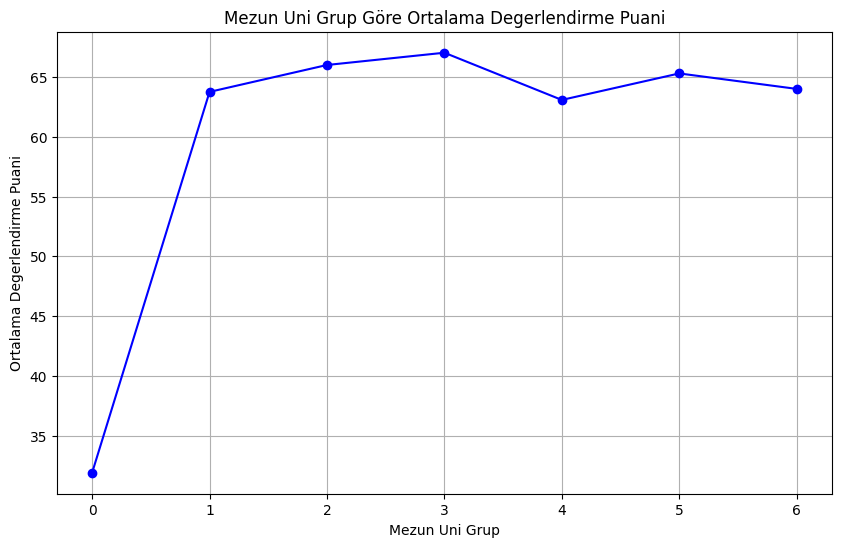

In [345]:
plot_average_scores(df, 'Mezun Uni Grup', 'Degerlendirme Puani')

In [346]:
#'Mezun Uni Grup' ve "Değerlendirme Puanı" sütunlarını kontrol et
print(df[['Mezun Uni Grup', 'Degerlendirme Puani']].head())

# Korelasyon hesapla
correlation = df[['Mezun Uni Grup', 'Degerlendirme Puani']].corr()
print(correlation)


   Mezun Uni Grup  Degerlendirme Puani
0             0.0                 52.0
1             0.0                 30.0
2             0.0                 18.0
3             0.0                 40.0
5             0.0                 37.0
                     Mezun Uni Grup  Degerlendirme Puani
Mezun Uni Grup              1.00000              0.07149
Degerlendirme Puani         0.07149              1.00000


## Özellik Çıkarımı

In [347]:
df.isna().sum()

Basvuru Yili                   0
Degerlendirme Puani            0
Cinsiyet                      20
Dogum Tarihi                   0
Dogum Yeri                   490
                            ... 
Baba Sektor Grup               0
Kulup Ismi Grup                0
STK Üye Grup                   0
Girisimcilik Deneyim Grup      0
Mezun Uni Grup                 0
Length: 61, dtype: int64

## 'Aktif Katilim'

In [348]:
#Yeni sütunu oluşturmak için bir fonksiyon
def create_new_column(row):
    return row[['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
                'Aktif olarak bir STK üyesi misiniz?',
                'Stk Projesine Katildiniz Mi?',
                'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
                'Profesyonel Bir Spor Daliyla Mesgul musunuz?']].tolist().count(1)

#Yeni sütunu DataFrame'e ekleyin
df['Aktif Katilim'] = df.apply(create_new_column, axis=1)

df['Aktif Katilim'].unique()

array([3, 2, 1, 0, 4, 5], dtype=int64)

In [350]:
# Korelasyon hesaplama
correlation = df[['Aktif Katilim', 'Degerlendirme Puani']].corr()
print(correlation)

                     Aktif Katilim  Degerlendirme Puani
Aktif Katilim             1.000000             0.767935
Degerlendirme Puani       0.767935             1.000000


## Makine Öğrenimi İçin Özellik Seçimi

In [352]:
df.dtypes

Basvuru Yili                   int64
Degerlendirme Puani          float64
Cinsiyet                      object
Dogum Tarihi                   int64
Dogum Yeri                    object
                              ...   
Kulup Ismi Grup                Int64
STK Üye Grup                   Int64
Girisimcilik Deneyim Grup      Int64
Mezun Uni Grup               float64
Aktif Katilim                  int64
Length: 62, dtype: object

In [353]:
# Korelasyon 0.1'den büyük
#String ifade içeren sütunlar çıkarılır
numeric_data1 = df[['Degerlendirme Puani', 
                    'Ikametgah Bolgesi',
                    'Ikametgah Sehri Kademe Puani',
                    'Uni Grup',
                    'Universite Turu',
                    'Burs Yuzdesi Grubu',
                    'Universite Kacinci Sinif',
                    'Universite Not Ortalamasi',
                    'Lise Mezuniyet Notu Grup',
                    'Anne Egitim Durumu Grup',
                    'Anne Calisma Durumu',  
                    'Anne Sektor Grup', 
                    'Baba Egitim Durumu Grup',
                    'Baba Sektor Grup',
                    'Kardes Sayisi',
                    'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
                    'Kulup Ismi Grup',	
                    'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
                    'Aktif olarak bir STK üyesi misiniz?',
                    'Stk Projesine Katildiniz Mi?',
                    'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
                    'Ingilizce Biliyor musunuz?',
                    'Ingilizce Seviyeniz?',
                    'Spor Dalindaki Rolunuz Nedir?',
                    'STK Üye Grup',
                    'Aktif Katilim']]

In [354]:
numeric_data1.dtypes

Degerlendirme Puani                                      float64
Ikametgah Bolgesi                                          int64
Ikametgah Sehri Kademe Puani                               int64
Uni Grup                                                 float64
Universite Turu                                            int64
Burs Yuzdesi Grubu                                      category
Universite Kacinci Sinif                                   int64
Universite Not Ortalamasi                                  int64
Lise Mezuniyet Notu Grup                                   int64
Anne Egitim Durumu Grup                                    int64
Anne Calisma Durumu                                        int64
Anne Sektor Grup                                           int64
Baba Egitim Durumu Grup                                    int64
Baba Sektor Grup                                           int64
Kardes Sayisi                                            float64
Girisimcilik Kulupleri Ta

In [355]:
numeric_data1.corr()

Degerlendirme Puani  \
Degerlendirme Puani                                            1.000000   
Ikametgah Bolgesi                                              0.166031   
Ikametgah Sehri Kademe Puani                                  -0.186162   
Uni Grup                                                       0.300821   
Universite Turu                                                0.125447   
Burs Yuzdesi Grubu                                             0.103886   
Universite Kacinci Sinif                                       0.164662   
Universite Not Ortalamasi                                      0.164662   
Lise Mezuniyet Notu Grup                                       0.504612   
Anne Egitim Durumu Grup                                        0.263403   
Anne Calisma Durumu                                            0.158295   
Anne Sektor Grup                                               0.138517   
Baba Egitim Durumu Grup                                        0.239491   
Baba Sektor Grup                                               0.107269   
Kardes Sayisi                                                 -0.143636   
Girisimcilik Kulupleri Tarzi Bir Kulube Uye mis...             0.591427   
Kulup Ismi Grup                                               -0.453644   
Profesyonel Bir Spor Daliyla Mesgul musunuz?                   0.349446   
Aktif olarak bir STK üyesi misiniz?                            0.444031   
Stk Projesine Katildiniz Mi?                                   0.450571   
Girisimcilikle Ilgili Deneyiminiz Var Mi?                      0.356854   
Ingilizce Biliyor musunuz?                                     0.183024   
Ingilizce Seviyeniz?                                           0.259647   
Spor Dalindaki Rolunuz Nedir?                                  0.370765   
STK Üye Grup                                                  -0.284613   
Aktif Katilim                                                  0.767935   

                                                    Ikametgah Bolgesi  \
Degerlendirme Puani                                          0.166031   
Ikametgah Bolgesi                                            1.000000   
Ikametgah Sehri Kademe Puani                                -0.829016   
Uni Grup                                                     0.082556   
Universite Turu                                              0.161198   
Burs Yuzdesi Grubu                                           0.096124   
Universite Kacinci Sinif                                     0.058078   
Universite Not Ortalamasi                                    0.058078   
Lise Mezuniyet Notu Grup                                     0.068641   
Anne Egitim Durumu Grup                                      0.245530   
Anne Calisma Durumu                                          0.154503   
Anne Sektor Grup                                             0.124636   
Baba Egitim Durumu Grup                                      0.157605   
Baba Sektor Grup                                             0.074249   
Kardes Sayisi                                               -0.242786   
Girisimcilik Kulupleri Tarzi Bir Kulube Uye mis...           0.142793   
Kulup Ismi Grup                                             -0.121957   
Profesyonel Bir Spor Daliyla Mesgul musunuz?                 0.033466   
Aktif olarak bir STK üyesi misiniz?                          0.071429   
Stk Projesine Katildiniz Mi?                                 0.091439   
Girisimcilikle Ilgili Deneyiminiz Var Mi?                    0.083853   
Ingilizce Biliyor musunuz?                                   0.080316   
Ingilizce Seviyeniz?                                         0.169629   
Spor Dalindaki Rolunuz Nedir?                                0.034535   
STK Üye Grup                                                -0.053592   
Aktif Katilim                                                0.149171   

                                                    Ik

In [356]:
numeric_data1.corr()["Degerlendirme Puani"]    # bağımlı değişkenin, diğer değişkenler arasındaki korelasyonuna bakılır

Degerlendirme Puani                                     1.000000
Ikametgah Bolgesi                                       0.166031
Ikametgah Sehri Kademe Puani                           -0.186162
Uni Grup                                                0.300821
Universite Turu                                         0.125447
Burs Yuzdesi Grubu                                      0.103886
Universite Kacinci Sinif                                0.164662
Universite Not Ortalamasi                               0.164662
Lise Mezuniyet Notu Grup                                0.504612
Anne Egitim Durumu Grup                                 0.263403
Anne Calisma Durumu                                     0.158295
Anne Sektor Grup                                        0.138517
Baba Egitim Durumu Grup                                 0.239491
Baba Sektor Grup                                        0.107269
Kardes Sayisi                                          -0.143636
Girisimcilik Kulupleri Ta

In [357]:
# Korelasyon 0.2'den büyük
#String ifade içeren sütunlar çıkarılır
numeric_data2 = df[['Degerlendirme Puani',
                    'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
                    'Profesyonel Bir Spor Daliyla Mesgul musunuz?', 
                    'Aktif olarak bir STK üyesi misiniz?', 
                    'Stk Projesine Katildiniz Mi?', 
                    'Lise Mezuniyet Notu Grup', 
                    'Aktif Katilim']]

In [358]:
numeric_data2.corr()["Degerlendirme Puani"]  

Degerlendirme Puani                                     1.000000
Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?    0.591427
Profesyonel Bir Spor Daliyla Mesgul musunuz?            0.349446
Aktif olarak bir STK üyesi misiniz?                     0.444031
Stk Projesine Katildiniz Mi?                            0.450571
Lise Mezuniyet Notu Grup                                0.504612
Aktif Katilim                                           0.767935
Name: Degerlendirme Puani, dtype: float64

In [361]:
# DataFrame'i CSV dosyasına kaydet
numeric_data1.to_csv('dataset/train_new.csv', index=False)

print("CSV dosyasına başarıyla kaydedildi.")

CSV dosyasına başarıyla kaydedildi.
